<a href="https://colab.research.google.com/github/KatiaGerrr/Optimal-Prescribed-Burn-Configuration-to-Reduce-Wildfire-Propagation-and-Impact/blob/main/Optimal_Prescribed_Burn_Configuration_to_Reduce_Wildfire_Propagation_and_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prescribed Burn Configuration


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Terrain Matrix (σ = 5.0)'}>)

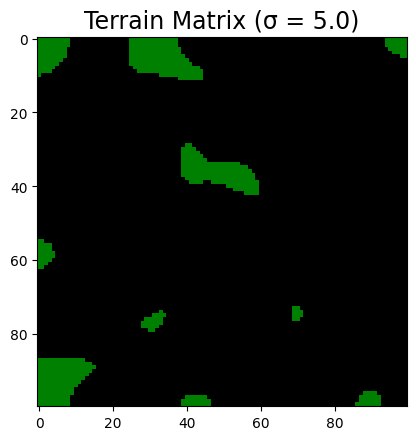

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import matplotlib.animation as animation
import matplotlib.colors as mcolors
from google.colab import files
import json
import os

#Parameters
N = 100         # Matrix Size
size = 5.0    # Smoothing size
prop = 0.6  # Propriton of prescribed burns
maxt = 50
p_live = 0.01
p_dead = 0.5

def terrain_matrix(N, size, prop):
    rand_veg = np.random.rand(N, N)
    smooth_terrain = gaussian_filter(rand_veg, sigma=size)
    smooth_terrain = (smooth_terrain - smooth_terrain.min()) / (smooth_terrain.max() - smooth_terrain.min())

    bool_terrain = np.zeros_like(smooth_terrain, dtype=bool)

# Prescribed Burn Proportion Logic
    for i in range(smooth_terrain.shape[0]):  # iterates over rows
            for j in range(smooth_terrain.shape[1]):  # iterates over columns
                if smooth_terrain[i, j] < prop:
                  bool_terrain[i, j] = True
                else:
                  bool_terrain[i, j] = False
    return bool_terrain

init_terrain_matrix = terrain_matrix(N, size, prop)

def plot_terrain(matrix, size, prop):
    colors = ["green", "black"]  # Green for vegetation, Black for prescribed burns
    map_color = mcolors.ListedColormap(colors)
    fig, ax = plt.subplots()
    ax.imshow(matrix, cmap=map_color)
    #ax.set_title("Smoothed Terrain Matrix")
    ax.set_title(f"Terrain Matrix (σ = {size})", fontsize=17)
    #ax.set_title(f"Terrain Matrix, size: {size}, prop: {prop}")
    return fig, ax

plot_terrain(init_terrain_matrix , size, prop)

#Parameters

###Upload File

In [4]:
terrain_list = init_terrain_matrix.tolist()

# Save as JSON file
json_filename = "Spl_s6_prop0.8.json"
with open(json_filename, "w") as json_file:
    json.dump(terrain_list, json_file)

# Download the JSON file to your desktop
files.download(json_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Saving chosen matrix in JSON file

json_filename = "/content/Spl_s6_prop0.7.json"
with open(json_filename, "r") as json_file:
    terrain_list = json.load(json_file)

terrain_matrix1 = np.array(terrain_list)

print (terrain_matrix1)


json_filename = "/content/Spl_s6_prop0.8.json"
with open(json_filename, "r") as json_file:
    terrain_list = json.load(json_file)

terrain_matrix2 = np.array(terrain_list)

print (terrain_matrix2)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


# Fire Ignition and Spread Function

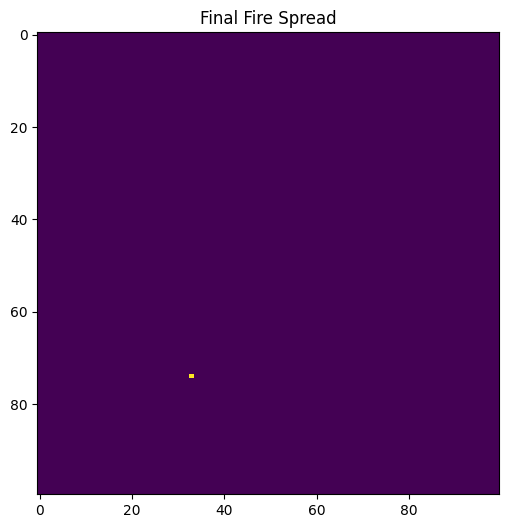

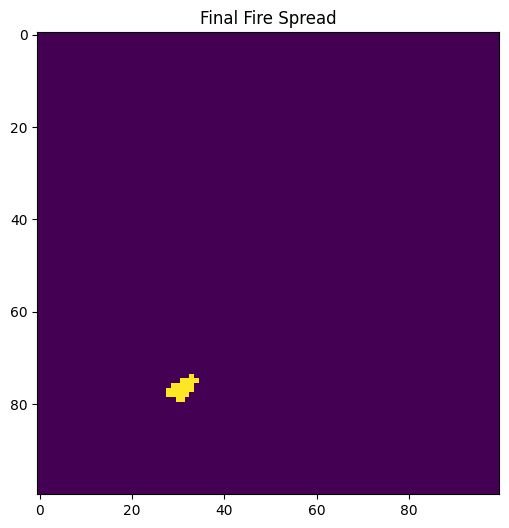

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.ndimage import gaussian_filter

rows, cols = 100, 100
timesteps = 50
num_fires = 1
brush_fire_prob = 0.25
live_veg_fire_prob = 0.001


def run_simulation(fireMatrix:np.ndarray, fireIndices:set[tuple[int, int]],
                   init_terrain_matrix:np.ndarray, brush_fire_prob:float,
                   live_veg_fire_prob:float) -> np.ndarray:
    rows, cols, timesteps = fireMatrix.shape
    indicesToSkip = set()

    for t in range(timesteps - 1):
        indicesToAdd = set()

        for idx in fireIndices:
            i, j = idx
            fireMatrix[i, j, t+1] = fireMatrix[i, j, t]  # ensures fire stays ignited

            if idx in indicesToSkip:
                continue

            fireCount = 0
            for k in range(i-1, i+2):
                for l in range(j-1, j+2):
                    if (k, l) == (i, j) or k < 0 or l < 0 or k >= rows or l >= cols:
                        continue
                    if fireMatrix[k, l, t+1]:  # Fire already present
                        fireCount += 1
                        continue
                    fire_prob = live_veg_fire_prob if init_terrain_matrix[k, l] else brush_fire_prob
                    if np.random.rand() < fire_prob:
                        fireMatrix[k, l, t+1] = True
                        indicesToAdd.add((k, l))

            if fireCount == 8:
              indicesToSkip.add(idx)

        for idx in indicesToAdd:
            fireIndices.add(idx)

    return fireMatrix

def set_random_fires(N: int, rows: int, cols: int, vegetationMatrix: np.ndarray) -> set:
    fireIndices = set()
    while len(fireIndices) < N:
        i, j = np.random.randint(0, rows), np.random.randint(0, cols)
        if vegetationMatrix[i, j] == 0:  # Ensuring vegetation is only ignited
            fireIndices.add((i, j))
    return fireIndices

fireMatrix = np.zeros((rows, cols, timesteps+1), dtype=bool)

fireIndices = set_random_fires(num_fires, rows, cols, init_terrain_matrix)
for i, j in fireIndices:
    fireMatrix[i, j, 0] = True  # Initialize fire

fireMatrix = run_simulation(fireMatrix, fireIndices, init_terrain_matrix, brush_fire_prob, live_veg_fire_prob)

# Initial Fire
plt.figure(figsize=(6,6))
plt.imshow(fireMatrix[:, :, 0], interpolation="nearest")
plt.title("Final Fire Spread")
plt.show()

# Final Fire
plt.figure(figsize=(6,6))
plt.imshow(fireMatrix[:, :, -1], interpolation="nearest")
plt.title("Final Fire Spread")
plt.show()

#Experiments

Experiment 1/100: Burned cells, Terrain 1: 24, Terrain 2: 171


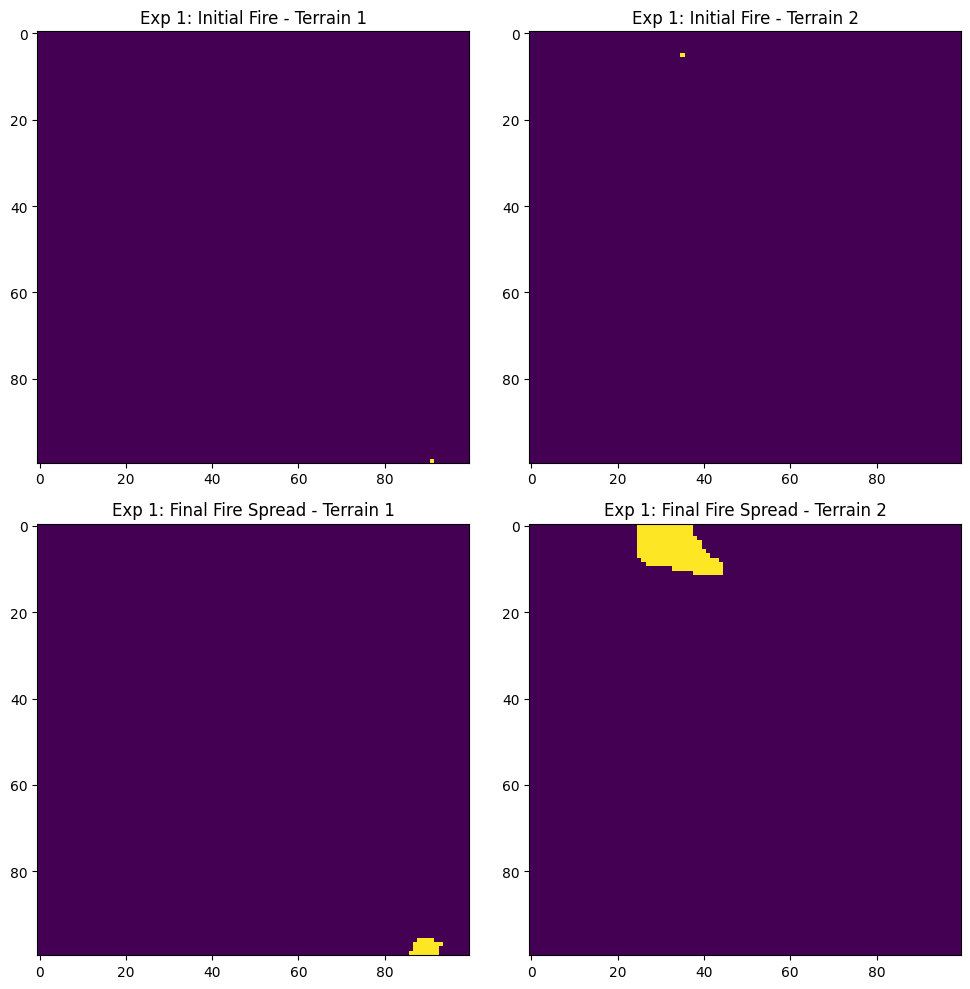

Experiment 2/100: Burned cells, Terrain 1: 176, Terrain 2: 76


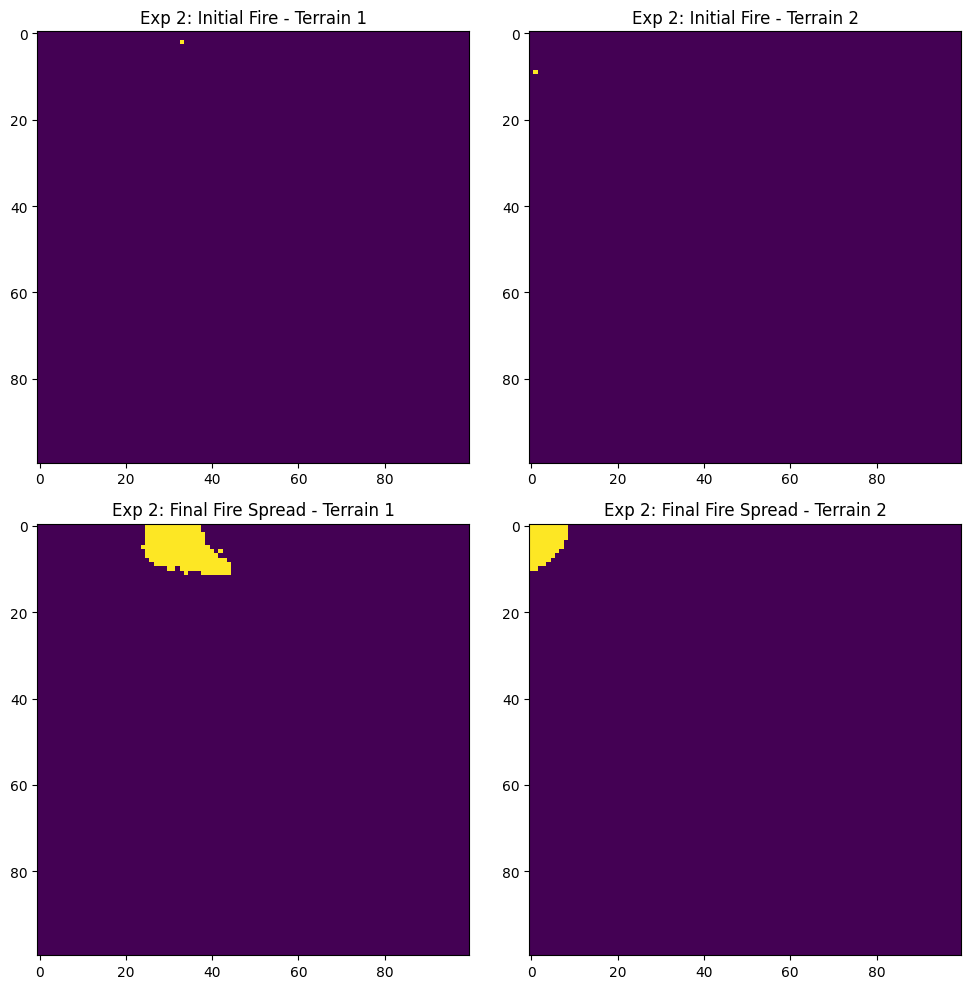

Experiment 3/100: Burned cells, Terrain 1: 160, Terrain 2: 159


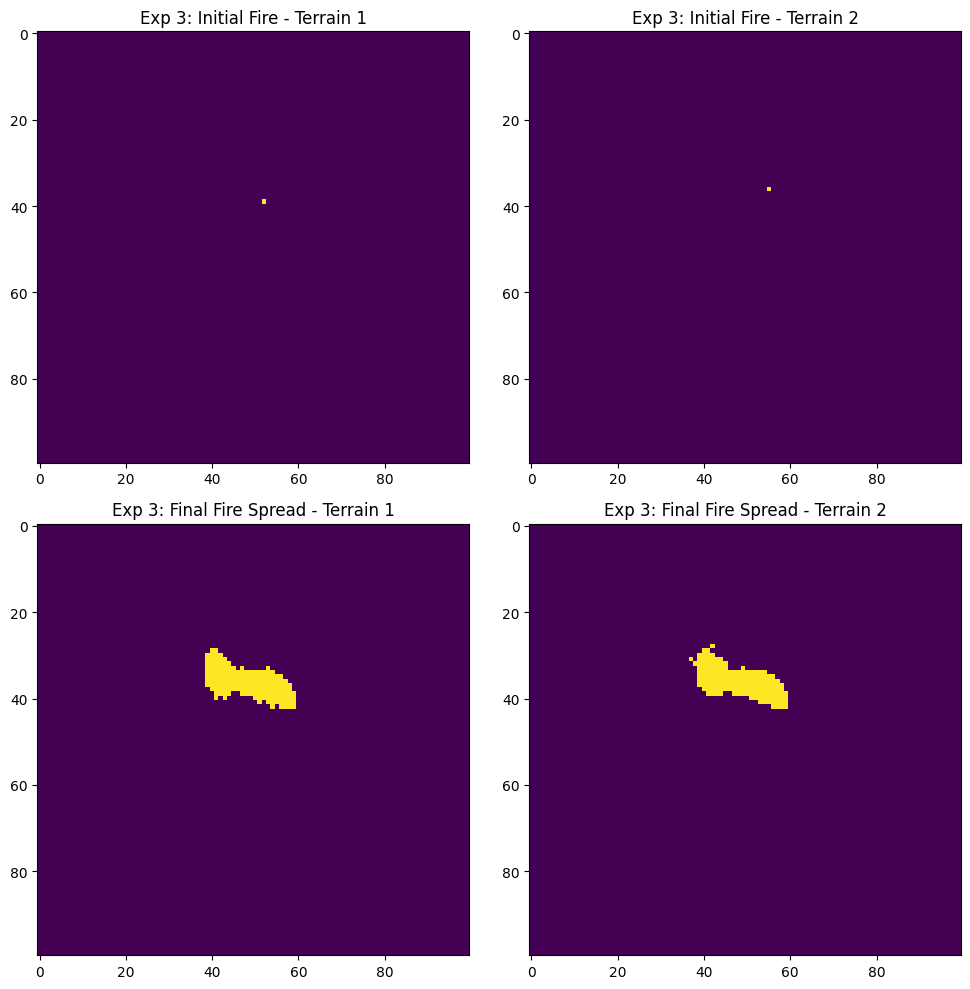

Experiment 4/100: Burned cells, Terrain 1: 34, Terrain 2: 159


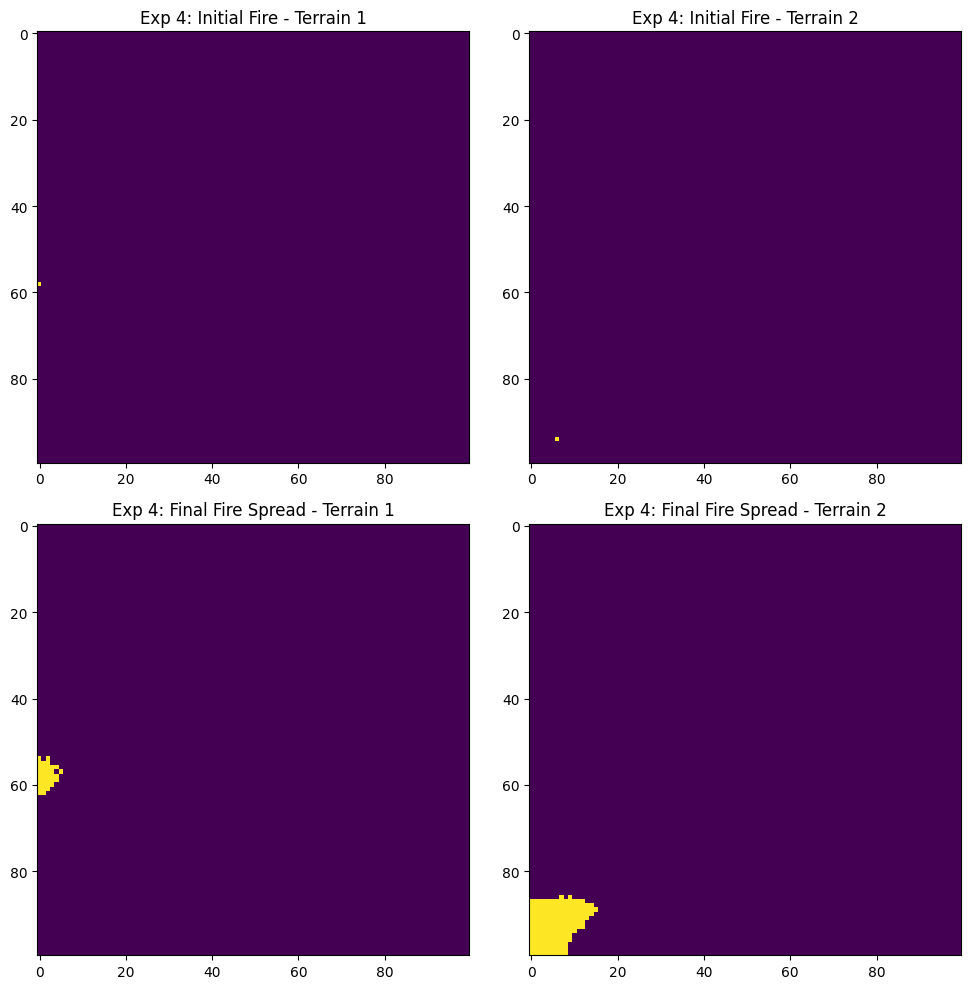

Experiment 5/100: Burned cells, Terrain 1: 160, Terrain 2: 156


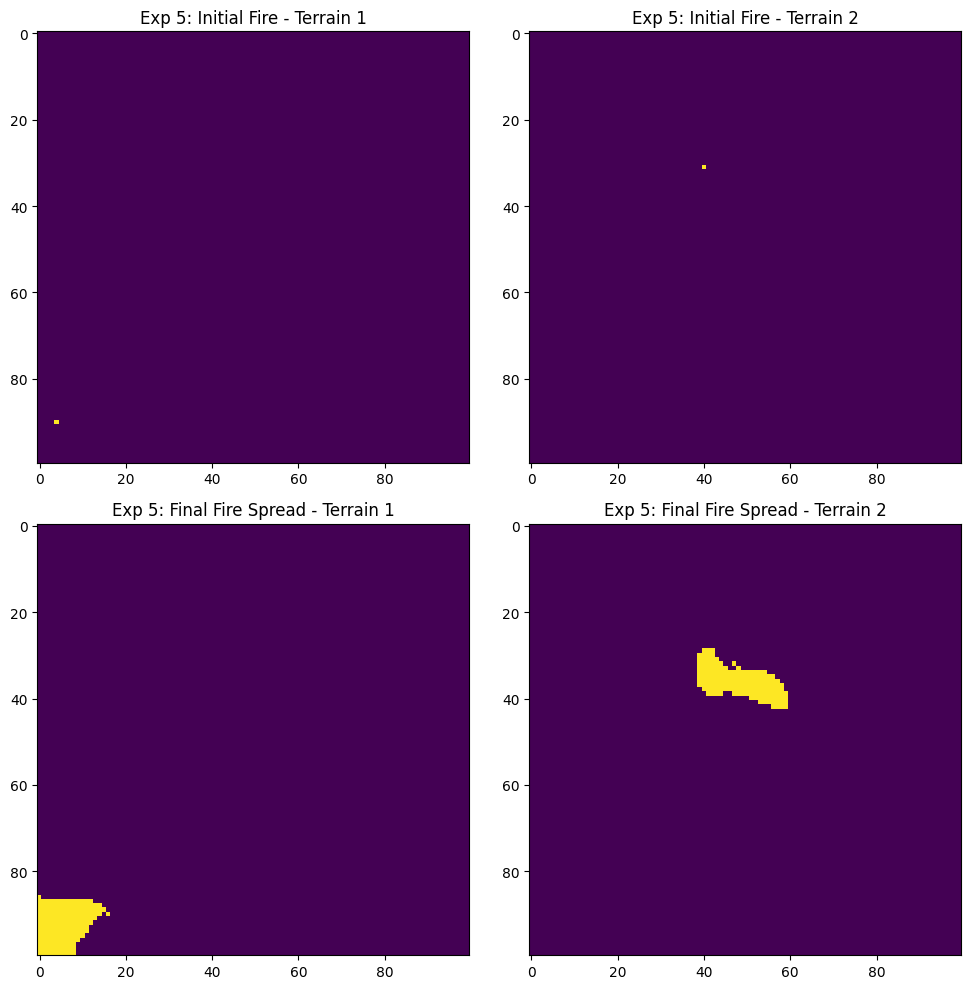

Experiment 6/100: Burned cells, Terrain 1: 181, Terrain 2: 156


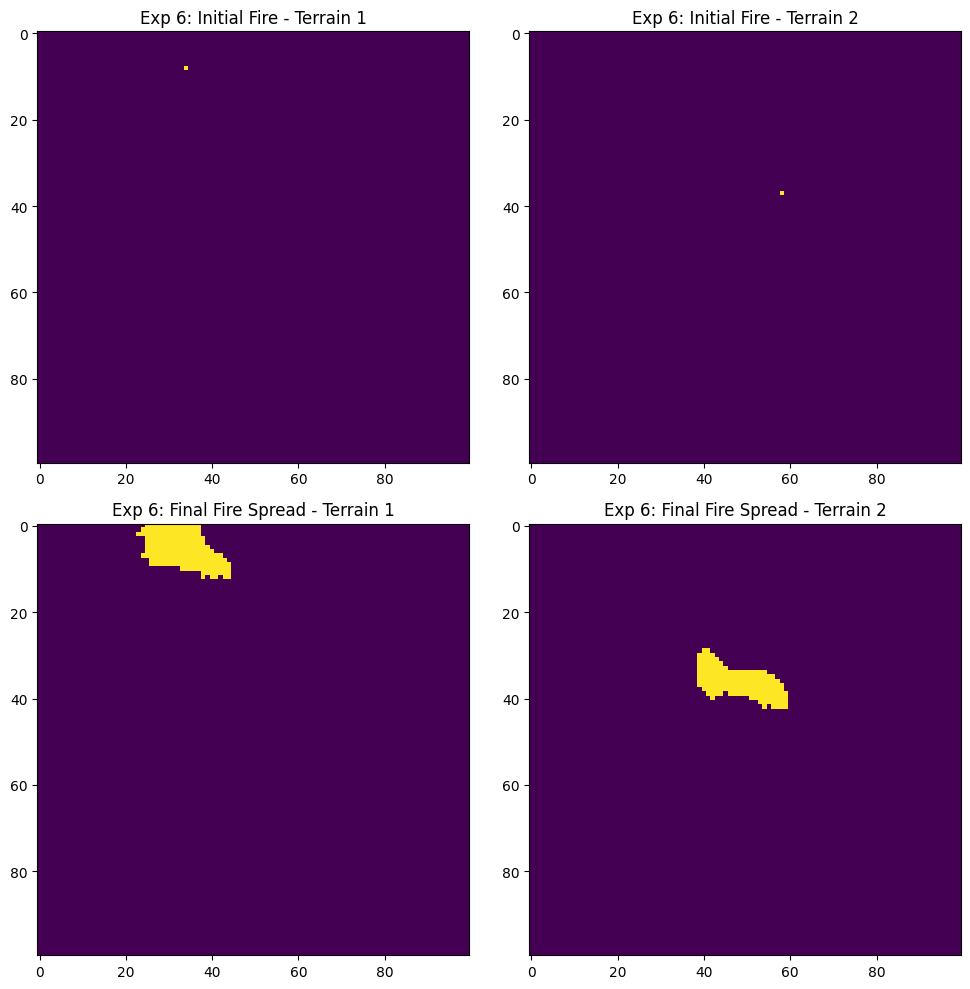

Experiment 7/100: Burned cells, Terrain 1: 30, Terrain 2: 31


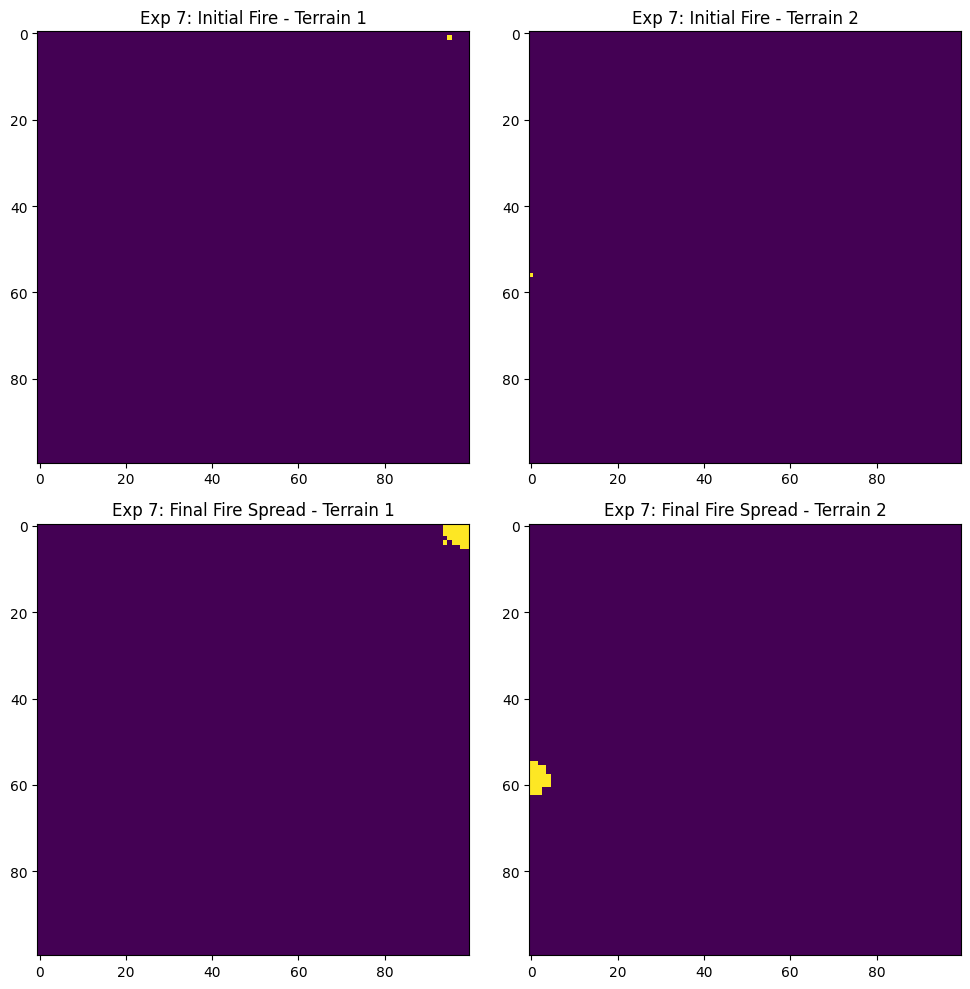

Experiment 8/100: Burned cells, Terrain 1: 170, Terrain 2: 160


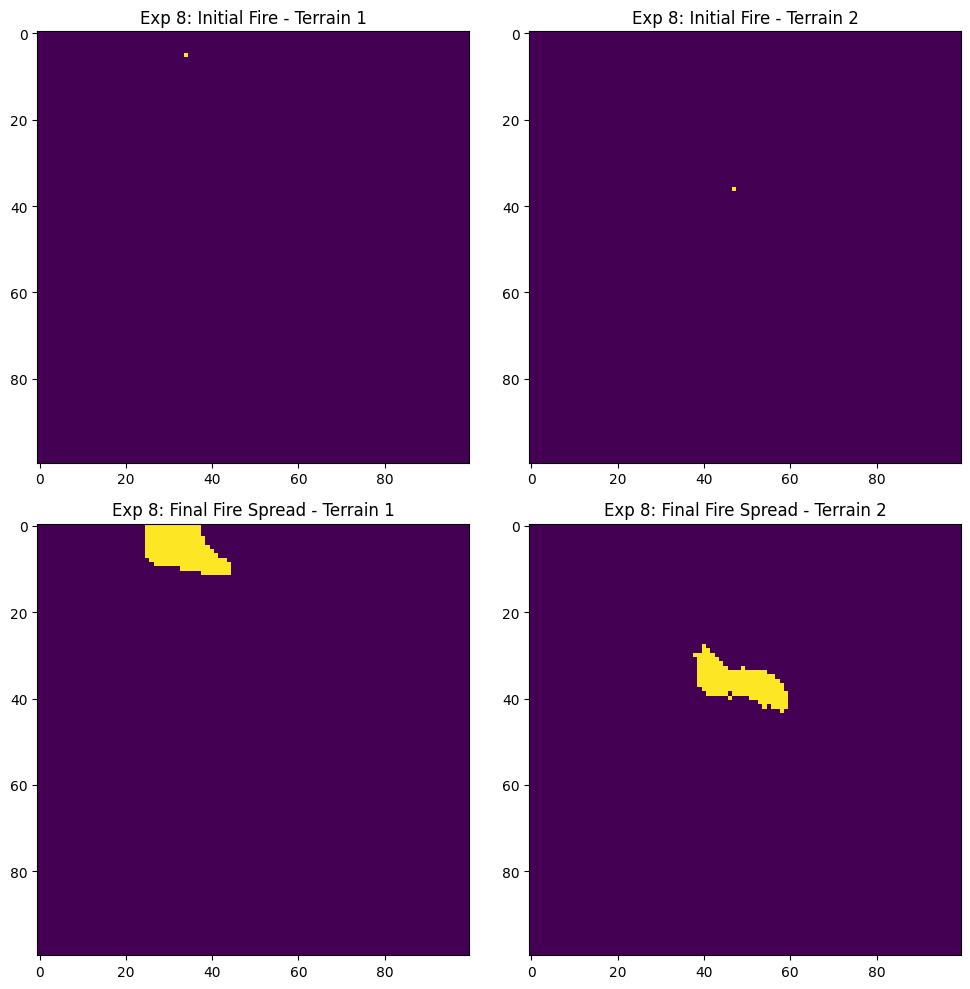

Experiment 9/100: Burned cells, Terrain 1: 160, Terrain 2: 157


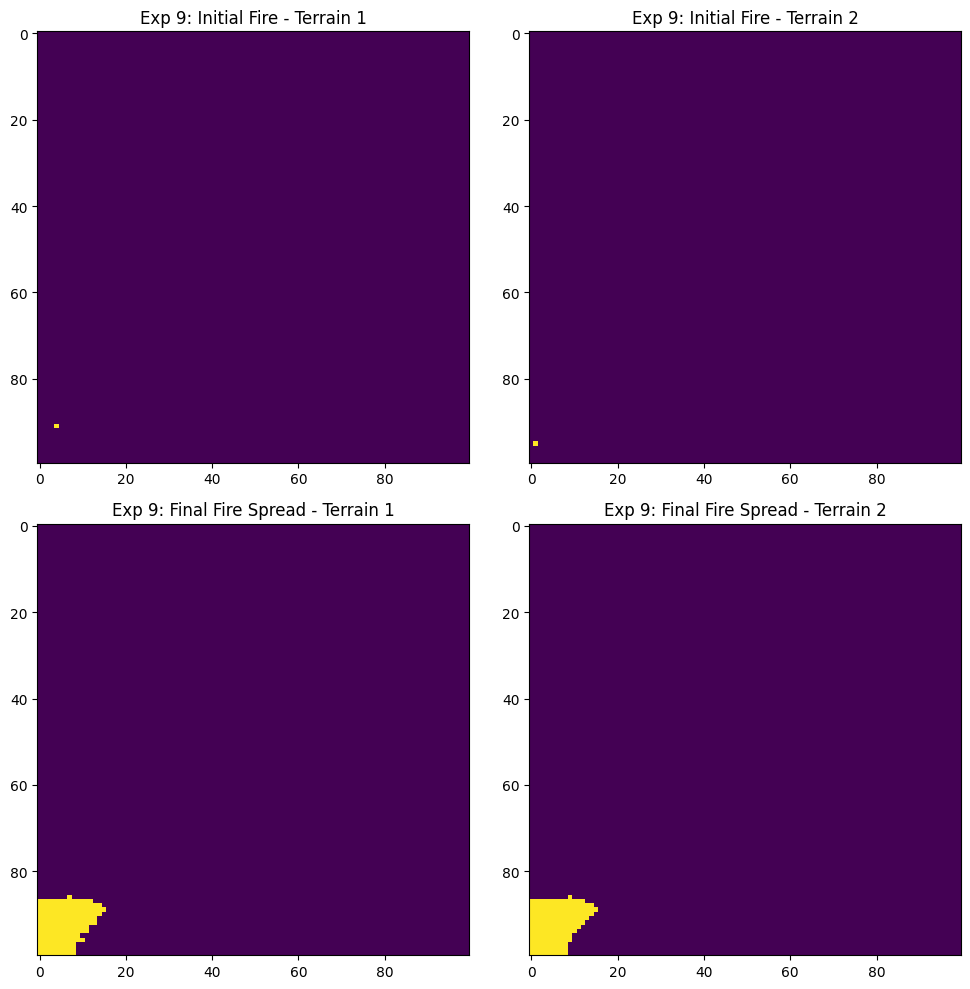

Experiment 10/100: Burned cells, Terrain 1: 172, Terrain 2: 24


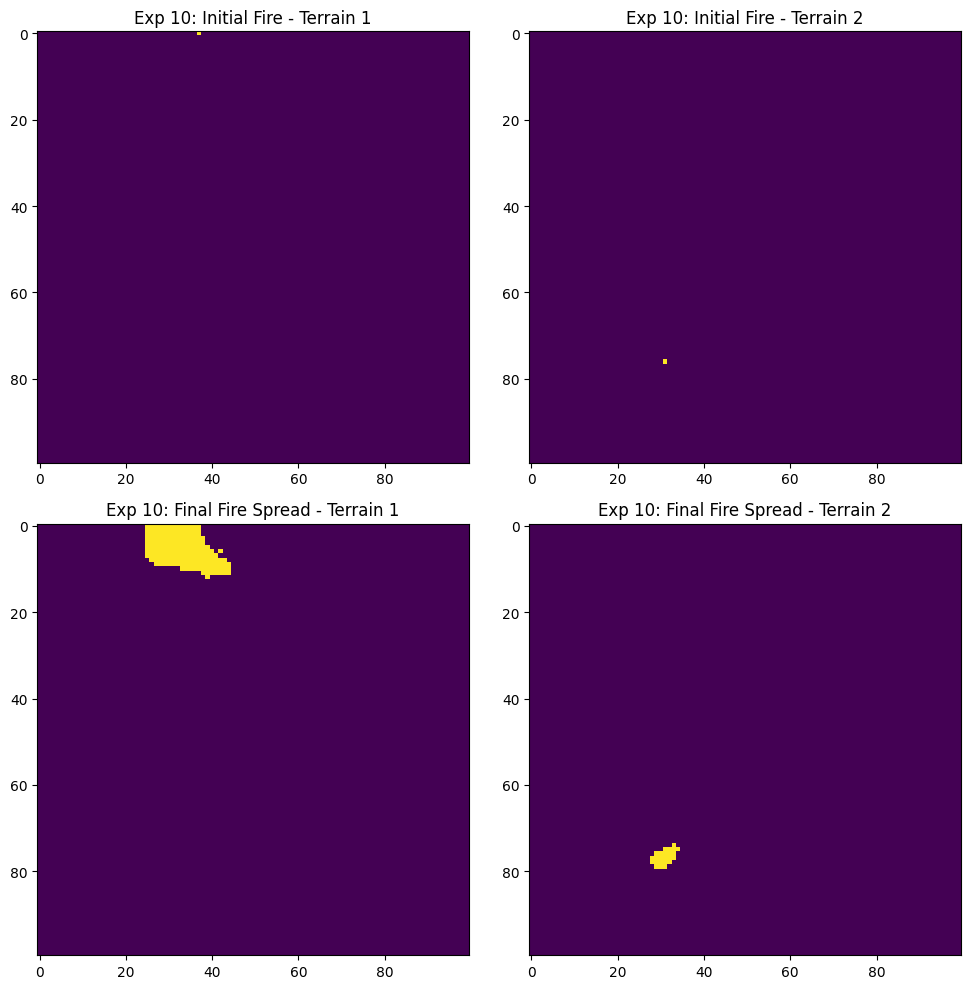

Experiment 11/100: Burned cells, Terrain 1: 178, Terrain 2: 33


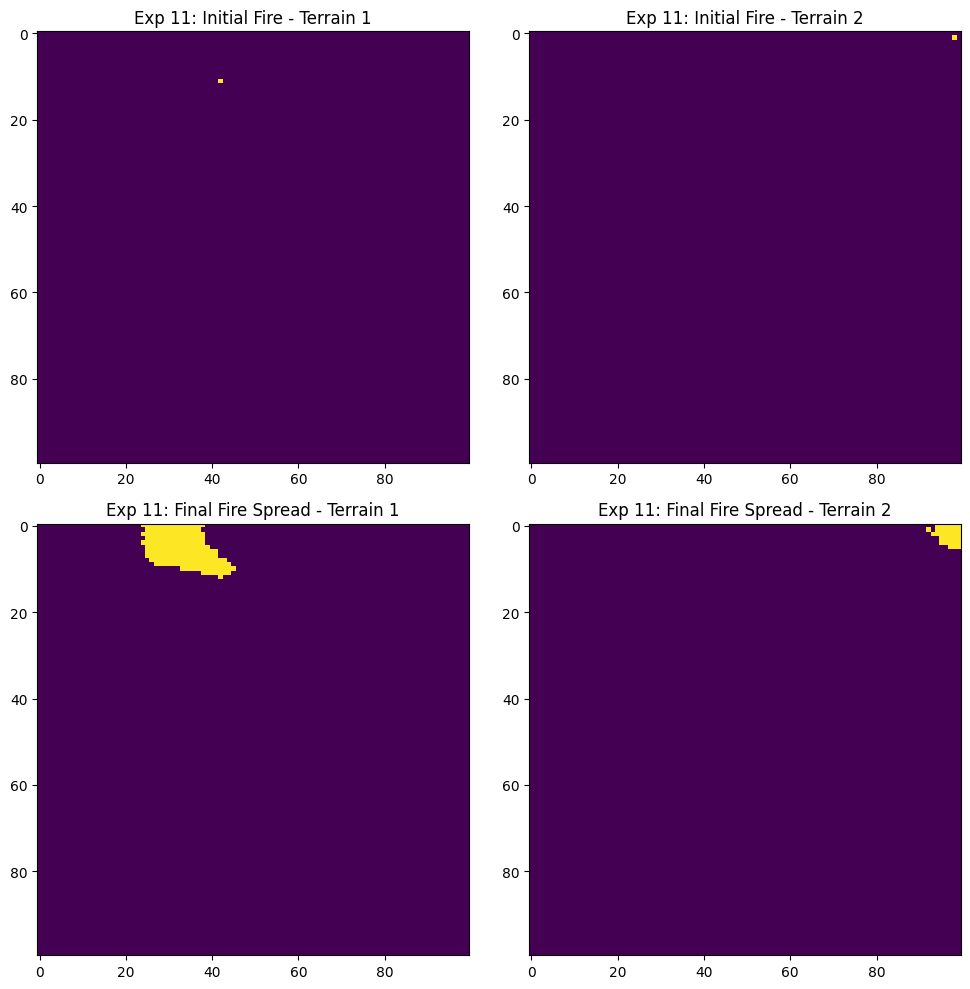

Experiment 12/100: Burned cells, Terrain 1: 160, Terrain 2: 176


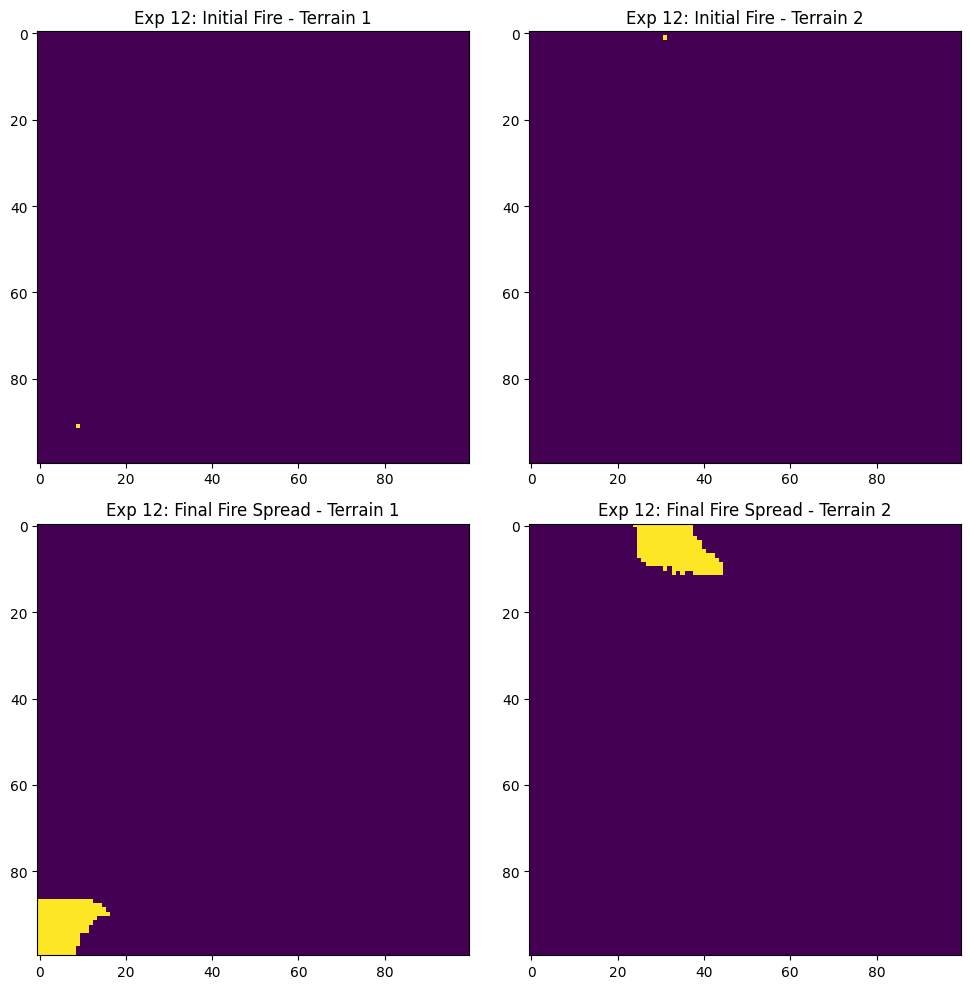

Experiment 13/100: Burned cells, Terrain 1: 177, Terrain 2: 156


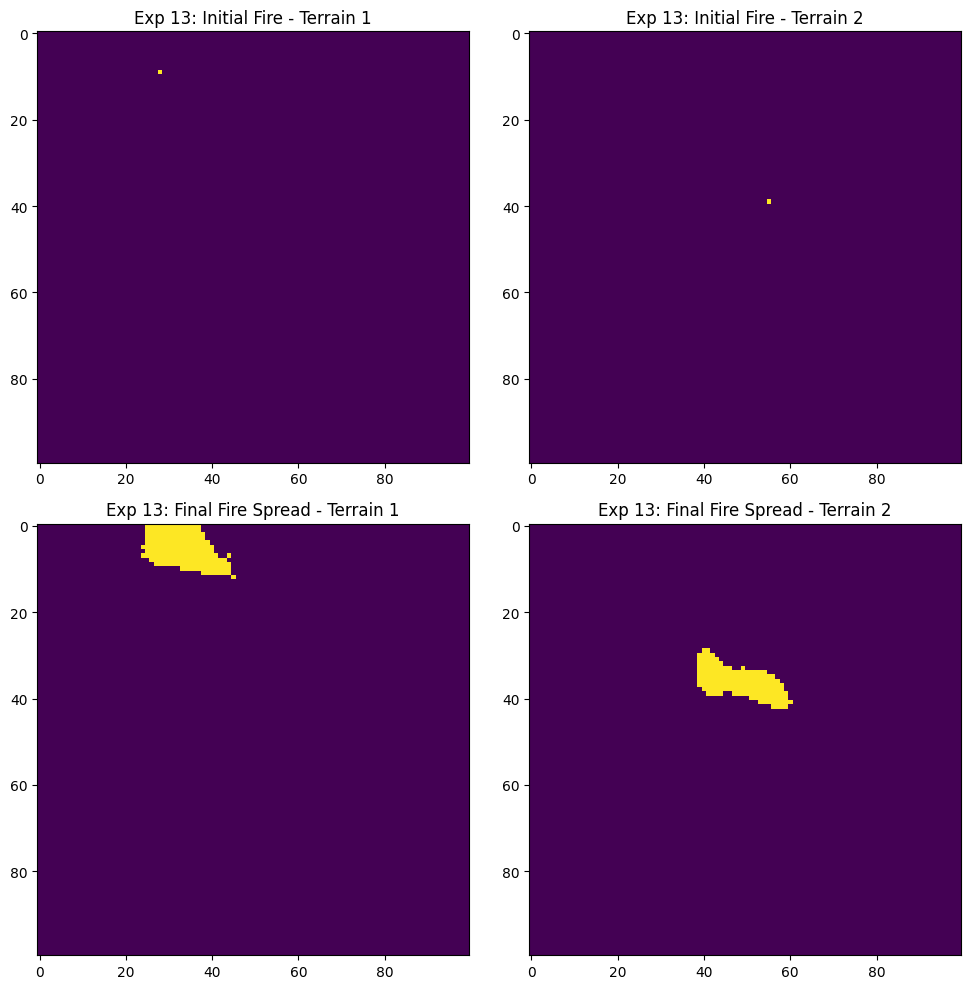

Experiment 14/100: Burned cells, Terrain 1: 161, Terrain 2: 75


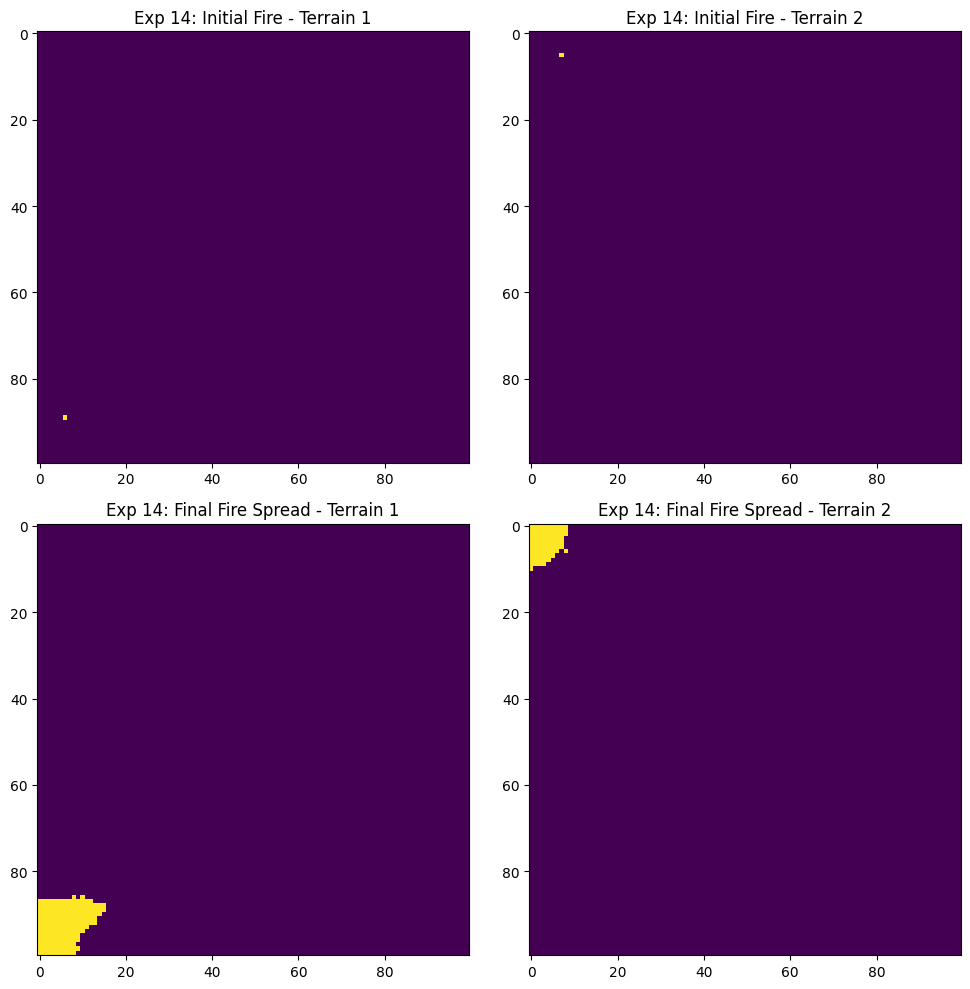

Experiment 15/100: Burned cells, Terrain 1: 159, Terrain 2: 176


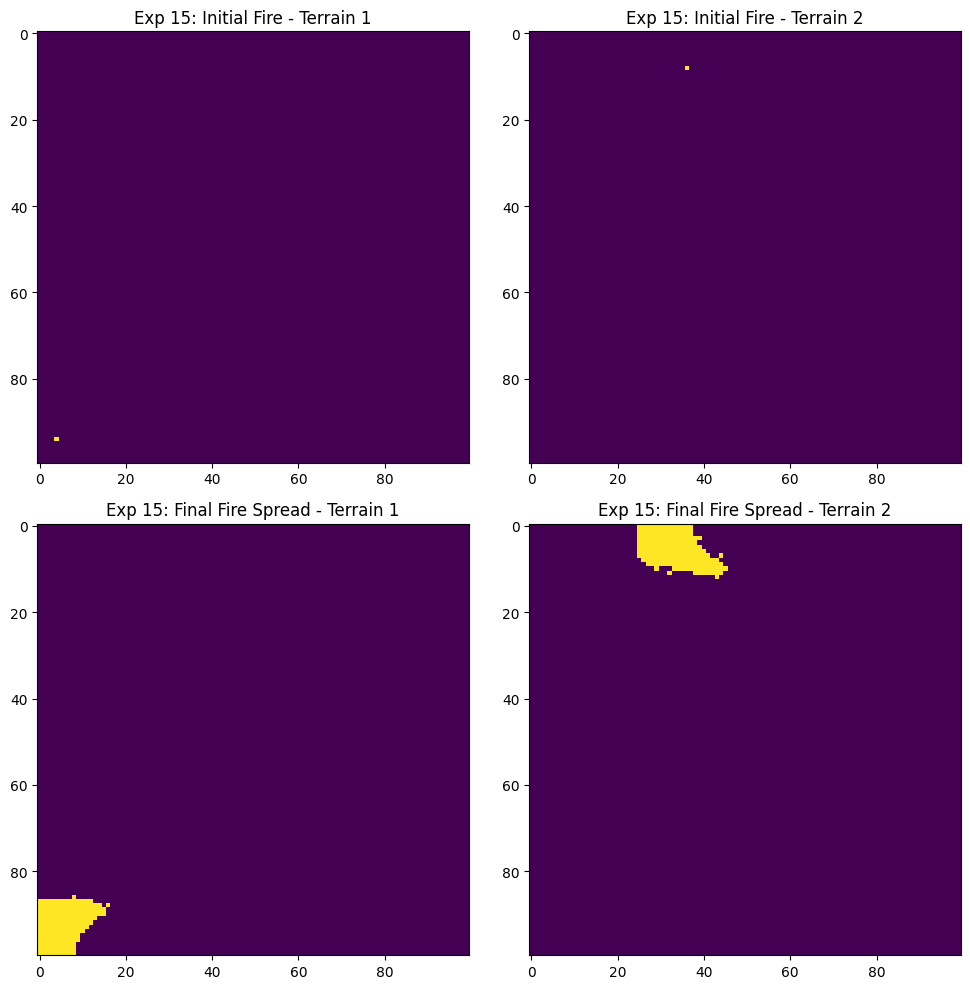

Experiment 16/100: Burned cells, Terrain 1: 162, Terrain 2: 175


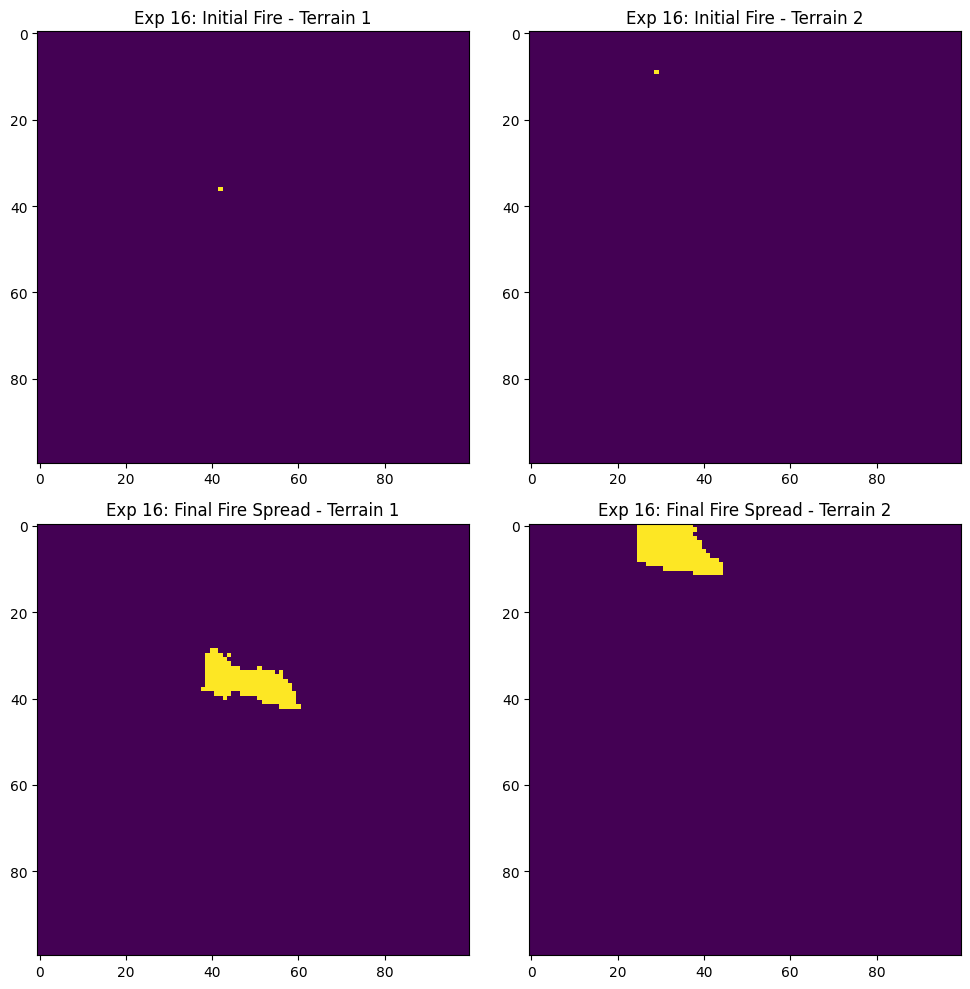

Experiment 17/100: Burned cells, Terrain 1: 157, Terrain 2: 77


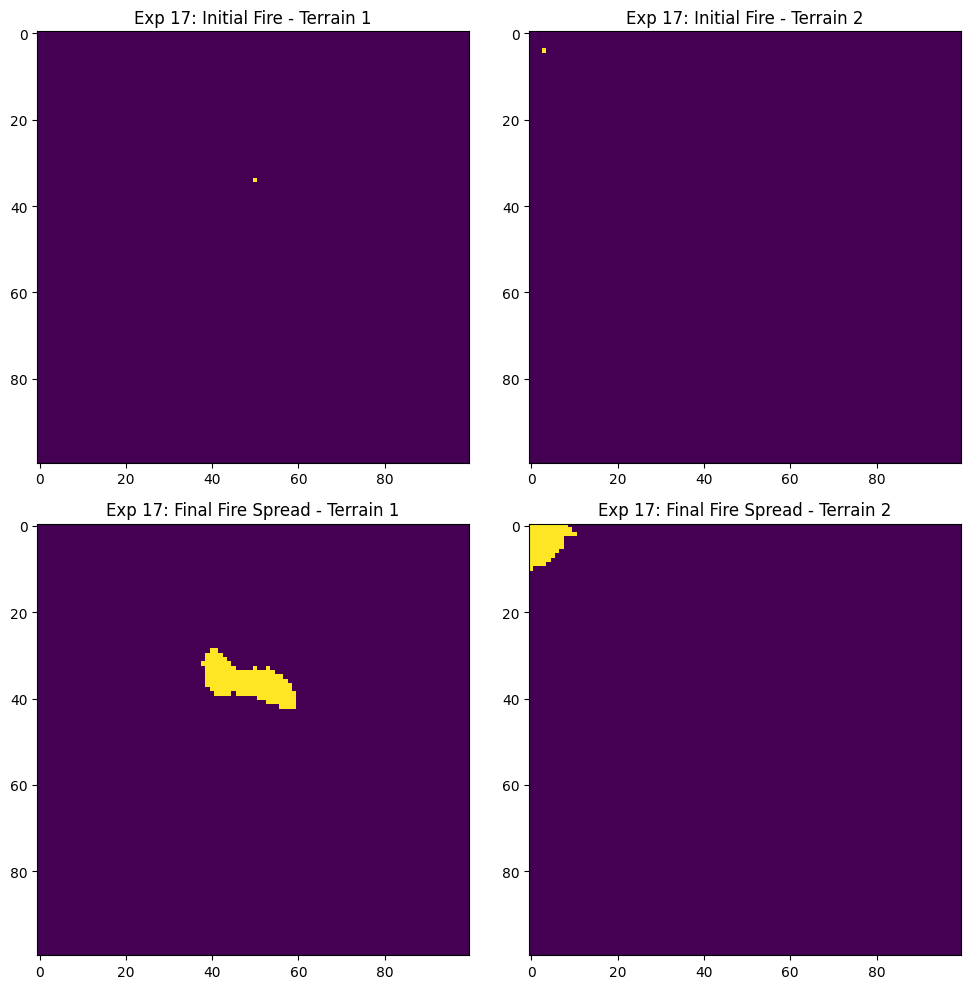

Experiment 18/100: Burned cells, Terrain 1: 76, Terrain 2: 174


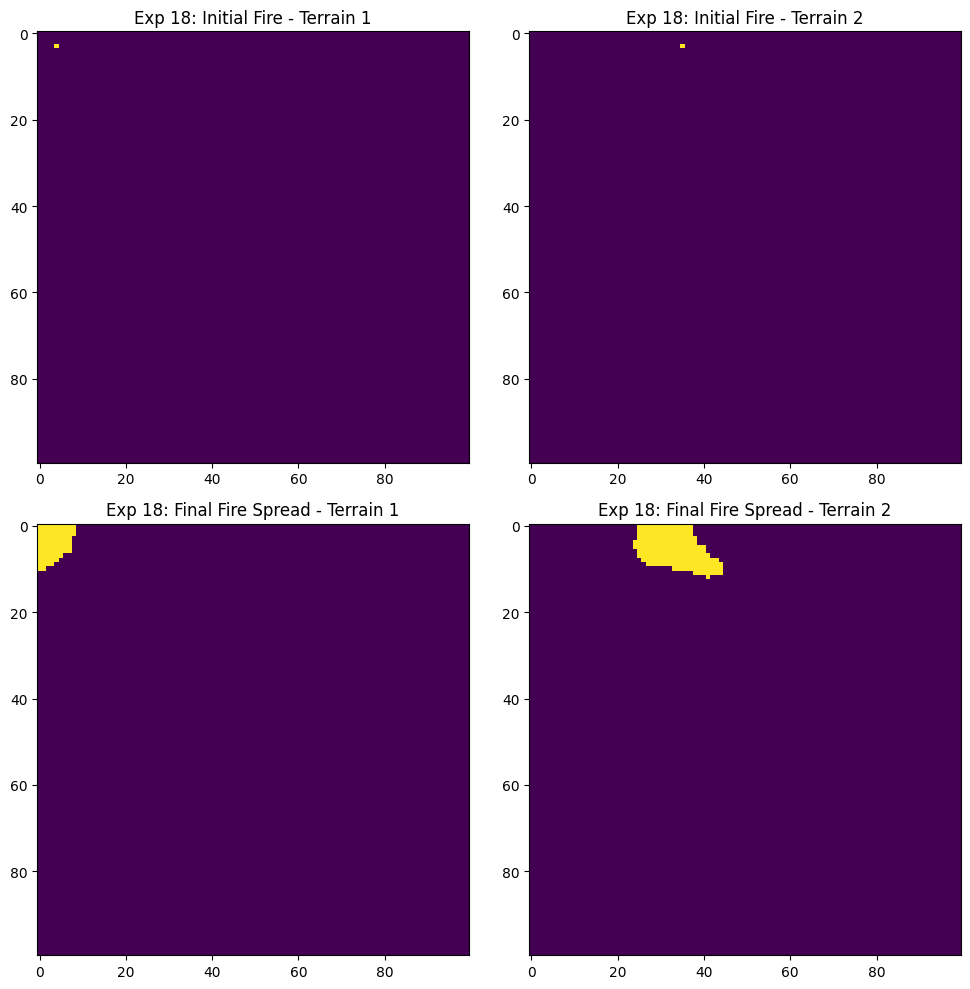

Experiment 19/100: Burned cells, Terrain 1: 78, Terrain 2: 172


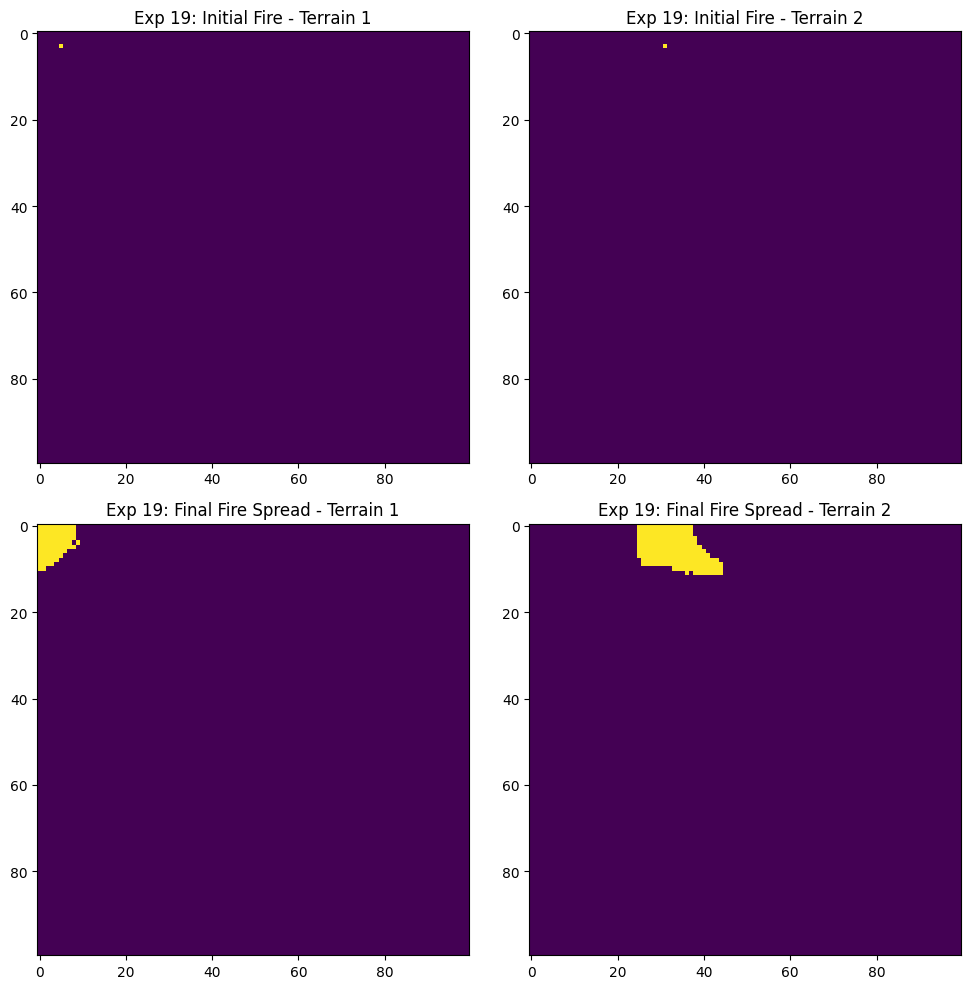

Experiment 20/100: Burned cells, Terrain 1: 159, Terrain 2: 177


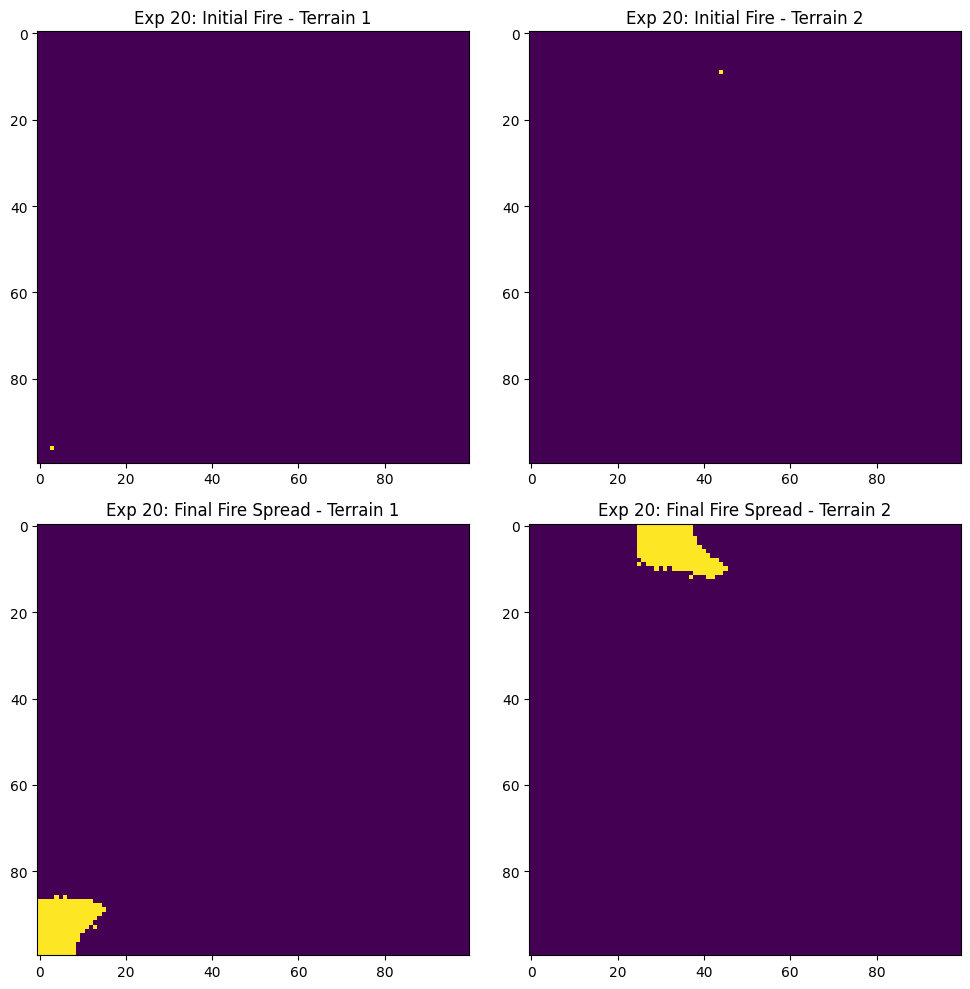

Experiment 21/100: Burned cells, Terrain 1: 158, Terrain 2: 162


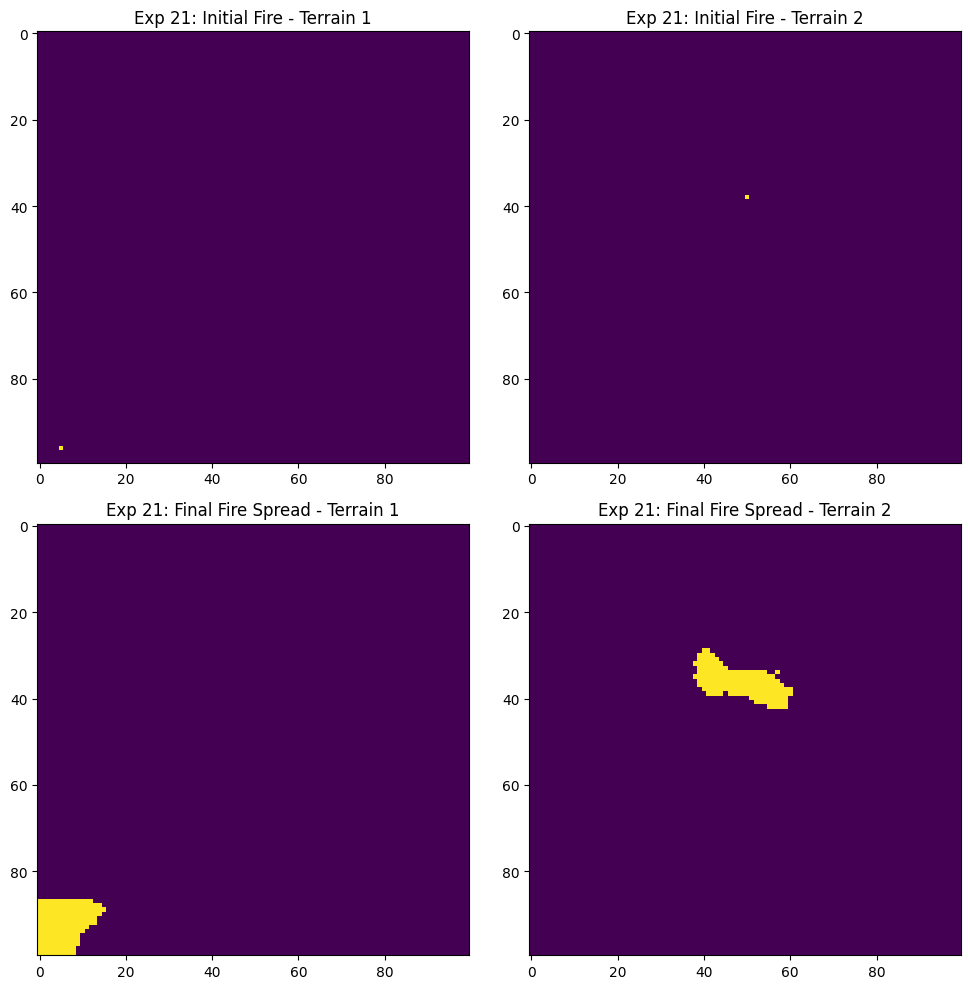

Experiment 22/100: Burned cells, Terrain 1: 179, Terrain 2: 159


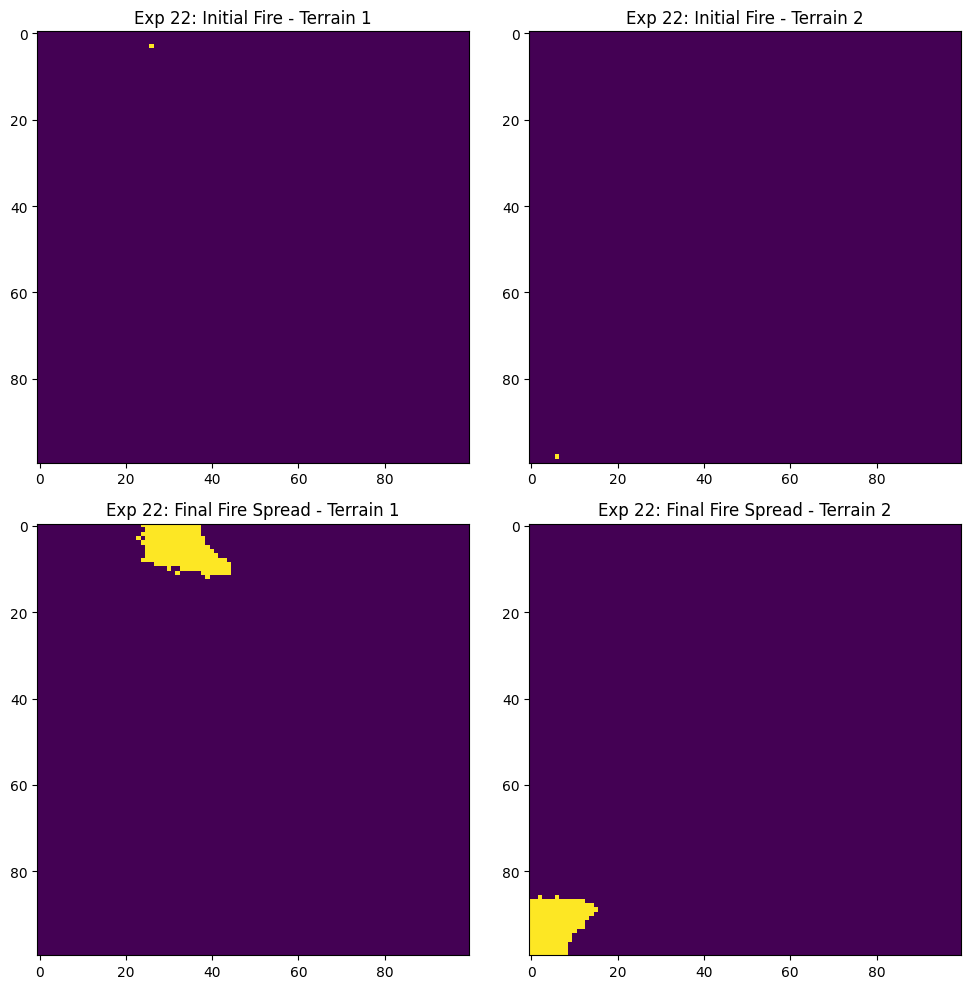

Experiment 23/100: Burned cells, Terrain 1: 26, Terrain 2: 158


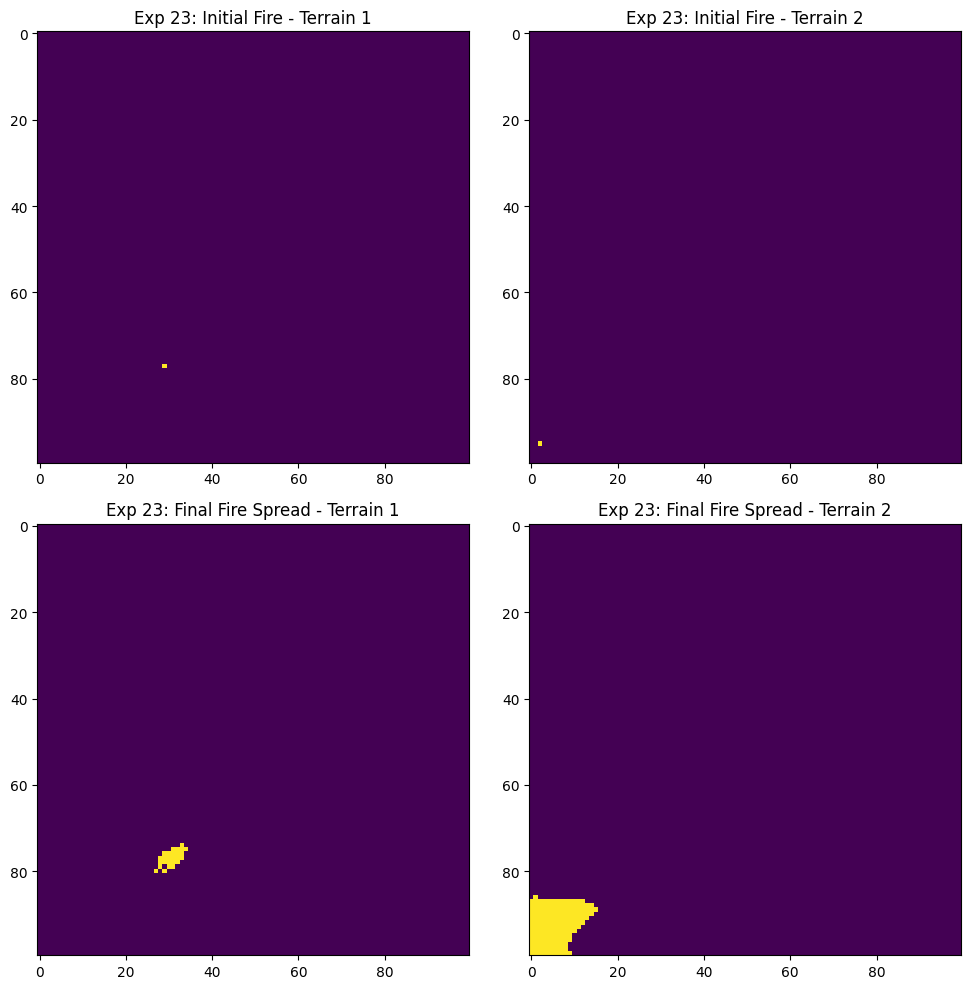

Experiment 24/100: Burned cells, Terrain 1: 157, Terrain 2: 173


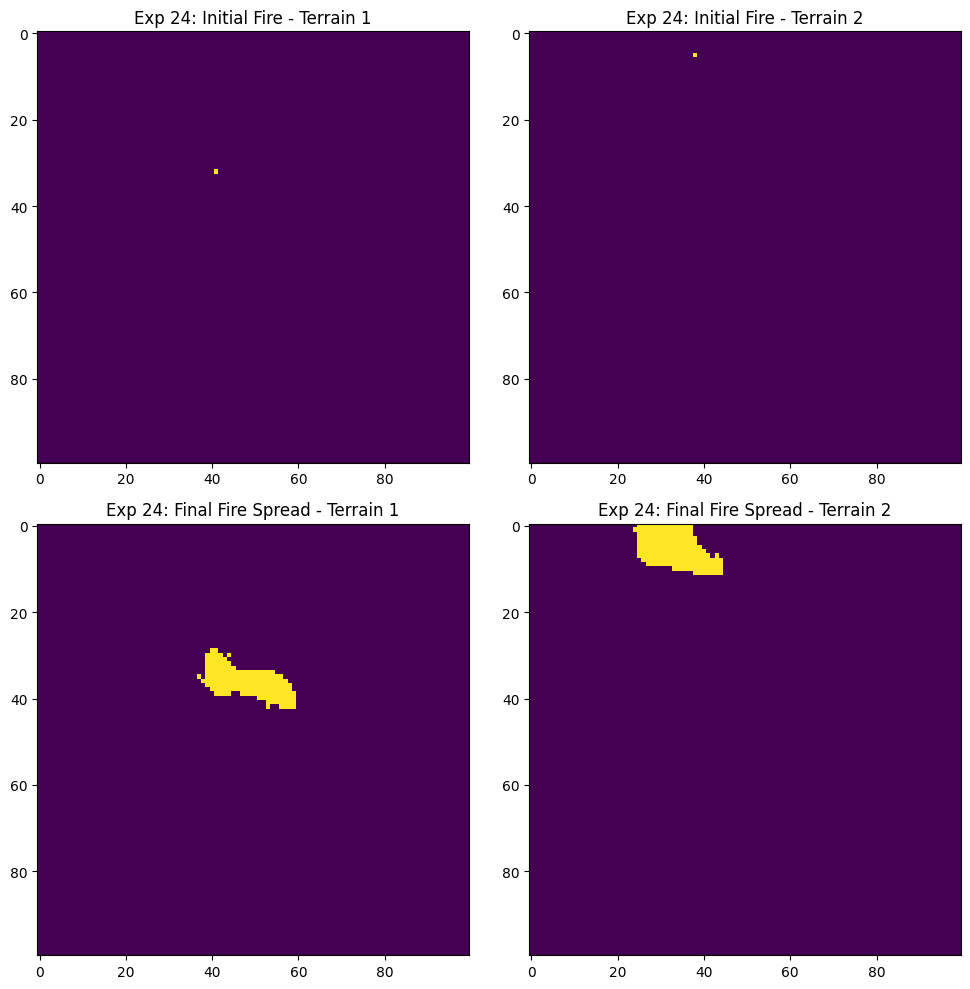

Experiment 25/100: Burned cells, Terrain 1: 159, Terrain 2: 162


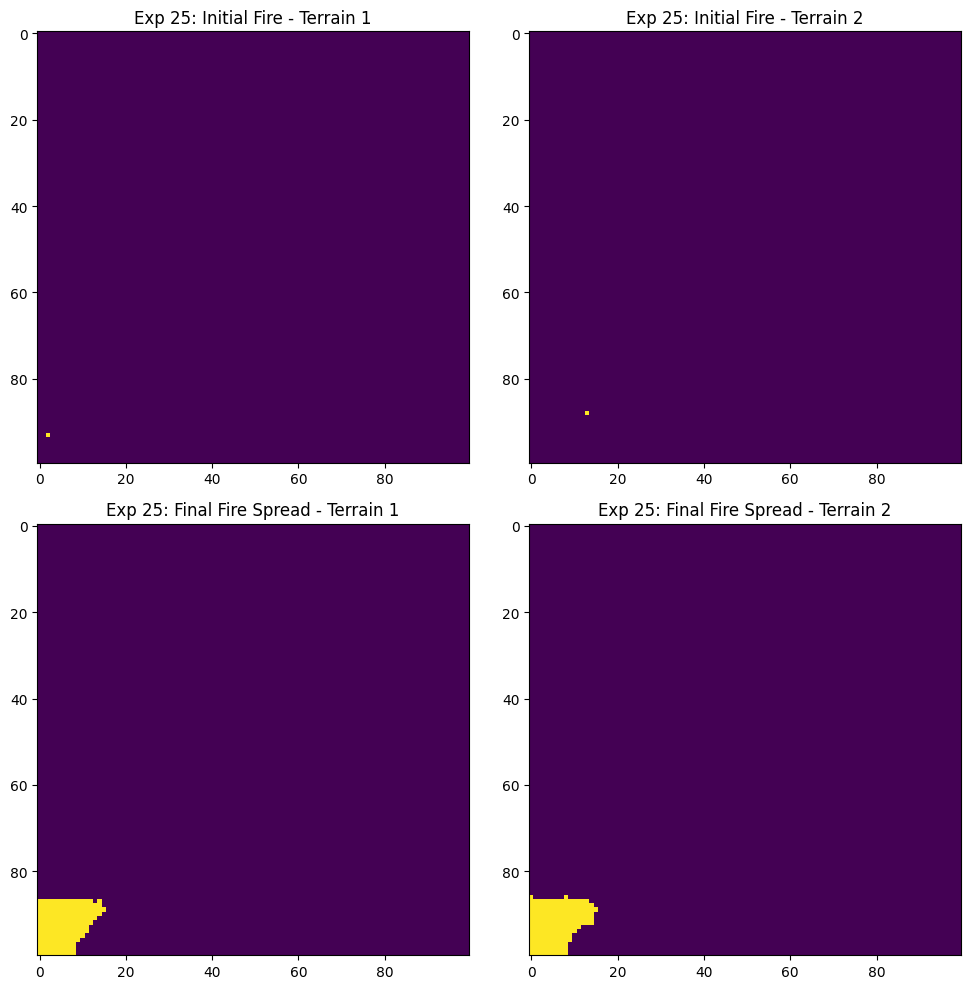

Experiment 26/100: Burned cells, Terrain 1: 159, Terrain 2: 161


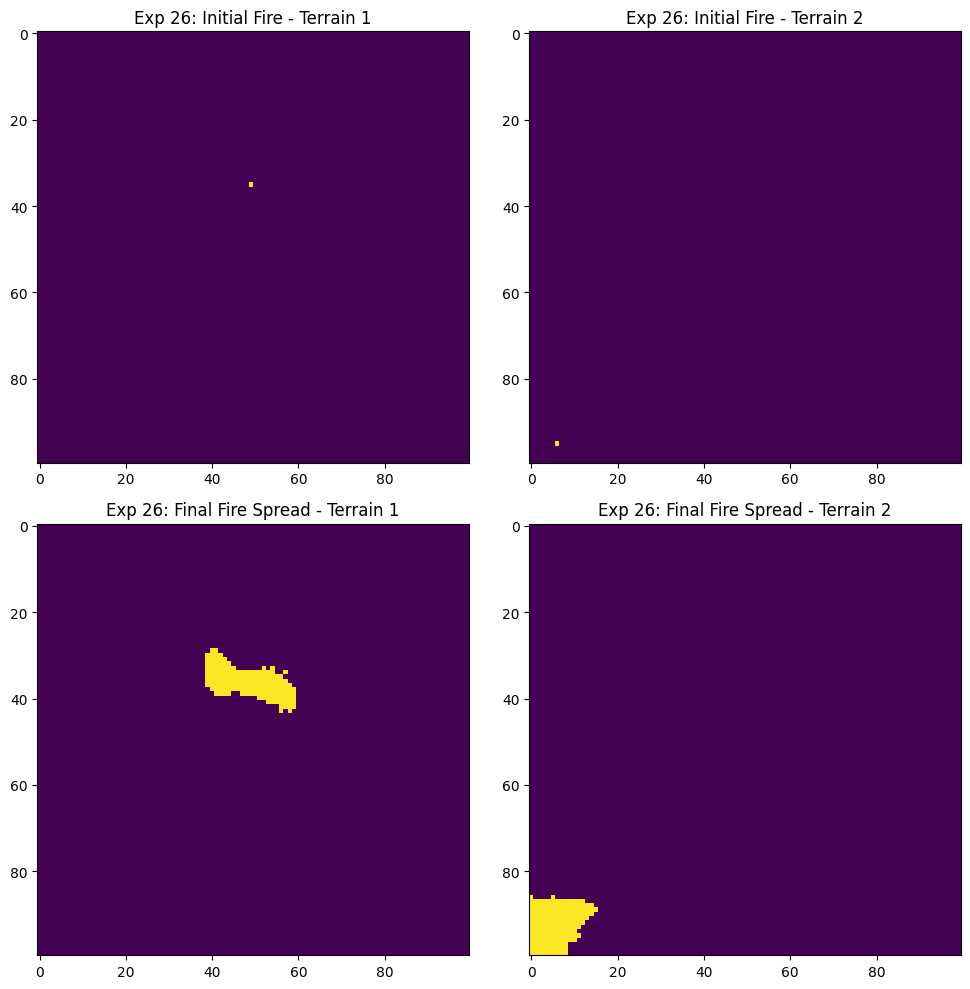

Experiment 27/100: Burned cells, Terrain 1: 77, Terrain 2: 158


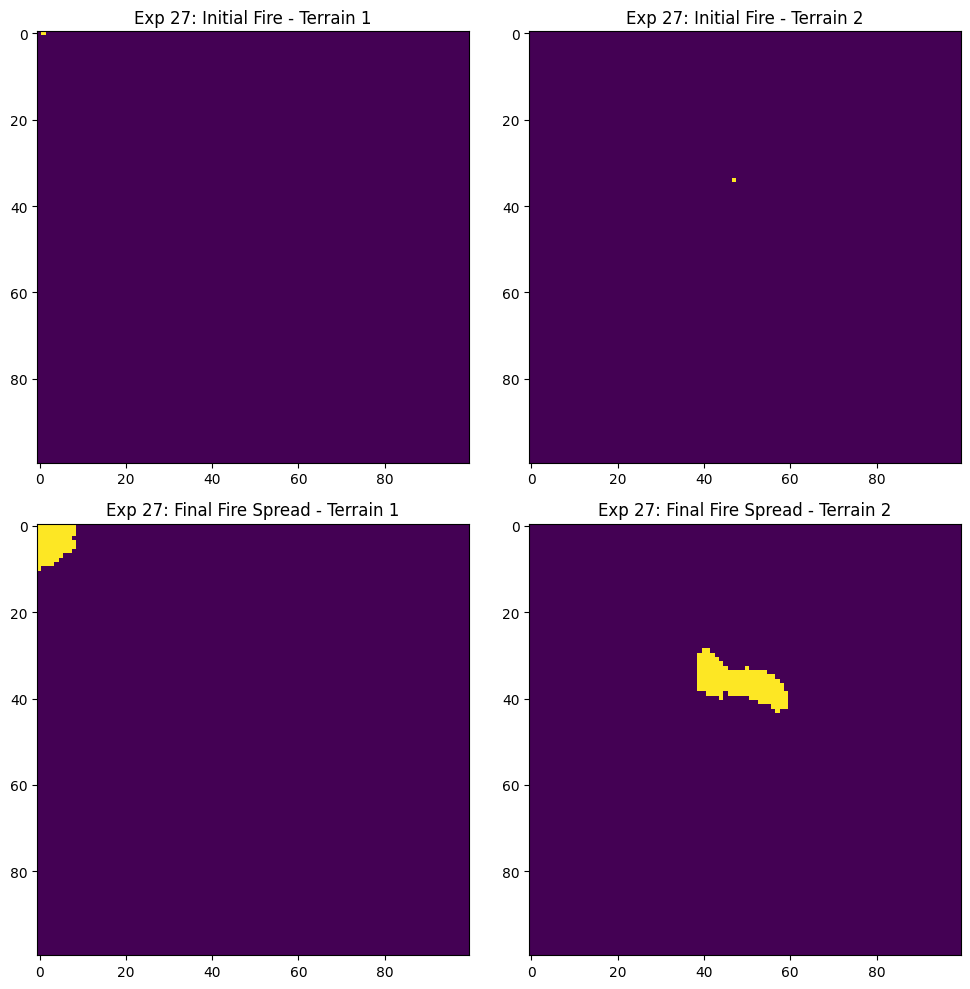

Experiment 28/100: Burned cells, Terrain 1: 160, Terrain 2: 29


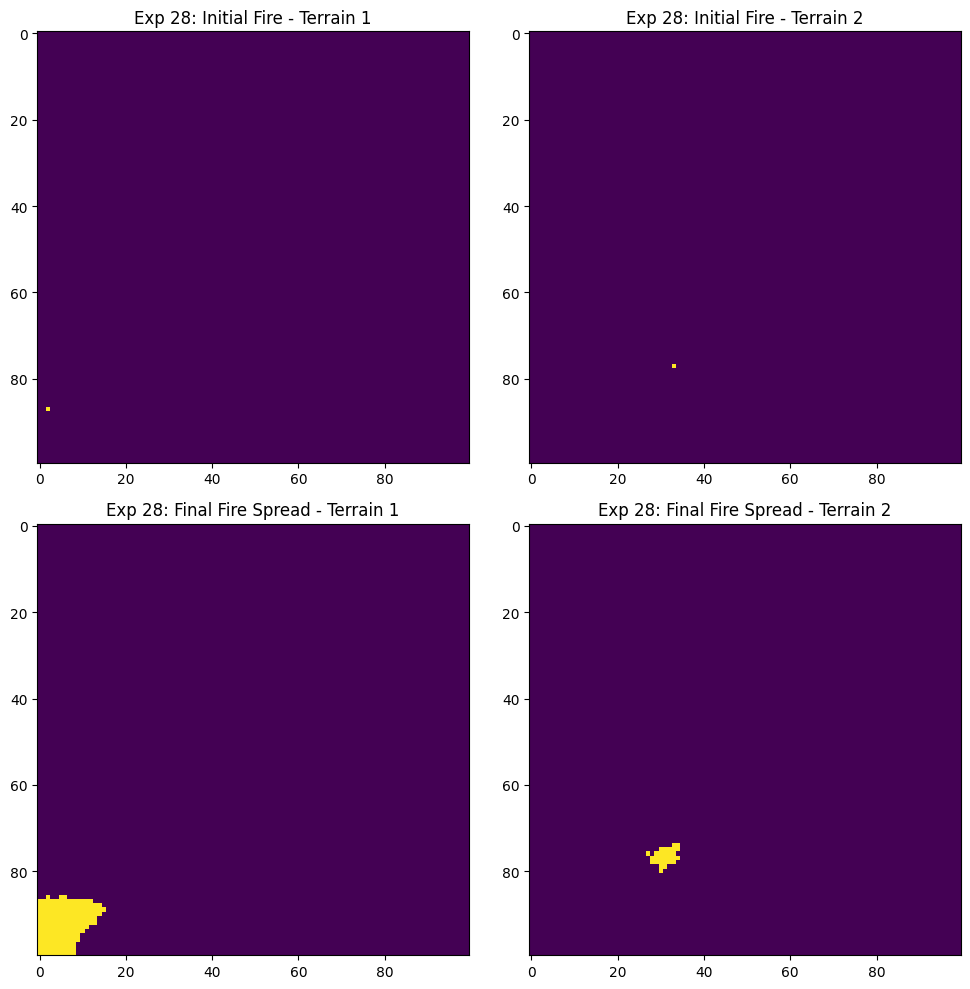

Experiment 29/100: Burned cells, Terrain 1: 160, Terrain 2: 160


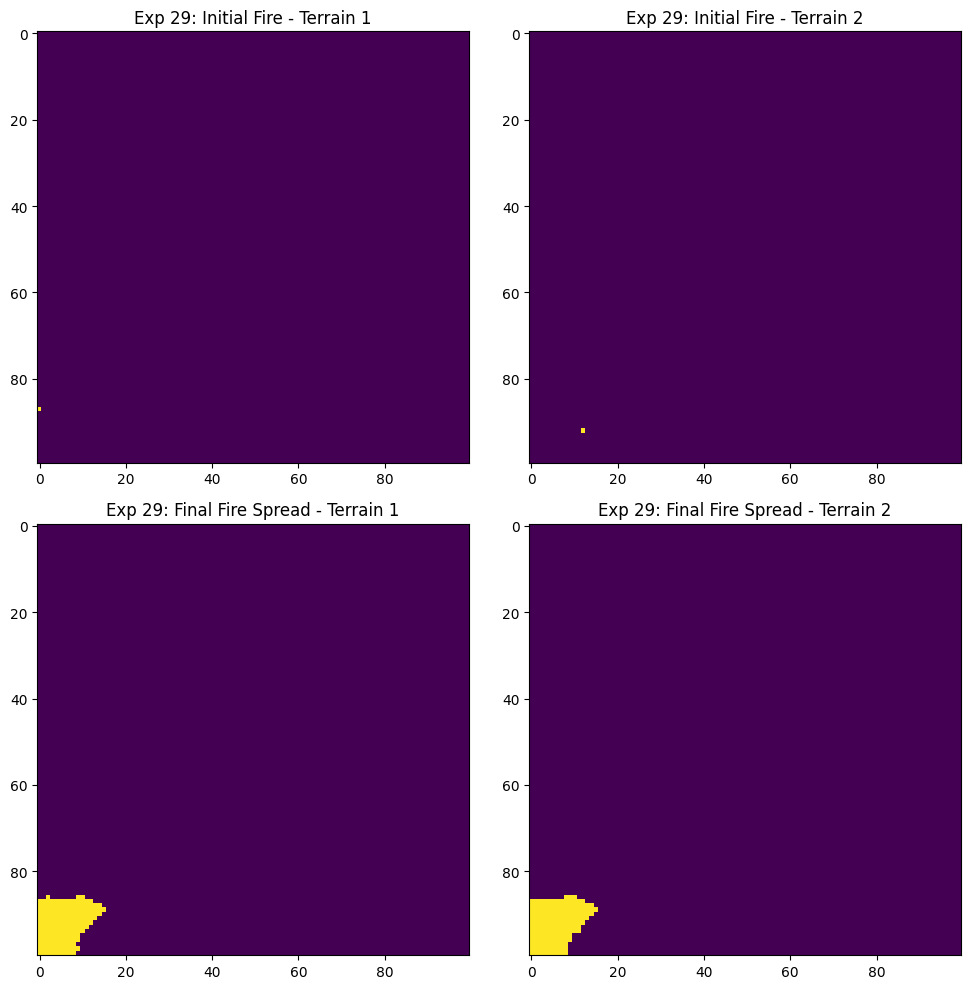

Experiment 30/100: Burned cells, Terrain 1: 180, Terrain 2: 159


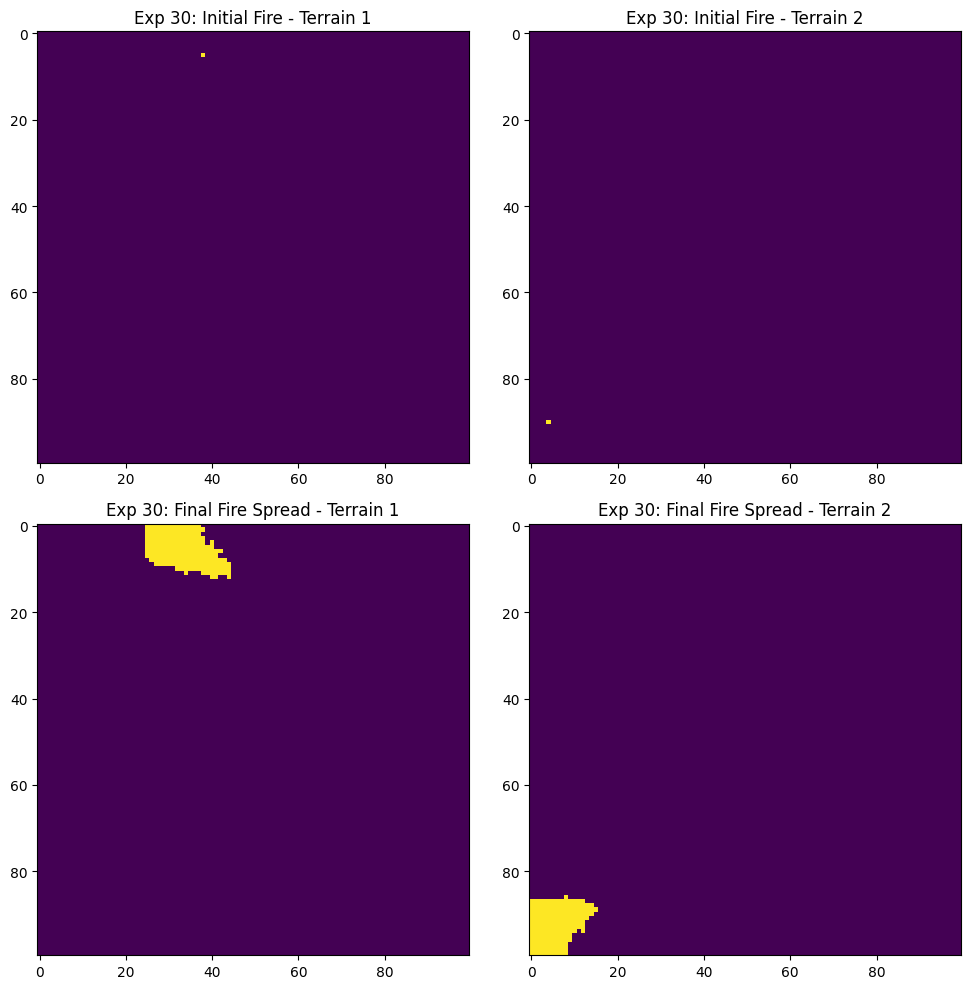

Experiment 31/100: Burned cells, Terrain 1: 156, Terrain 2: 24


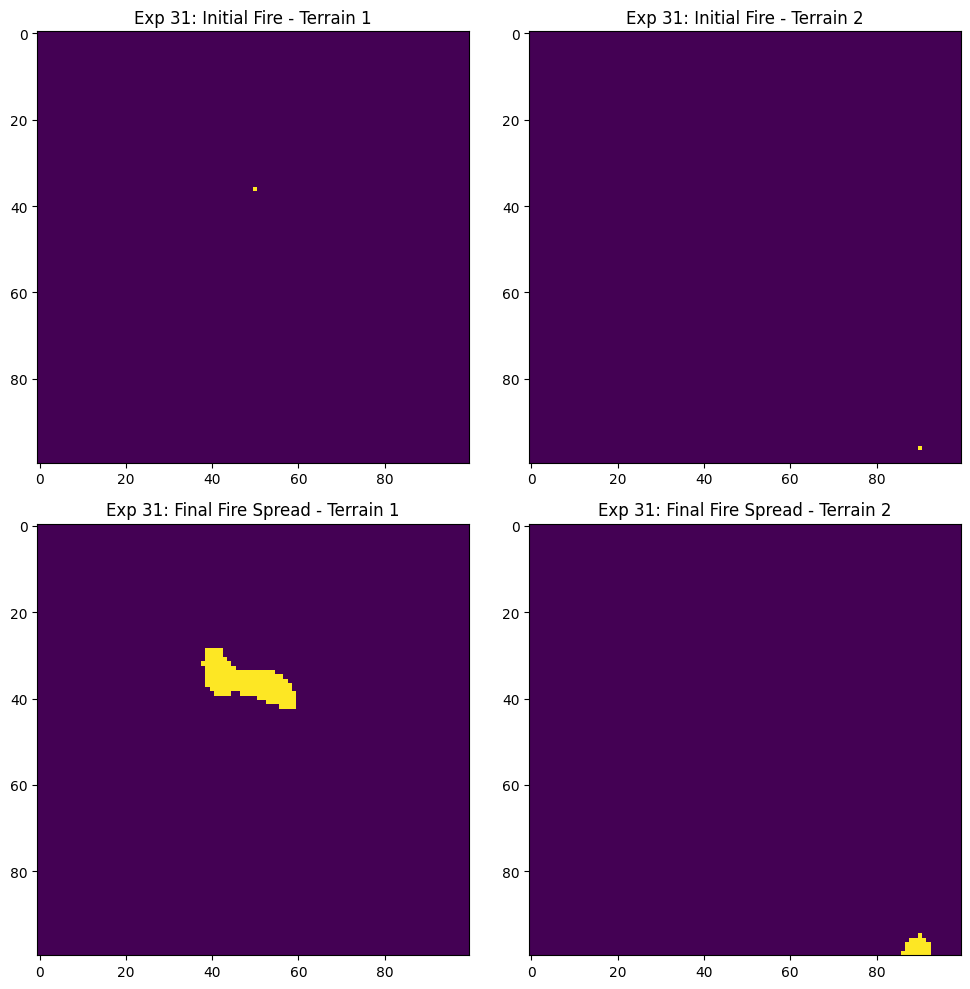

Experiment 32/100: Burned cells, Terrain 1: 178, Terrain 2: 158


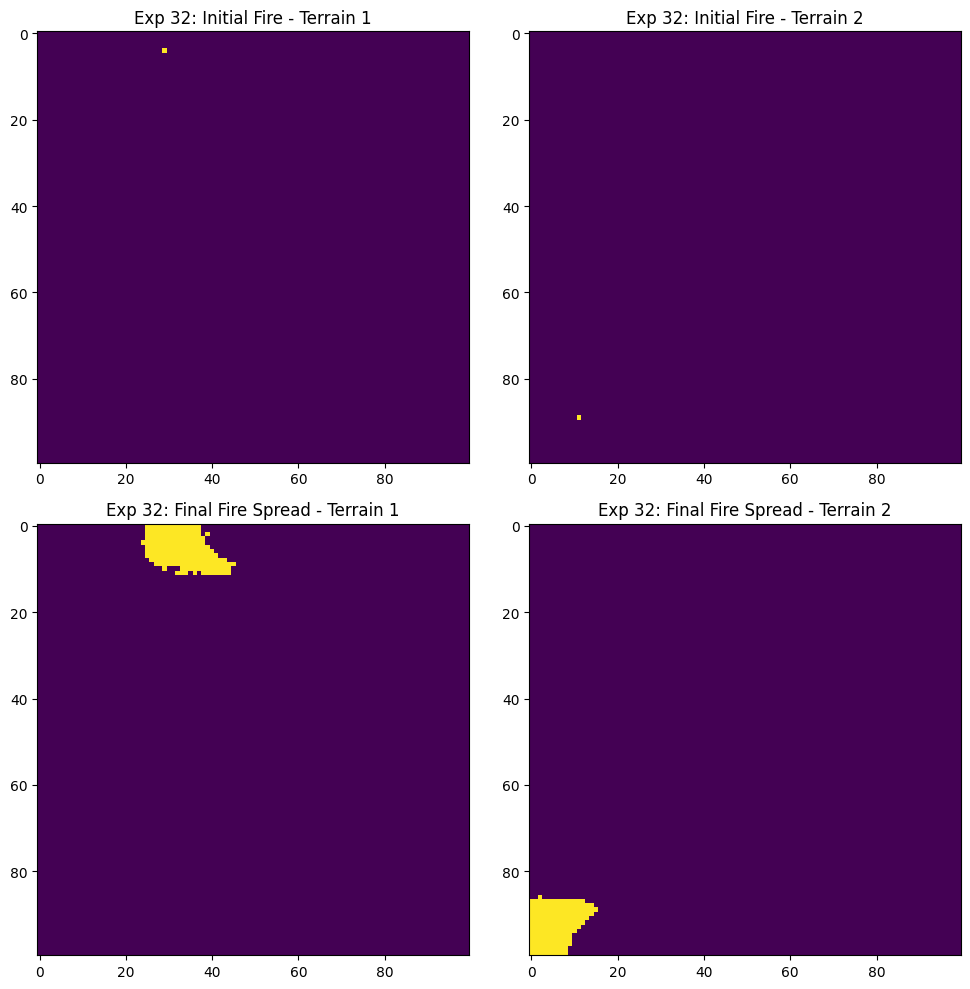

Experiment 33/100: Burned cells, Terrain 1: 159, Terrain 2: 29


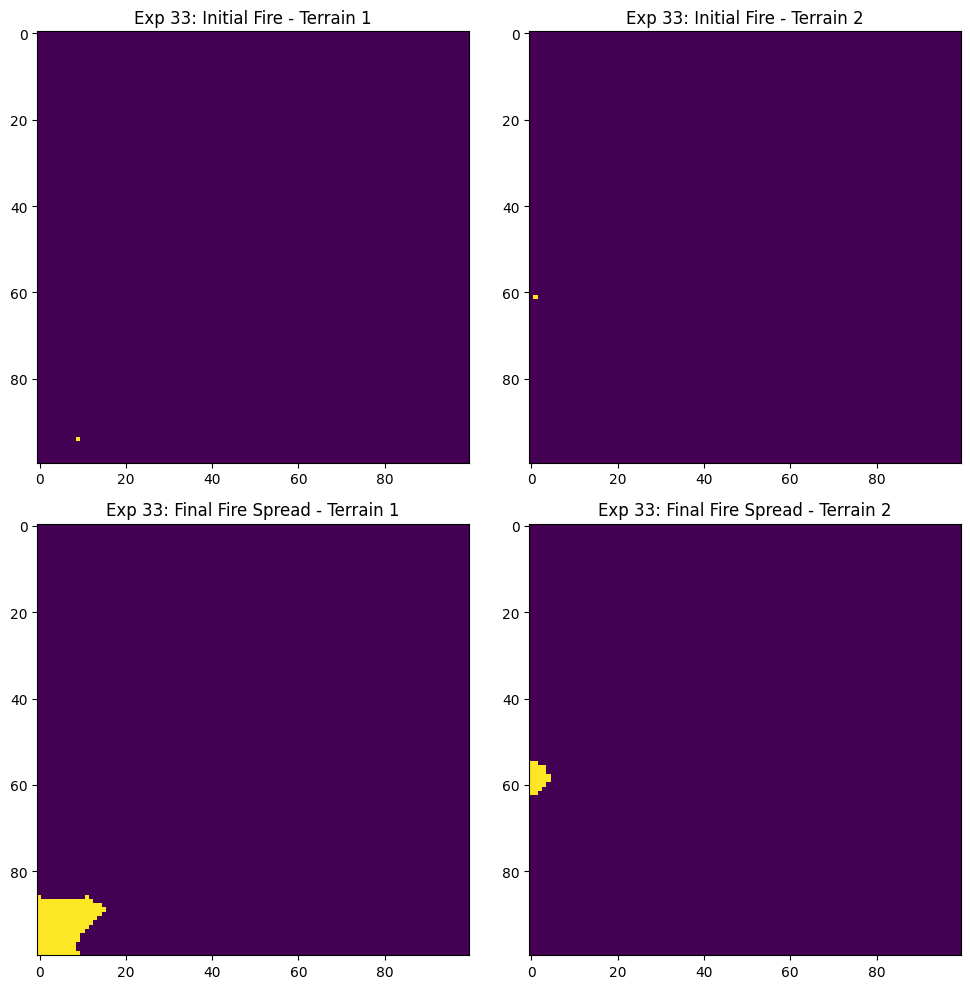

Experiment 34/100: Burned cells, Terrain 1: 160, Terrain 2: 157


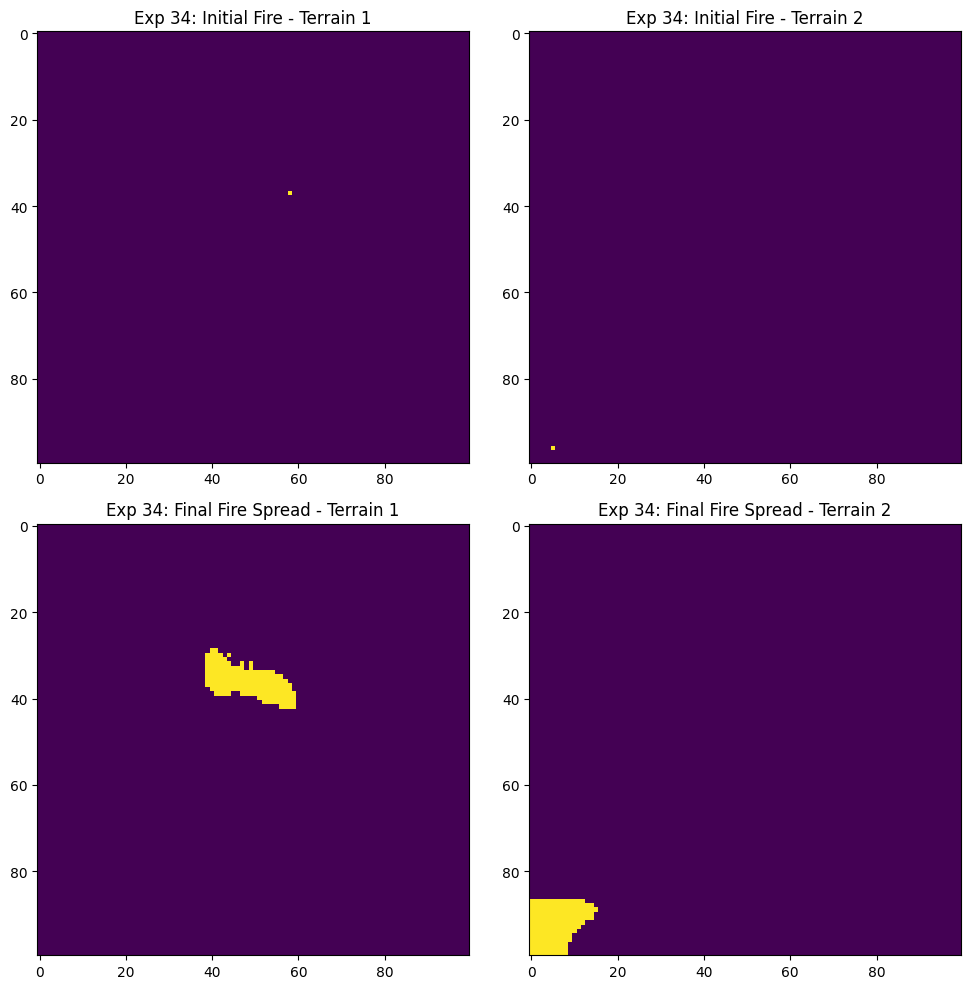

Experiment 35/100: Burned cells, Terrain 1: 161, Terrain 2: 159


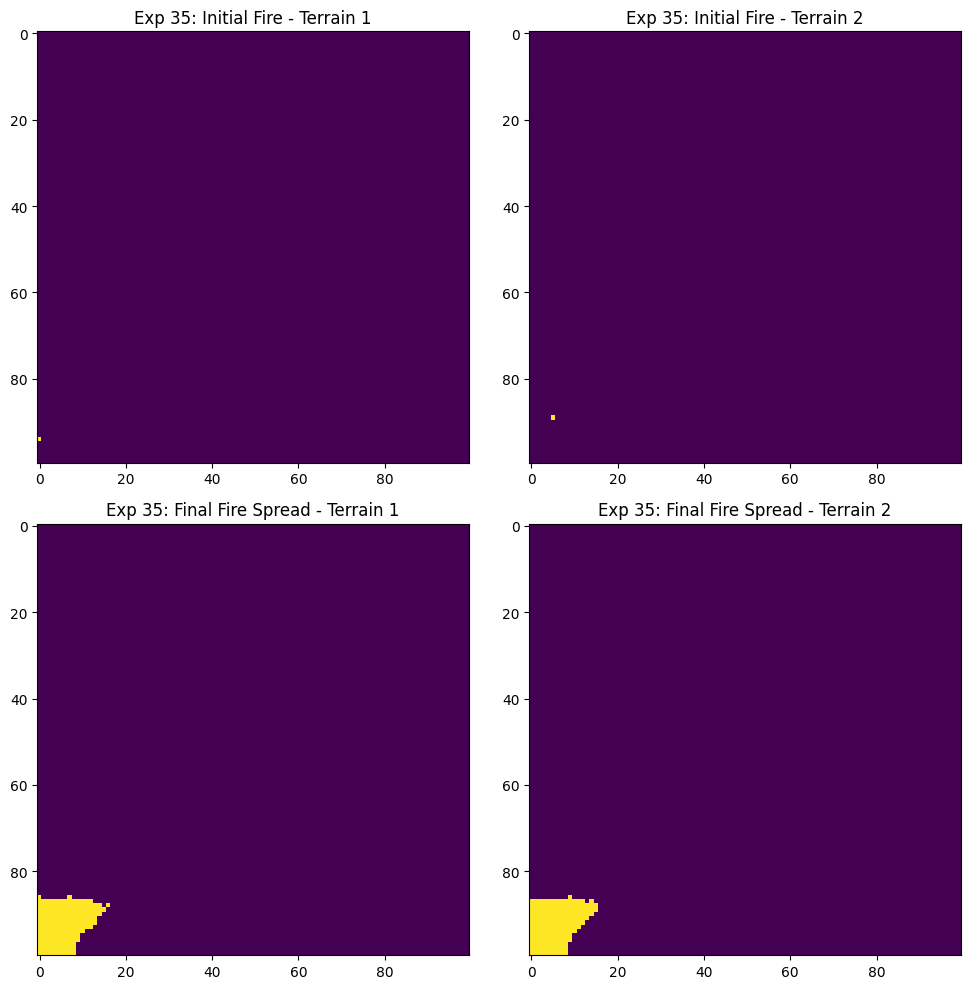

Experiment 36/100: Burned cells, Terrain 1: 165, Terrain 2: 180


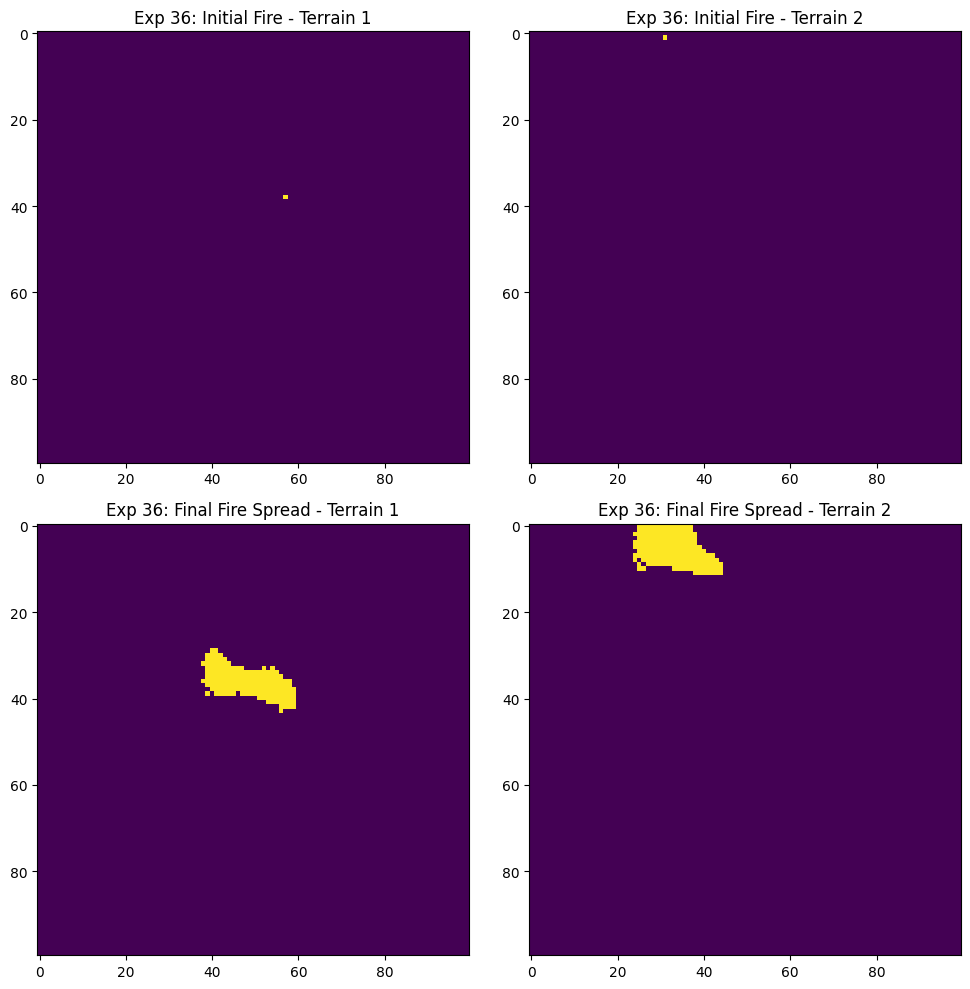

Experiment 37/100: Burned cells, Terrain 1: 25, Terrain 2: 162


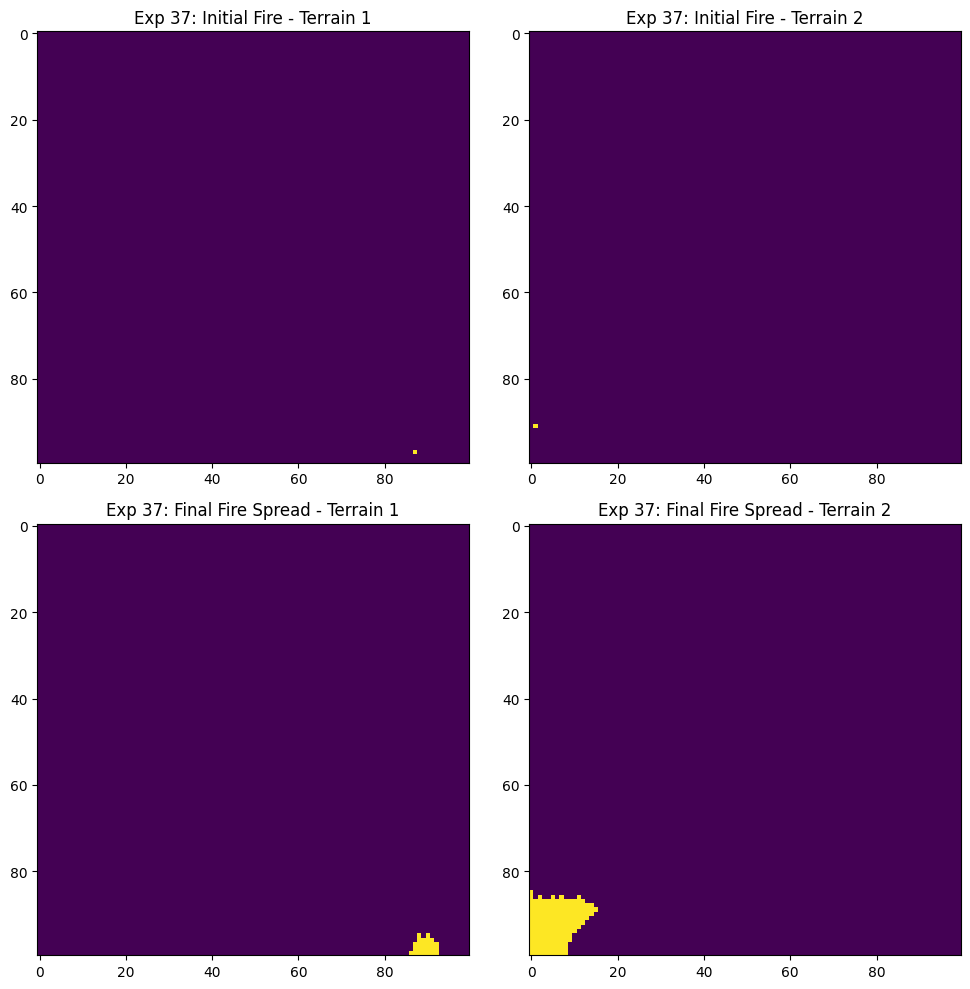

Experiment 38/100: Burned cells, Terrain 1: 160, Terrain 2: 175


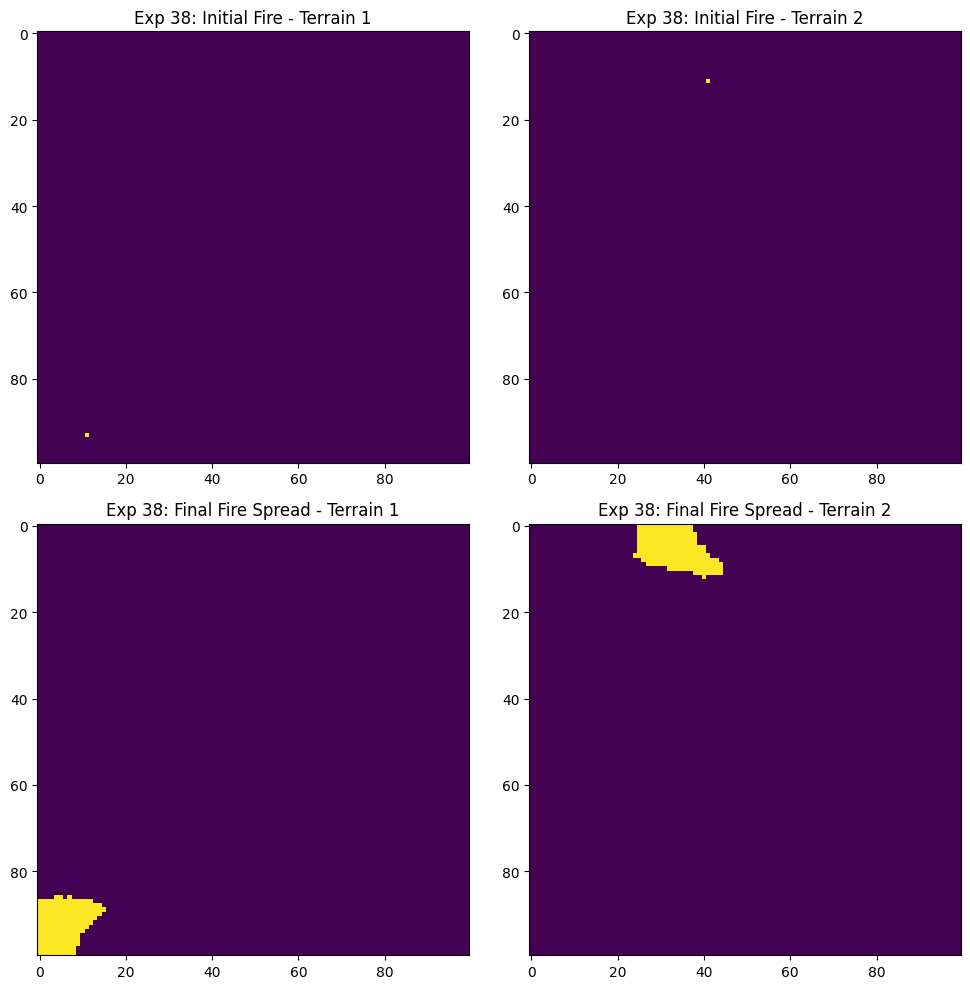

Experiment 39/100: Burned cells, Terrain 1: 177, Terrain 2: 24


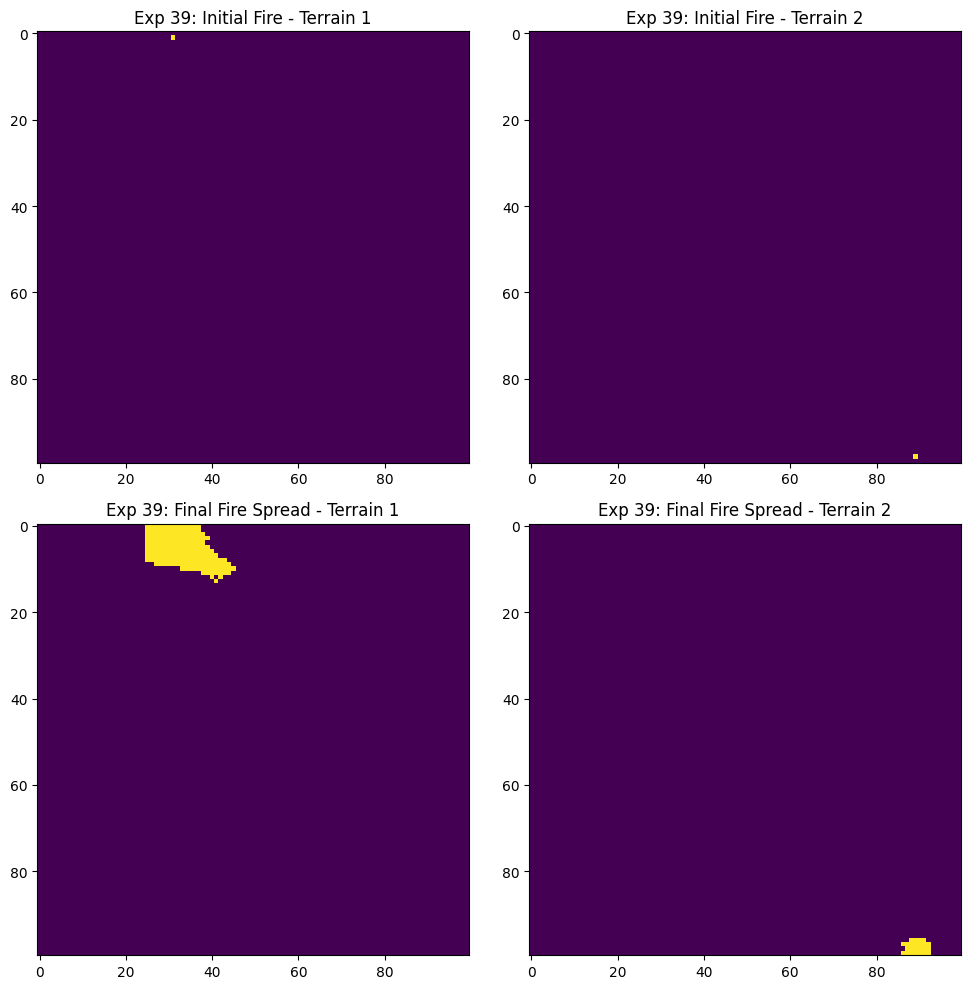

Experiment 40/100: Burned cells, Terrain 1: 158, Terrain 2: 30


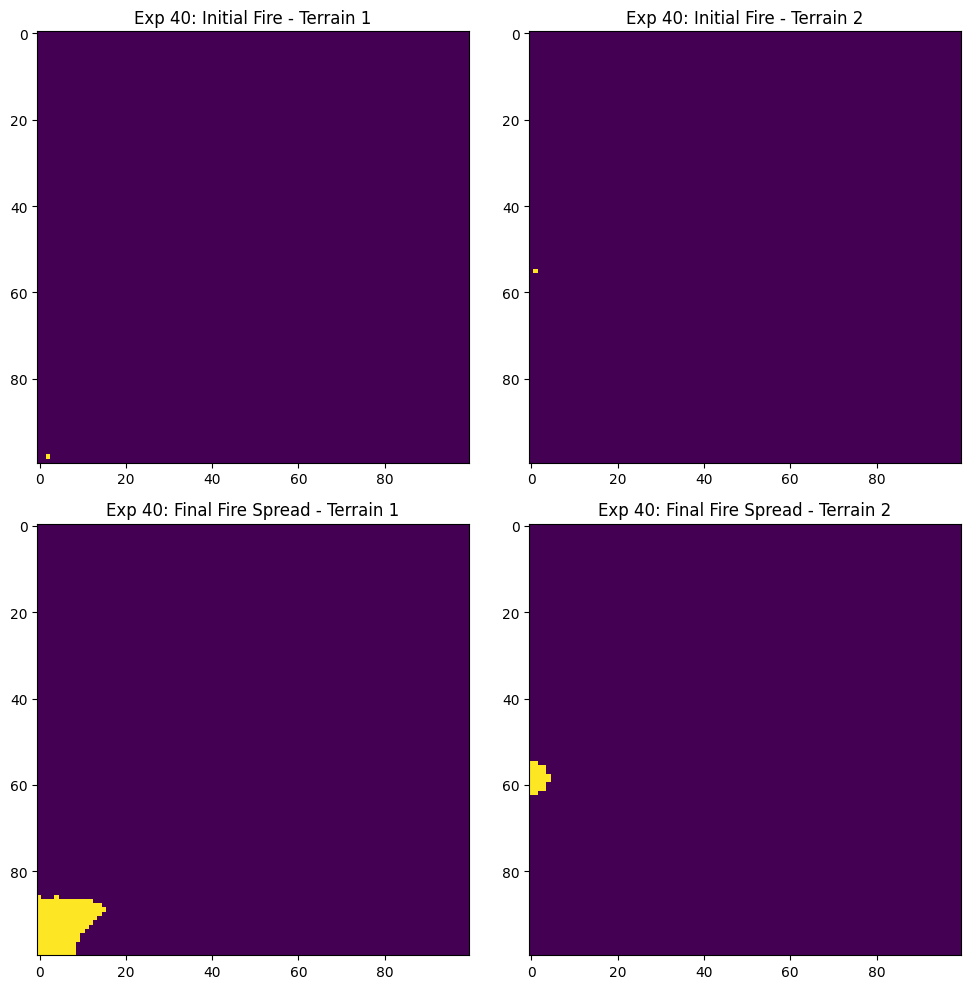

Experiment 41/100: Burned cells, Terrain 1: 23, Terrain 2: 161


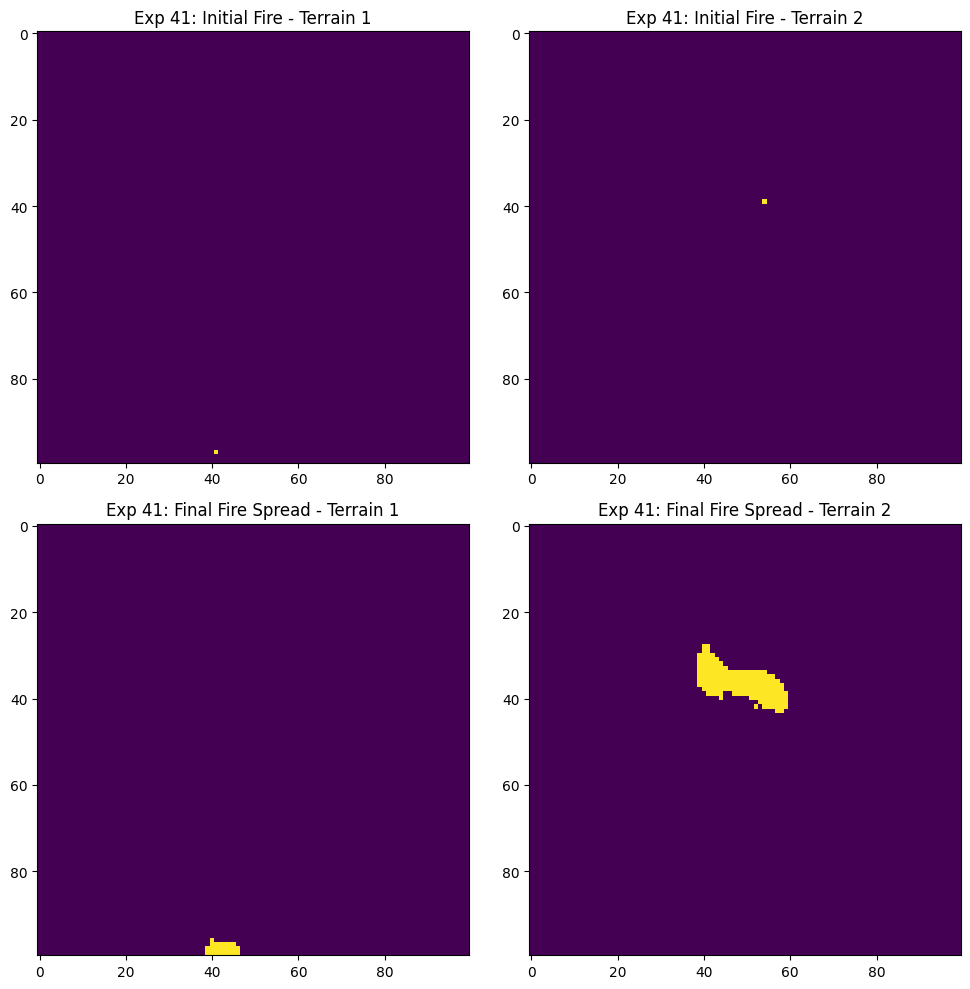

Experiment 42/100: Burned cells, Terrain 1: 74, Terrain 2: 76


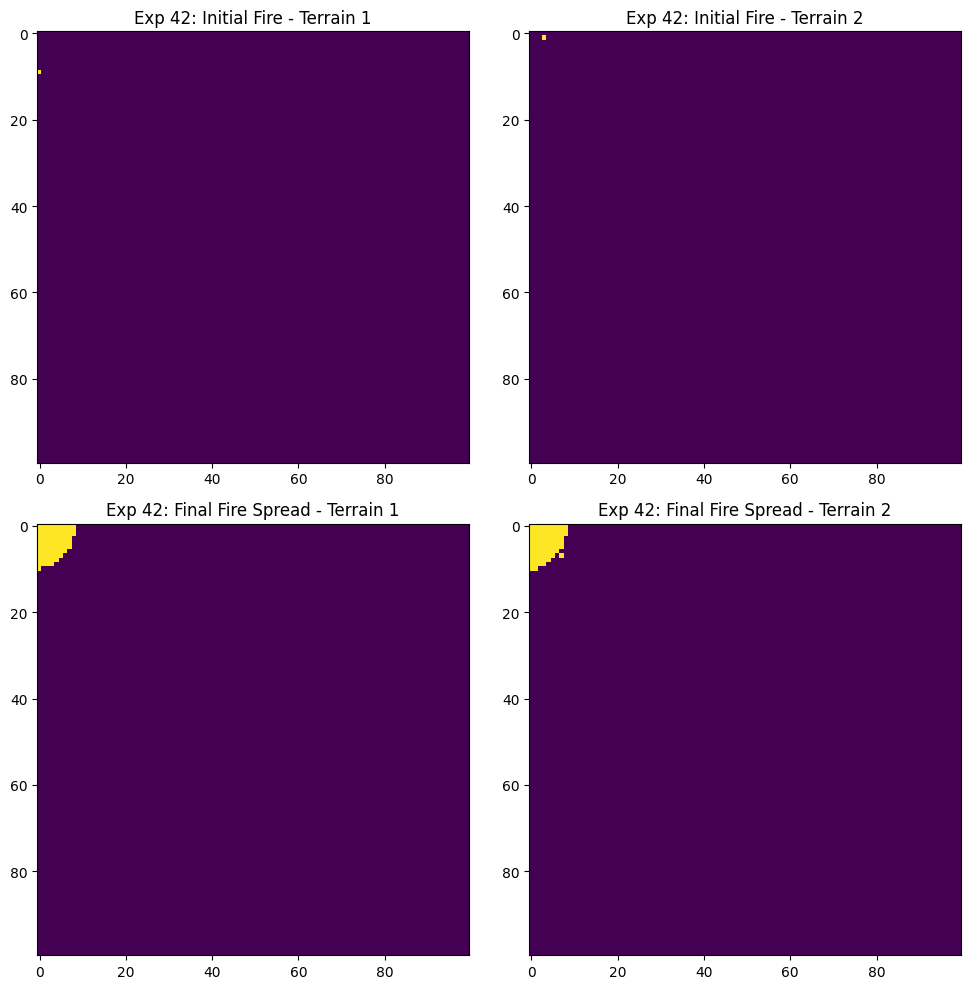

Experiment 43/100: Burned cells, Terrain 1: 176, Terrain 2: 158


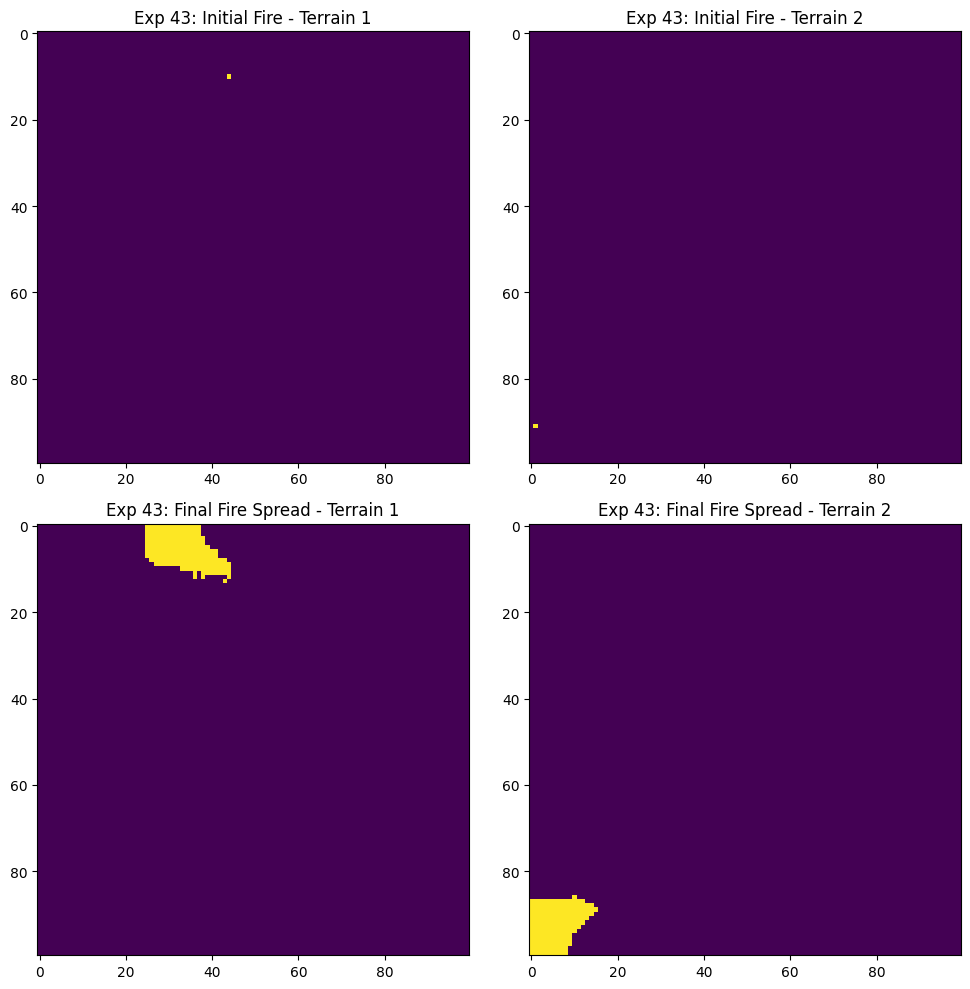

Experiment 44/100: Burned cells, Terrain 1: 163, Terrain 2: 160


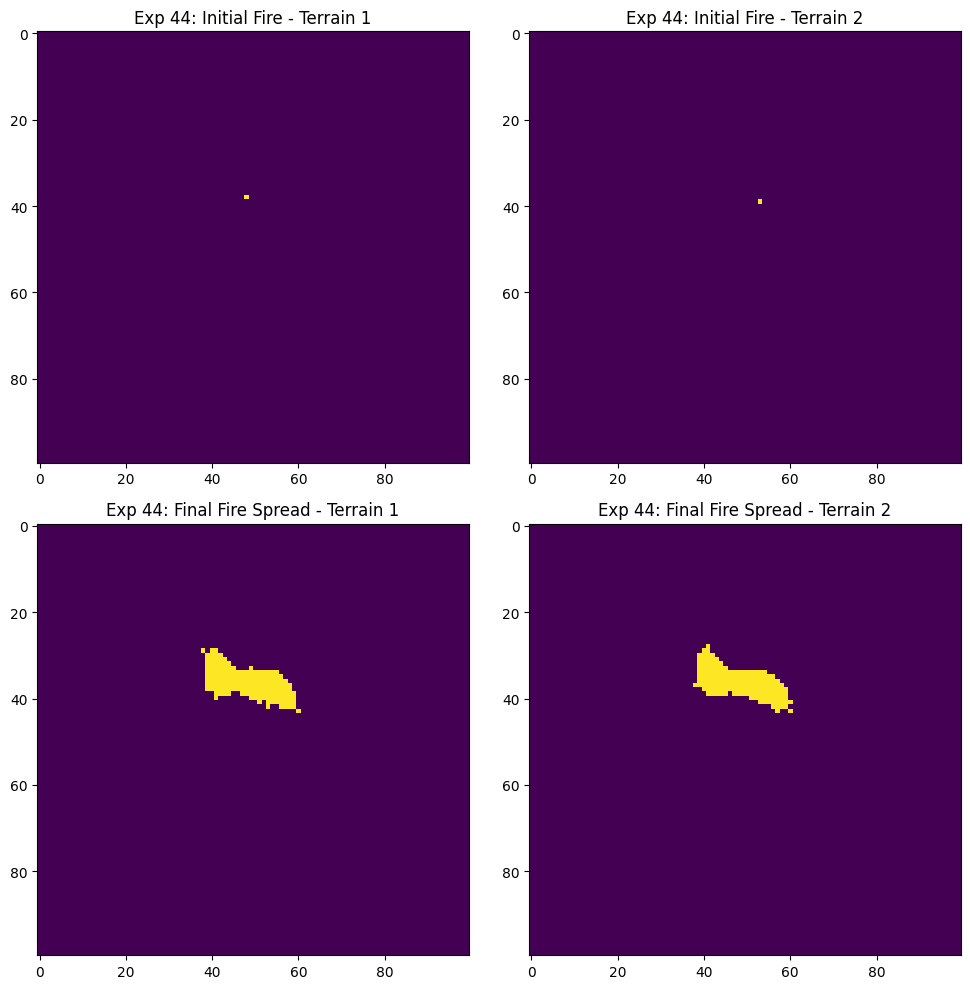

Experiment 45/100: Burned cells, Terrain 1: 174, Terrain 2: 174


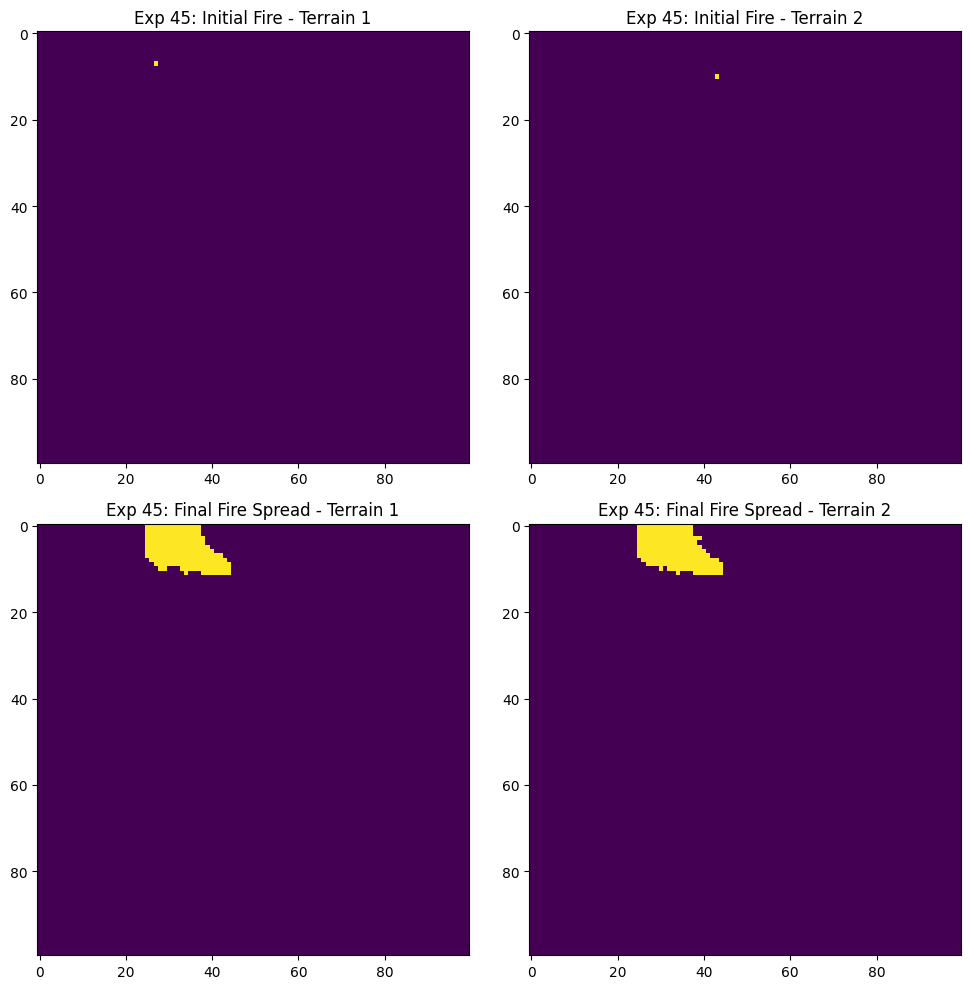

Experiment 46/100: Burned cells, Terrain 1: 11, Terrain 2: 79


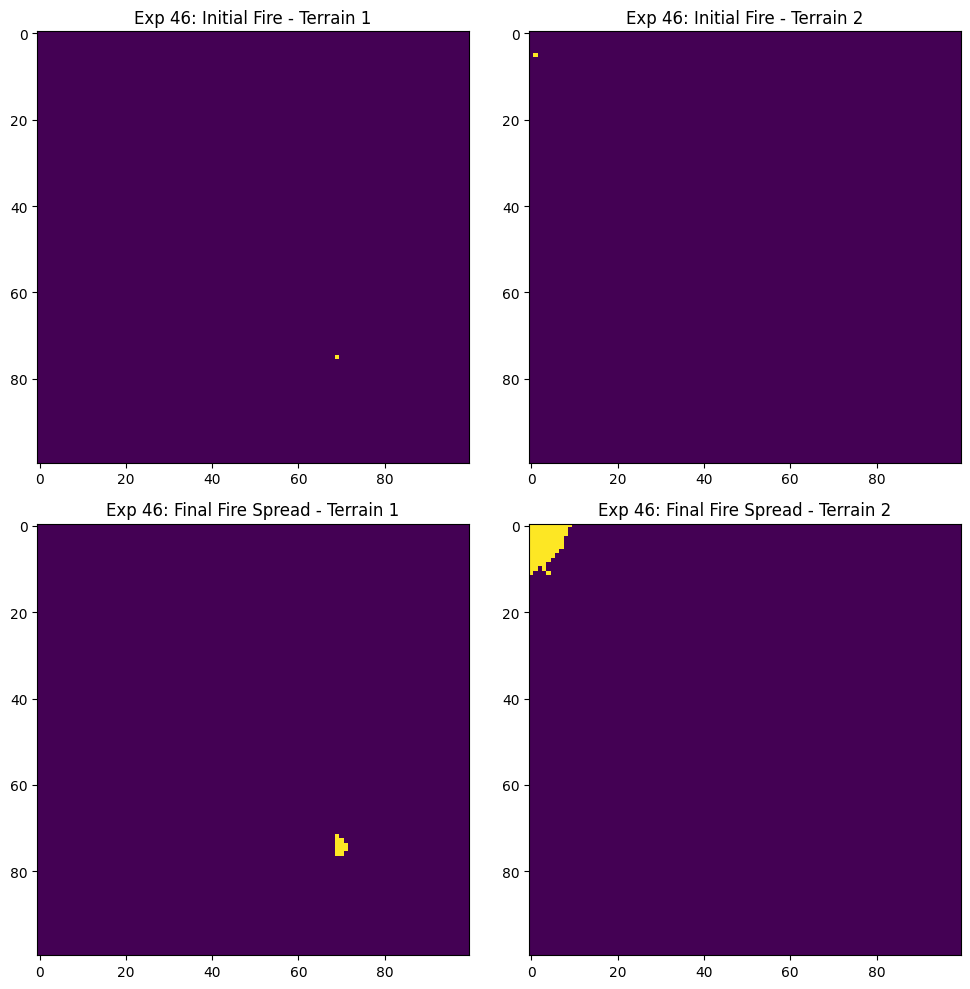

Experiment 47/100: Burned cells, Terrain 1: 157, Terrain 2: 159


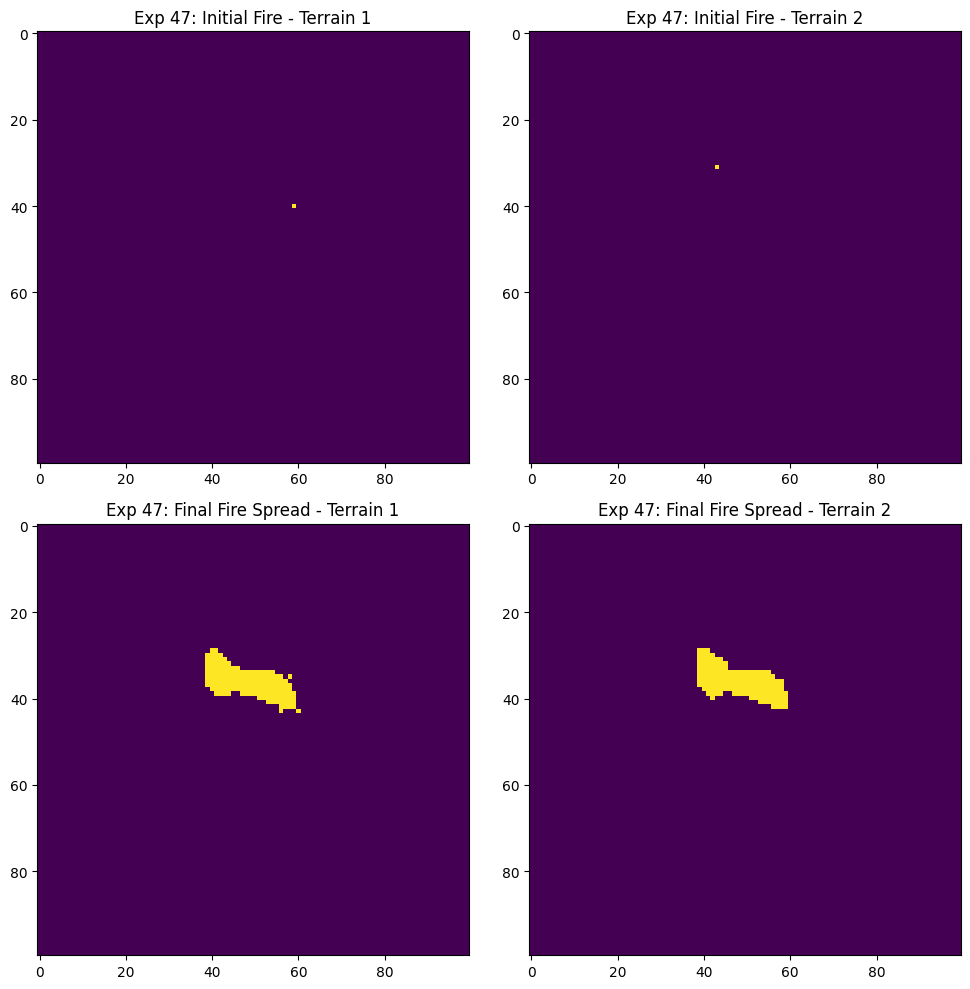

Experiment 48/100: Burned cells, Terrain 1: 177, Terrain 2: 156


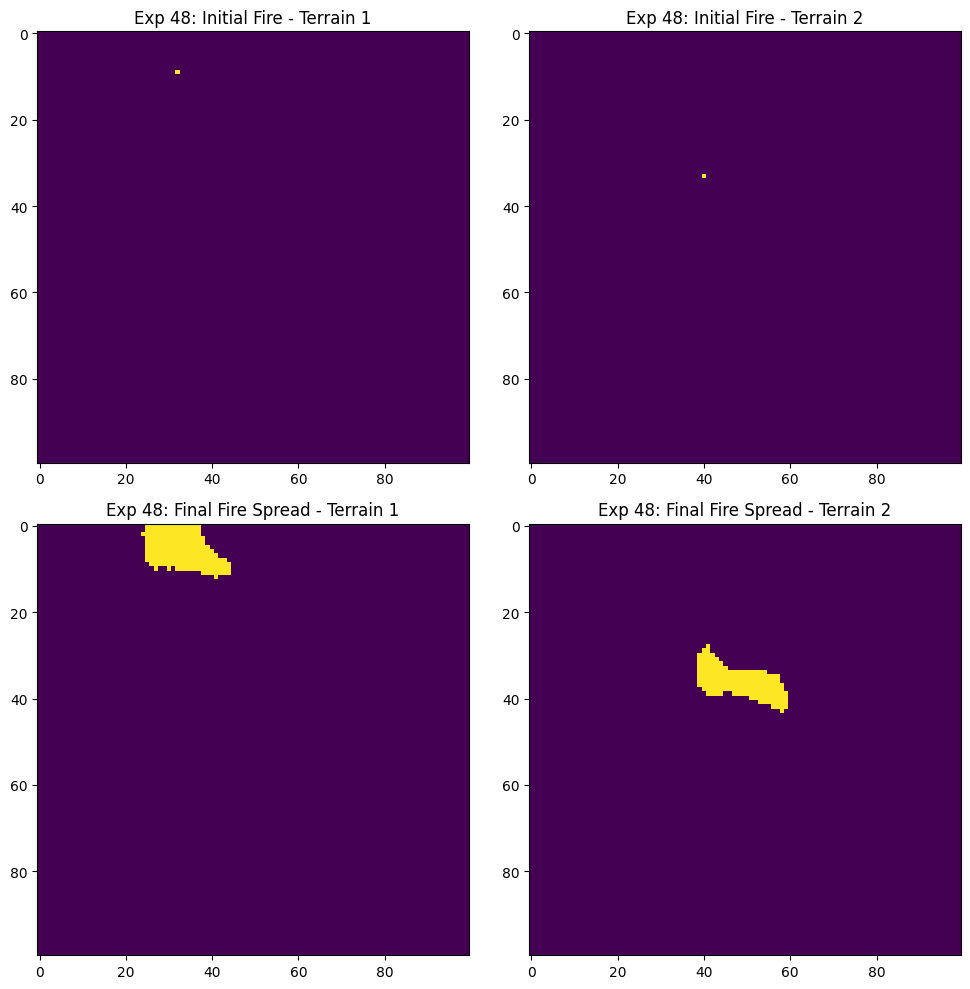

Experiment 49/100: Burned cells, Terrain 1: 159, Terrain 2: 75


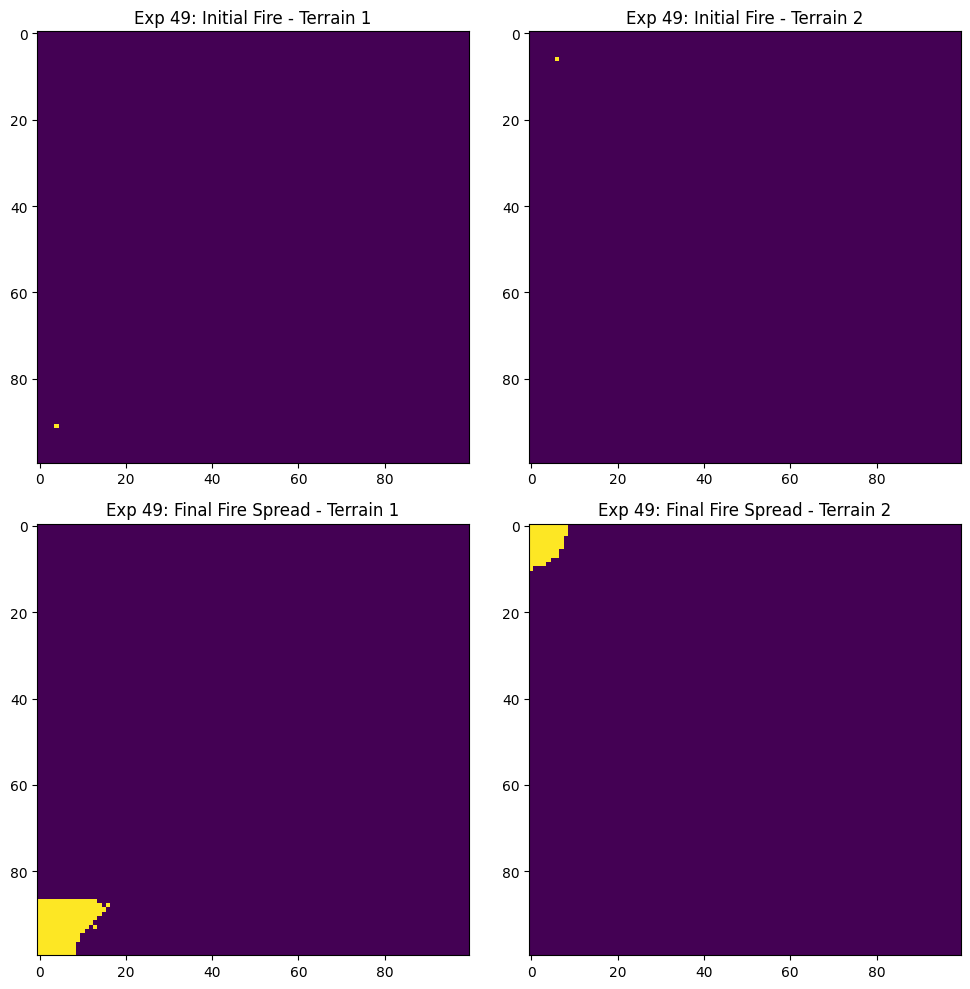

Experiment 50/100: Burned cells, Terrain 1: 174, Terrain 2: 178


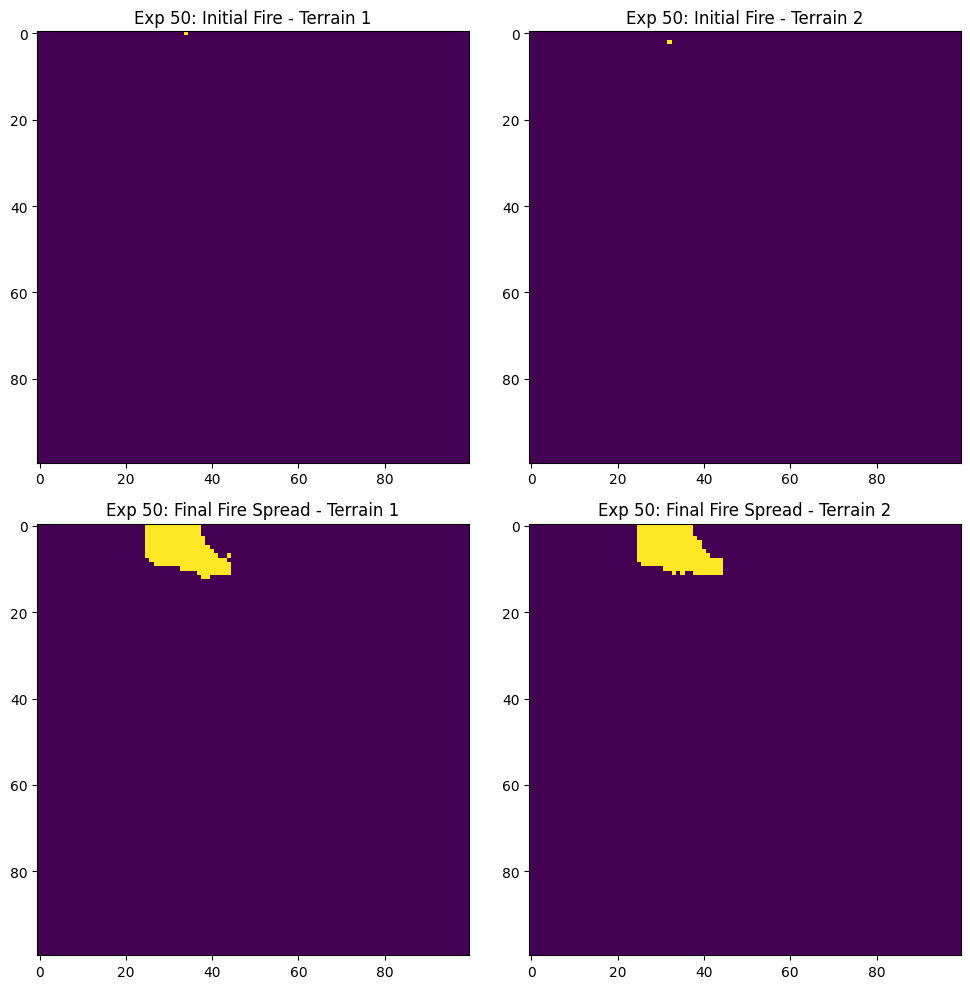

Experiment 51/100: Burned cells, Terrain 1: 160, Terrain 2: 29


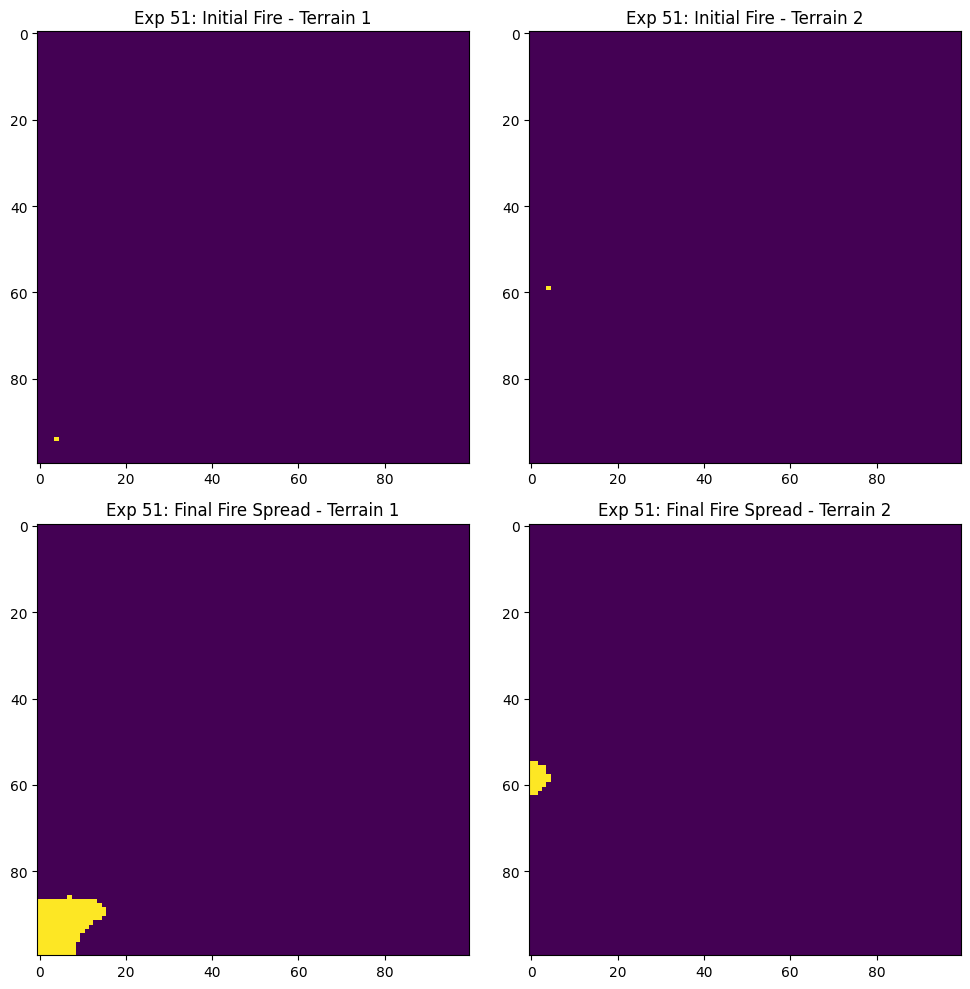

Experiment 52/100: Burned cells, Terrain 1: 32, Terrain 2: 76


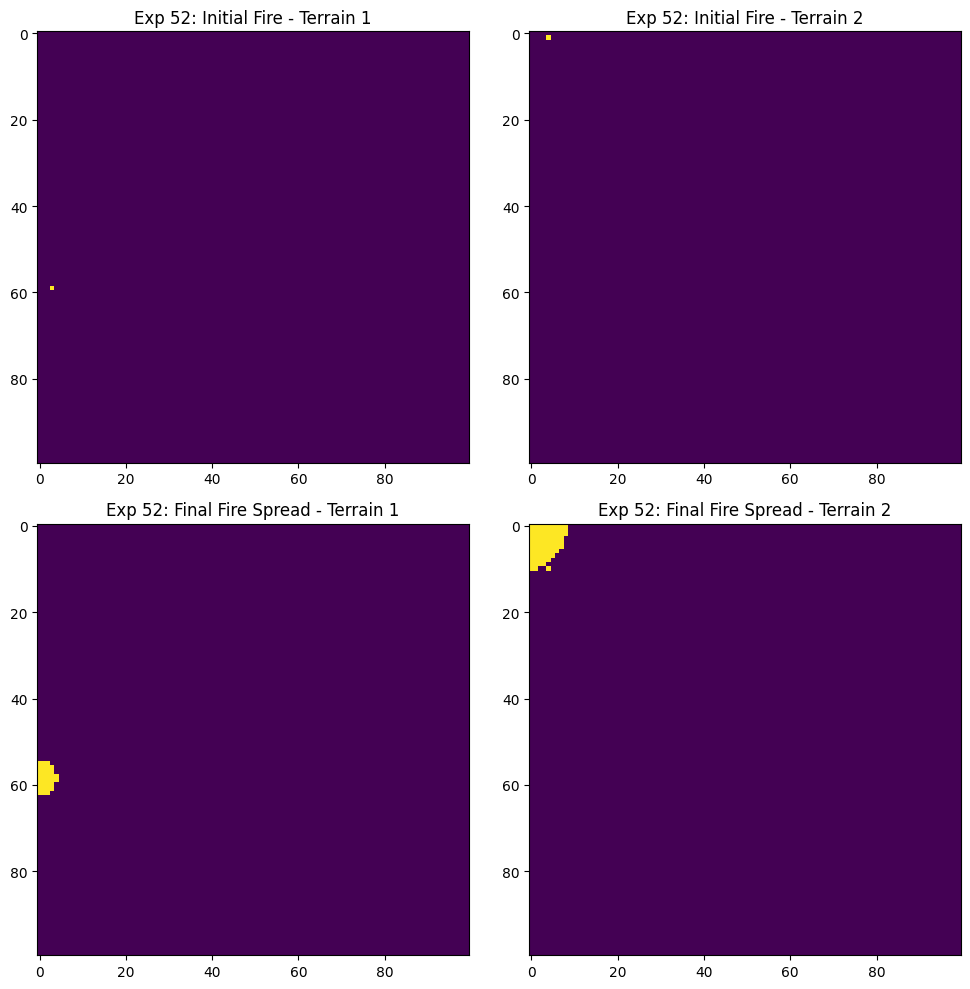

Experiment 53/100: Burned cells, Terrain 1: 173, Terrain 2: 158


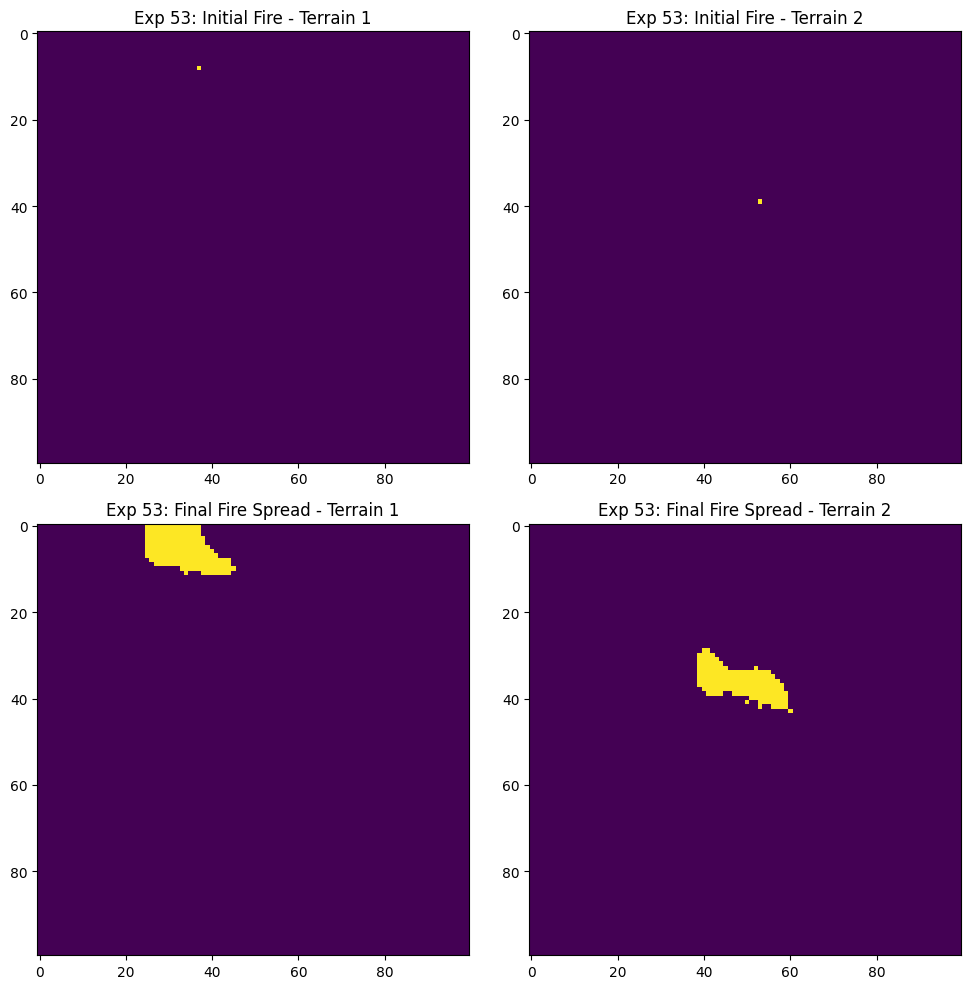

Experiment 54/100: Burned cells, Terrain 1: 173, Terrain 2: 30


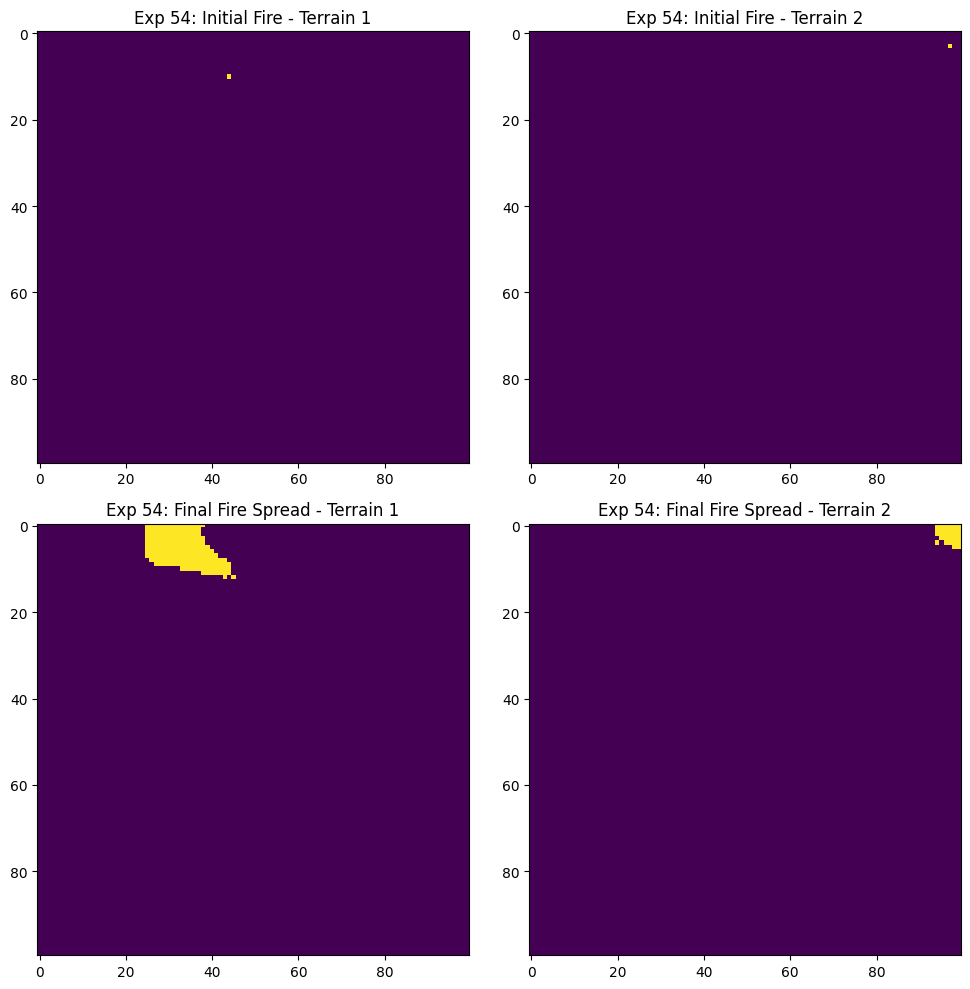

Experiment 55/100: Burned cells, Terrain 1: 31, Terrain 2: 14


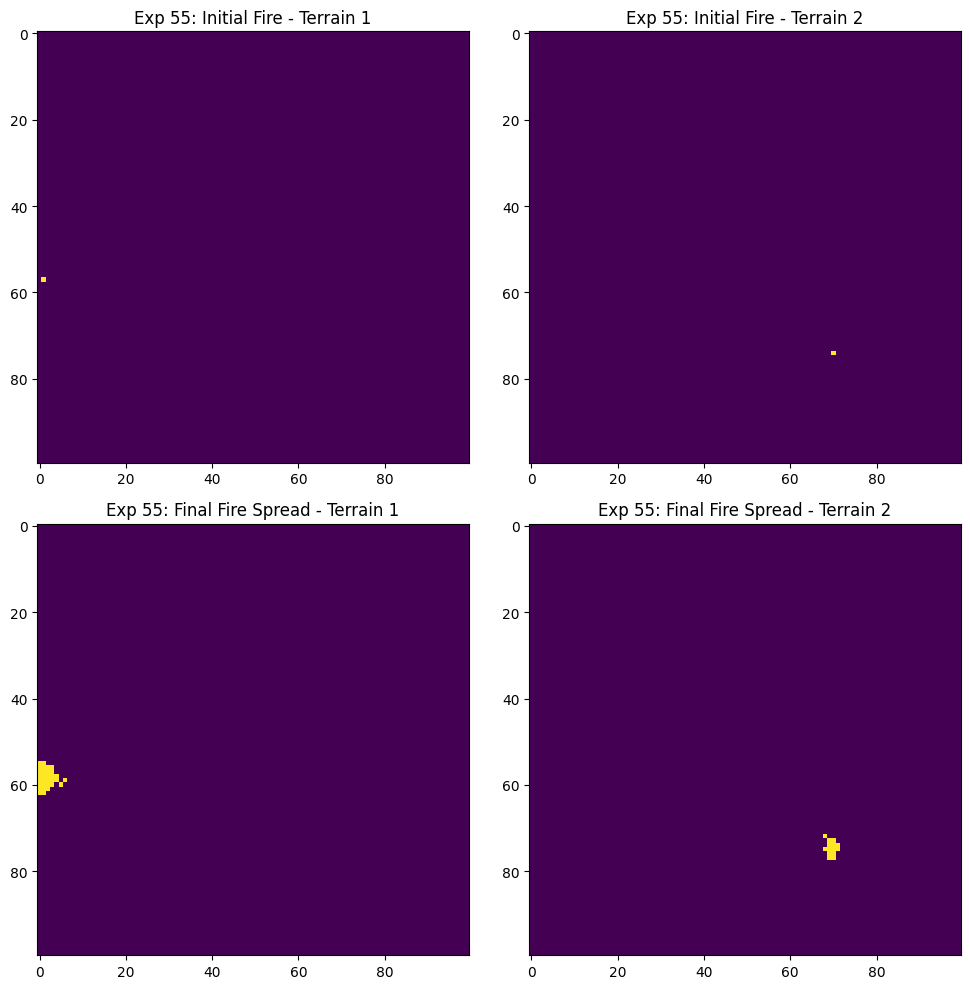

Experiment 56/100: Burned cells, Terrain 1: 156, Terrain 2: 78


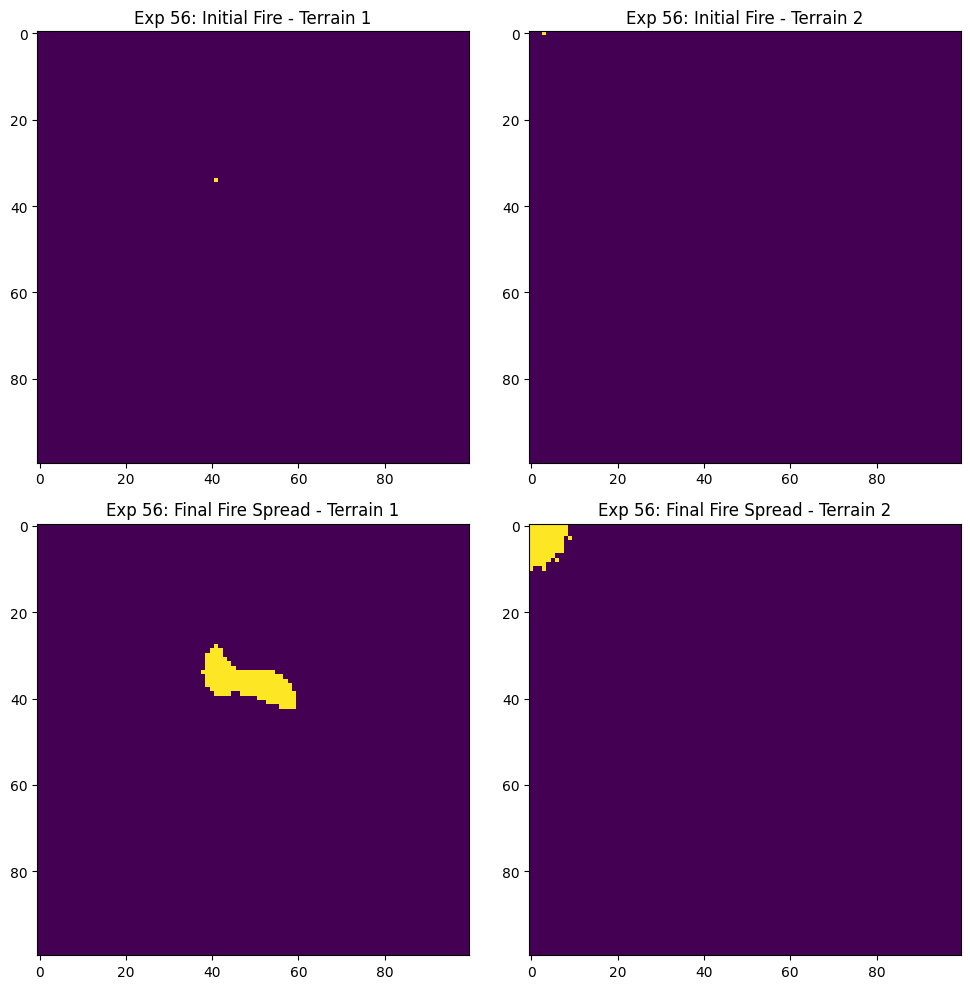

Experiment 57/100: Burned cells, Terrain 1: 161, Terrain 2: 171


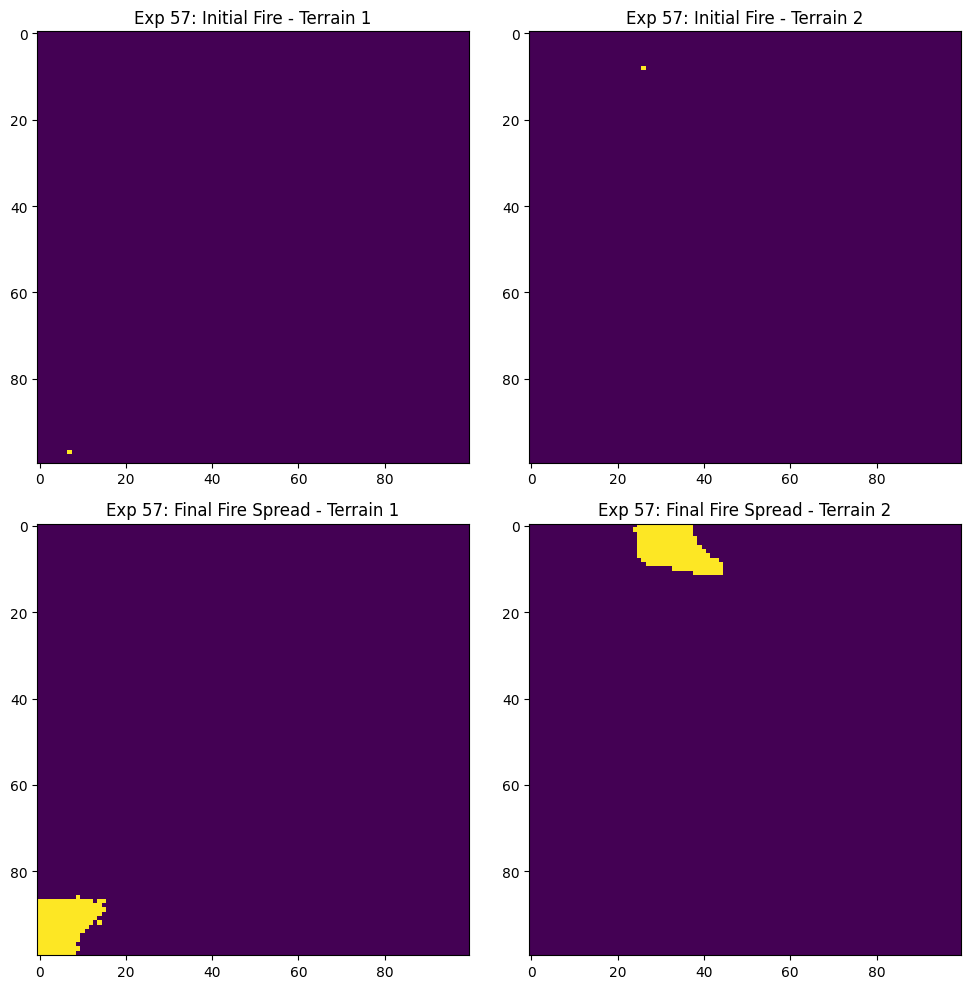

Experiment 58/100: Burned cells, Terrain 1: 27, Terrain 2: 24


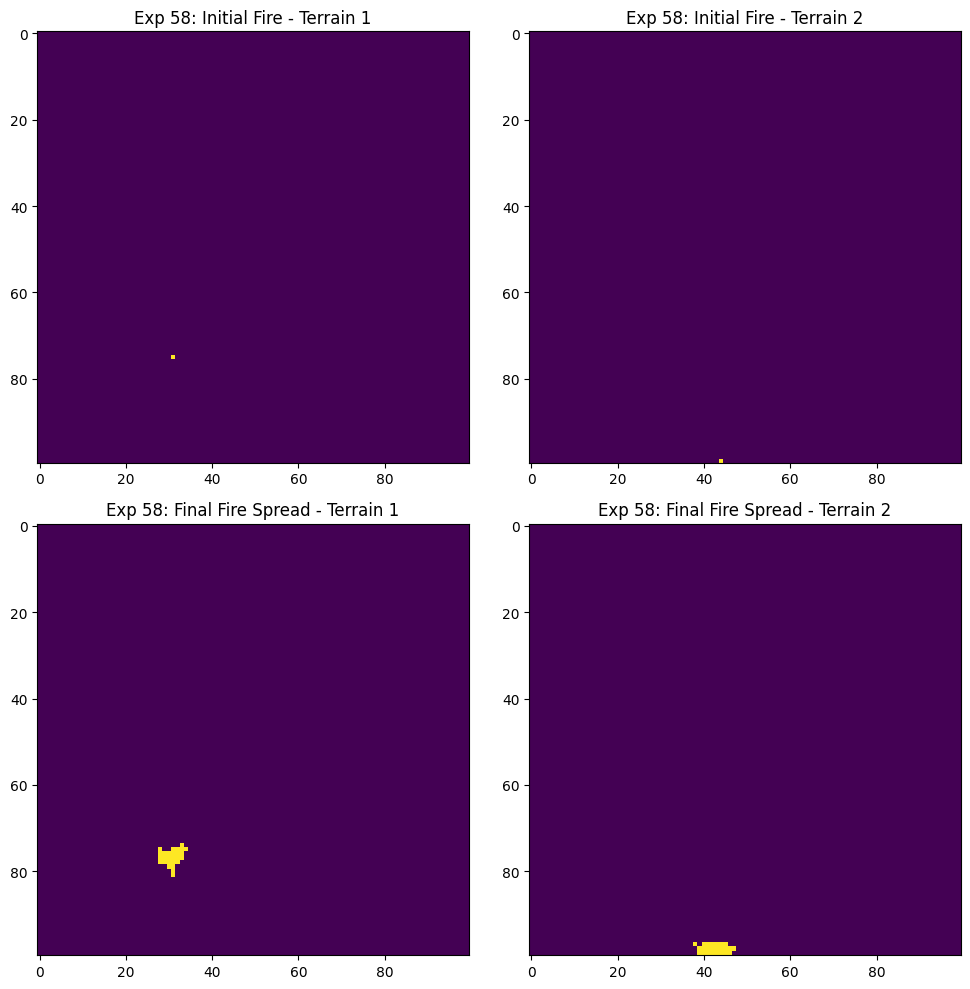

Experiment 59/100: Burned cells, Terrain 1: 159, Terrain 2: 32


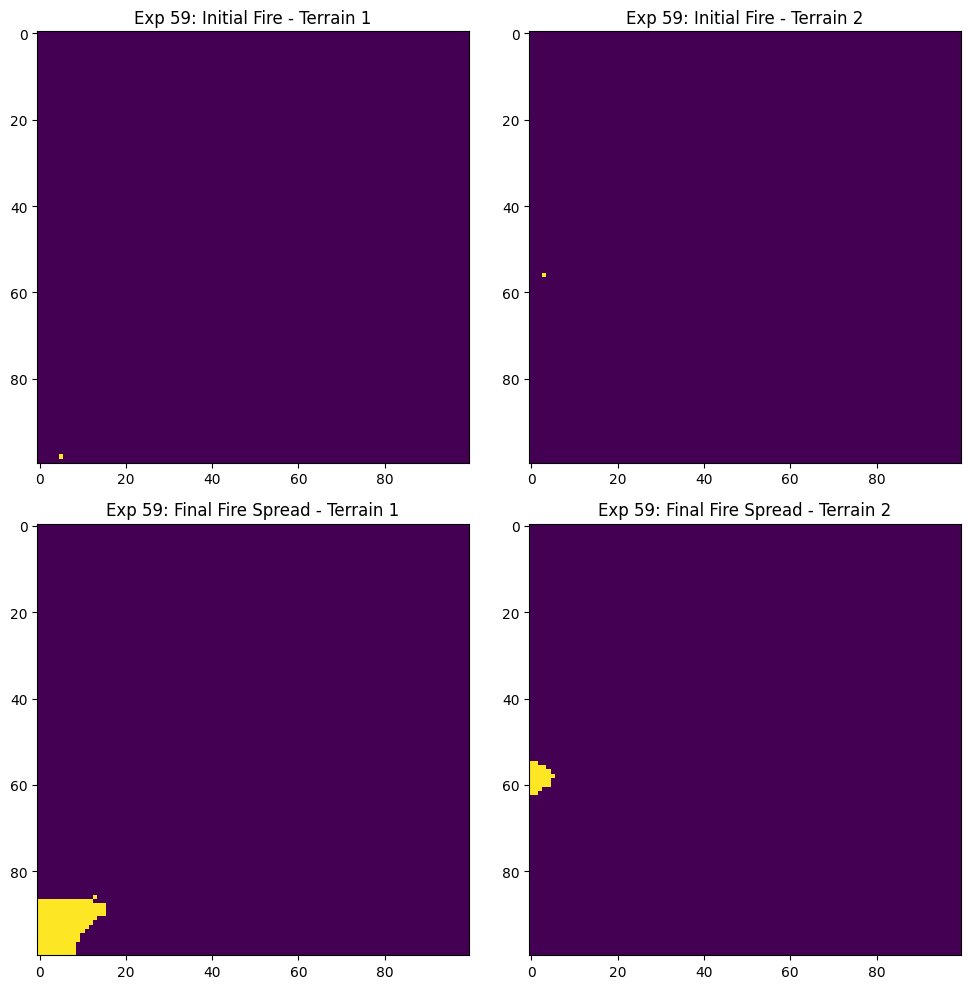

Experiment 60/100: Burned cells, Terrain 1: 162, Terrain 2: 26


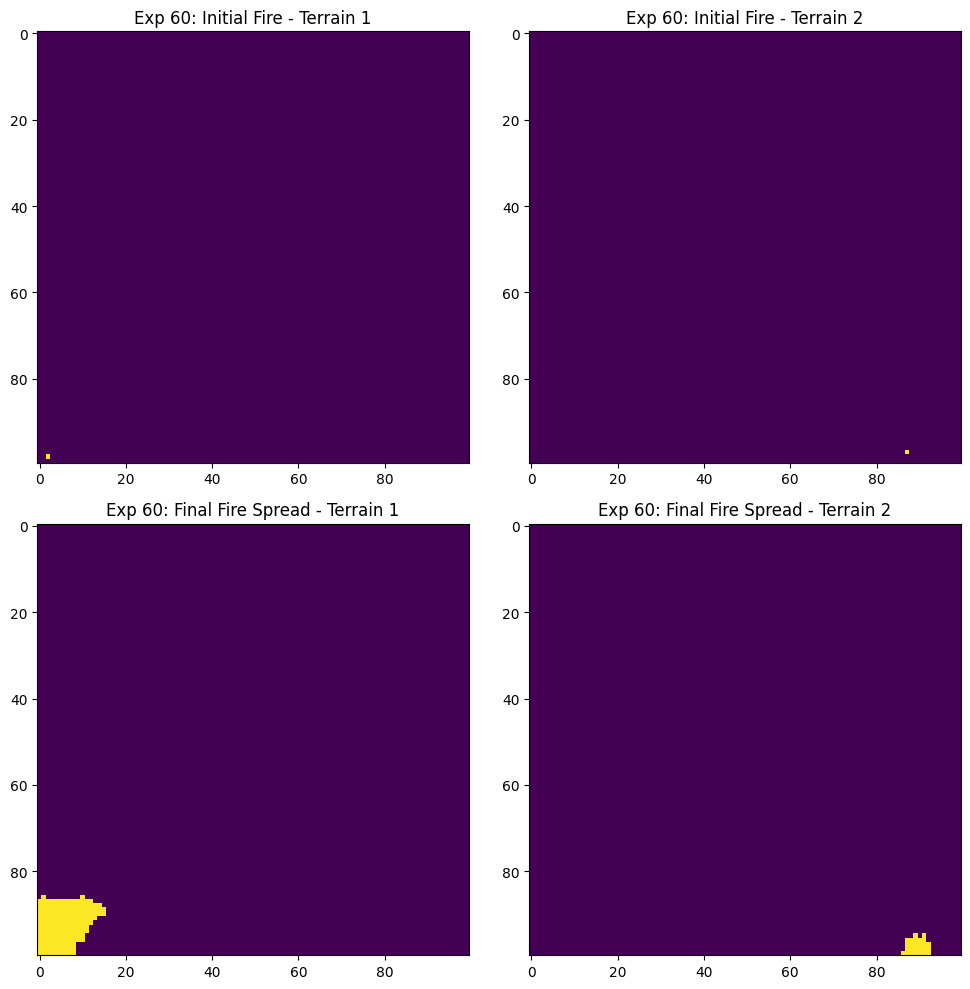

Experiment 61/100: Burned cells, Terrain 1: 157, Terrain 2: 74


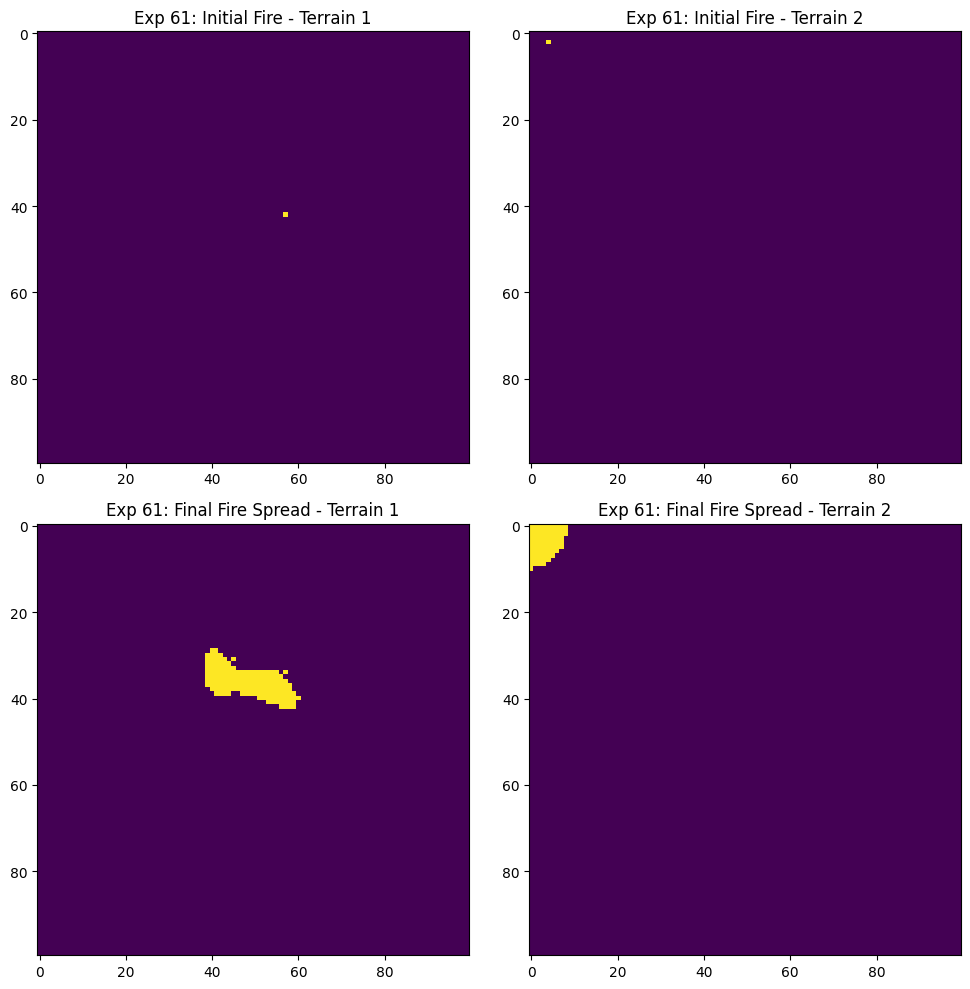

Experiment 62/100: Burned cells, Terrain 1: 160, Terrain 2: 157


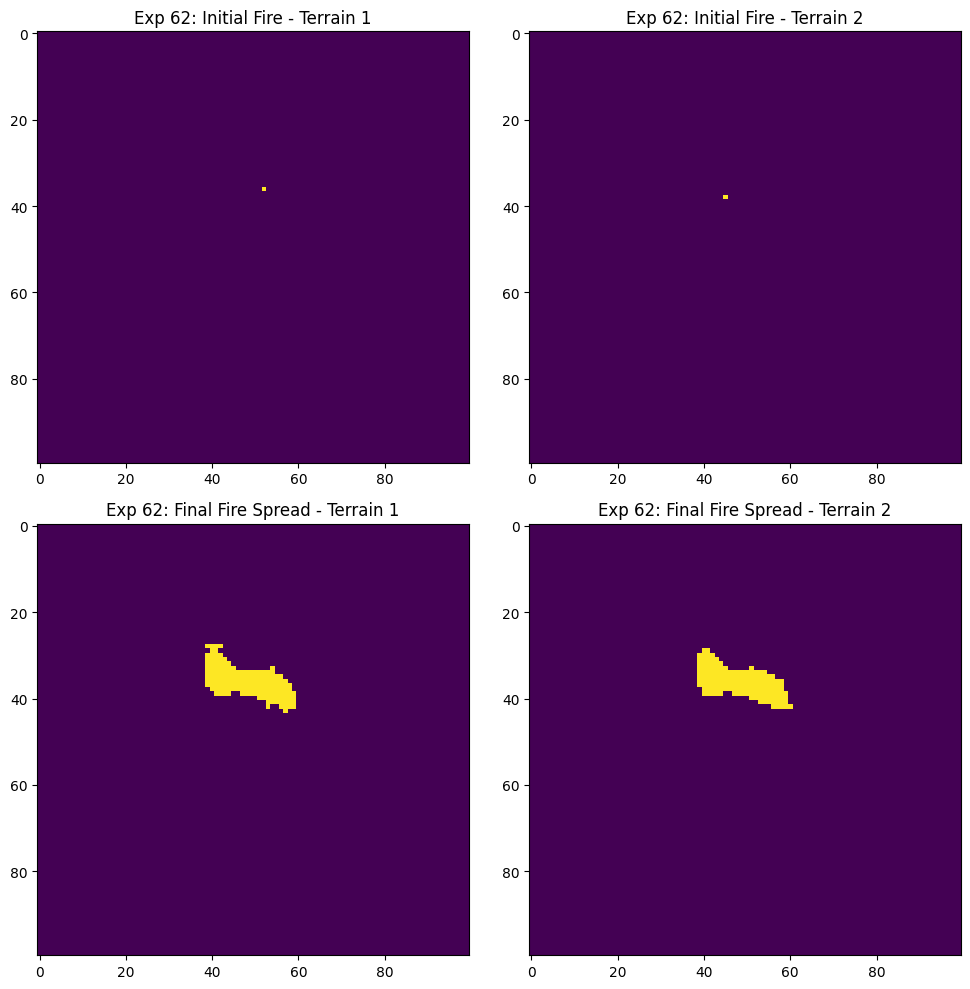

Experiment 63/100: Burned cells, Terrain 1: 75, Terrain 2: 175


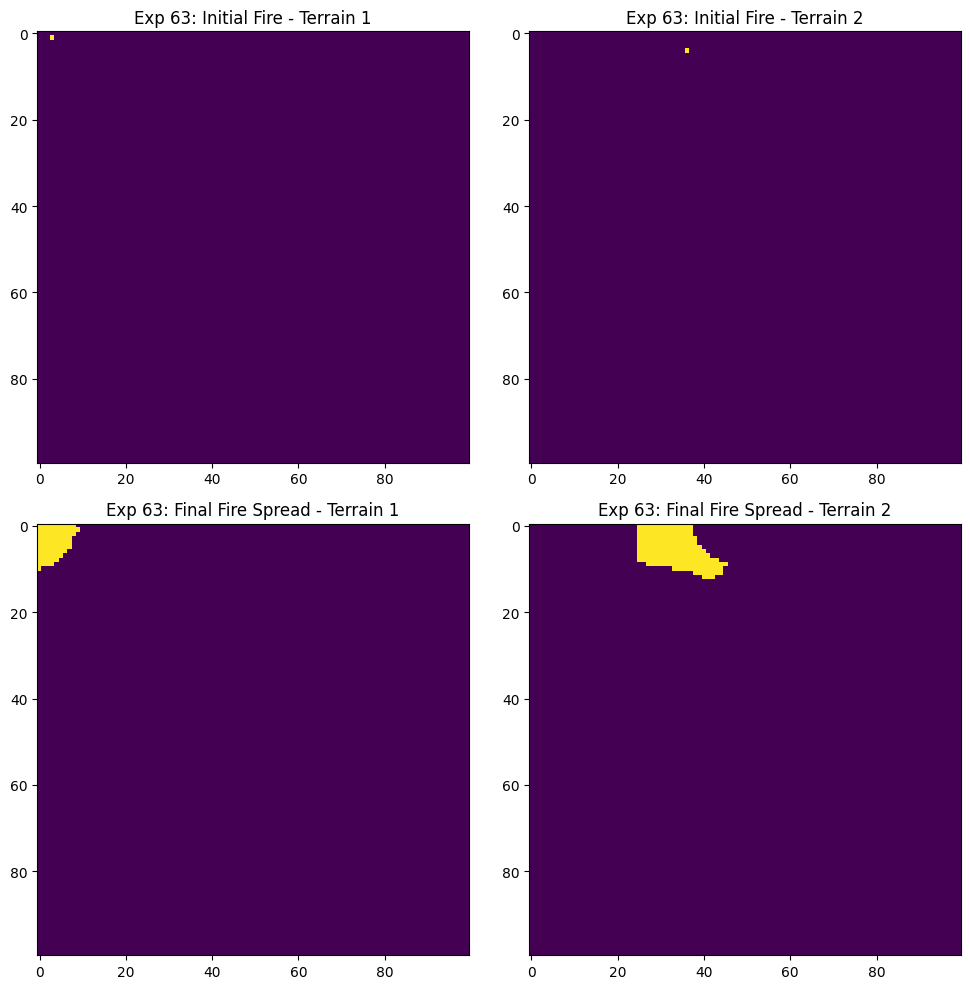

Experiment 64/100: Burned cells, Terrain 1: 157, Terrain 2: 156


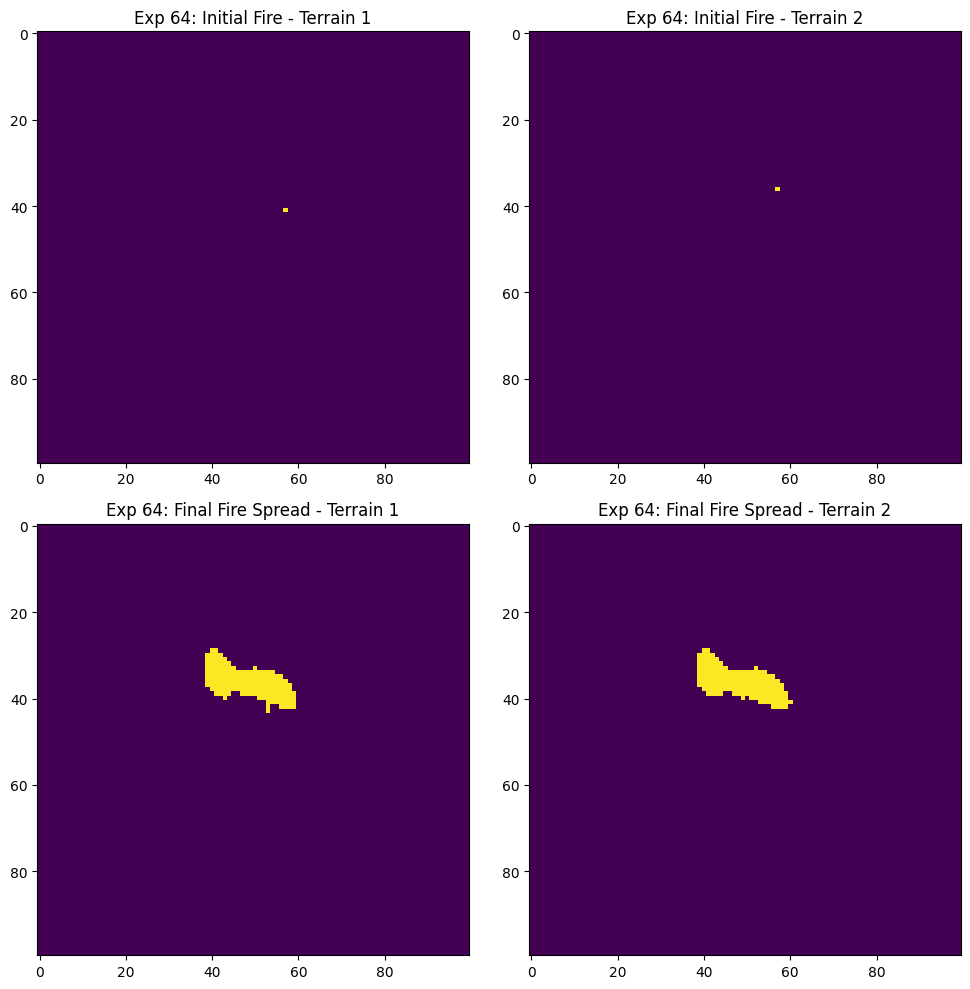

Experiment 65/100: Burned cells, Terrain 1: 177, Terrain 2: 174


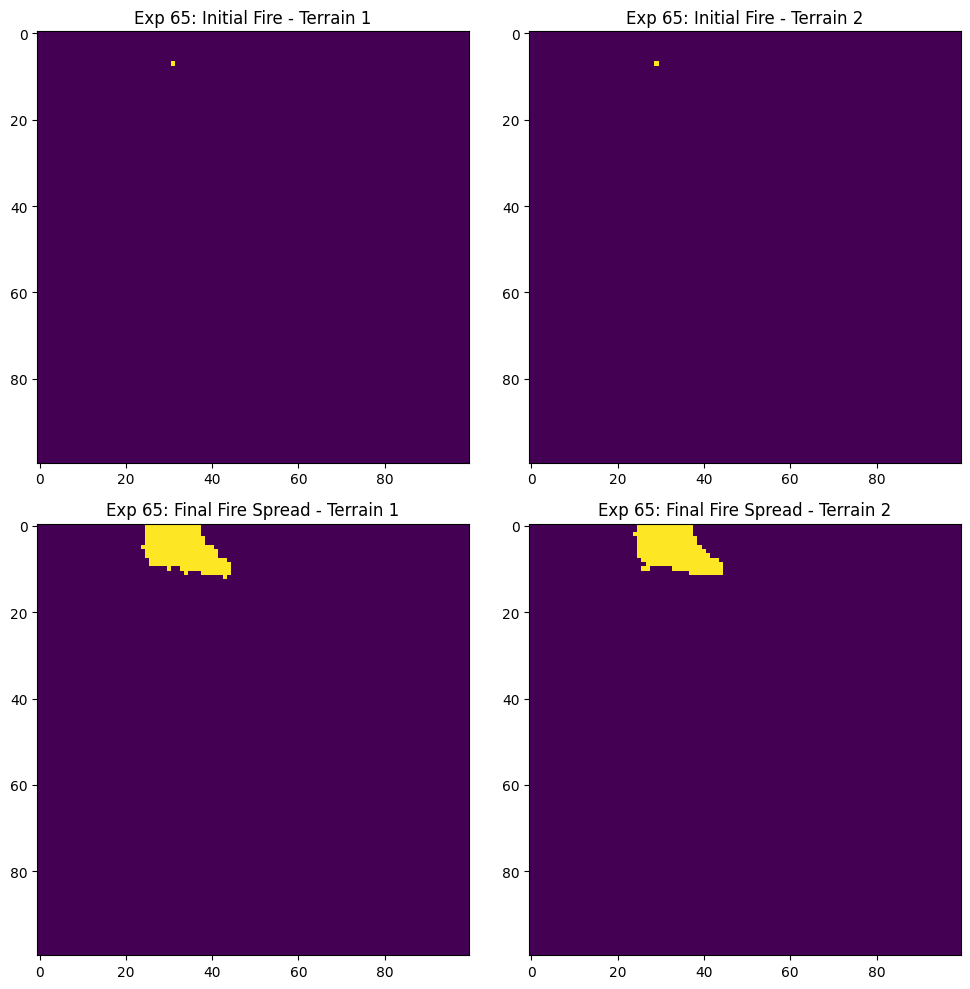

Experiment 66/100: Burned cells, Terrain 1: 172, Terrain 2: 32


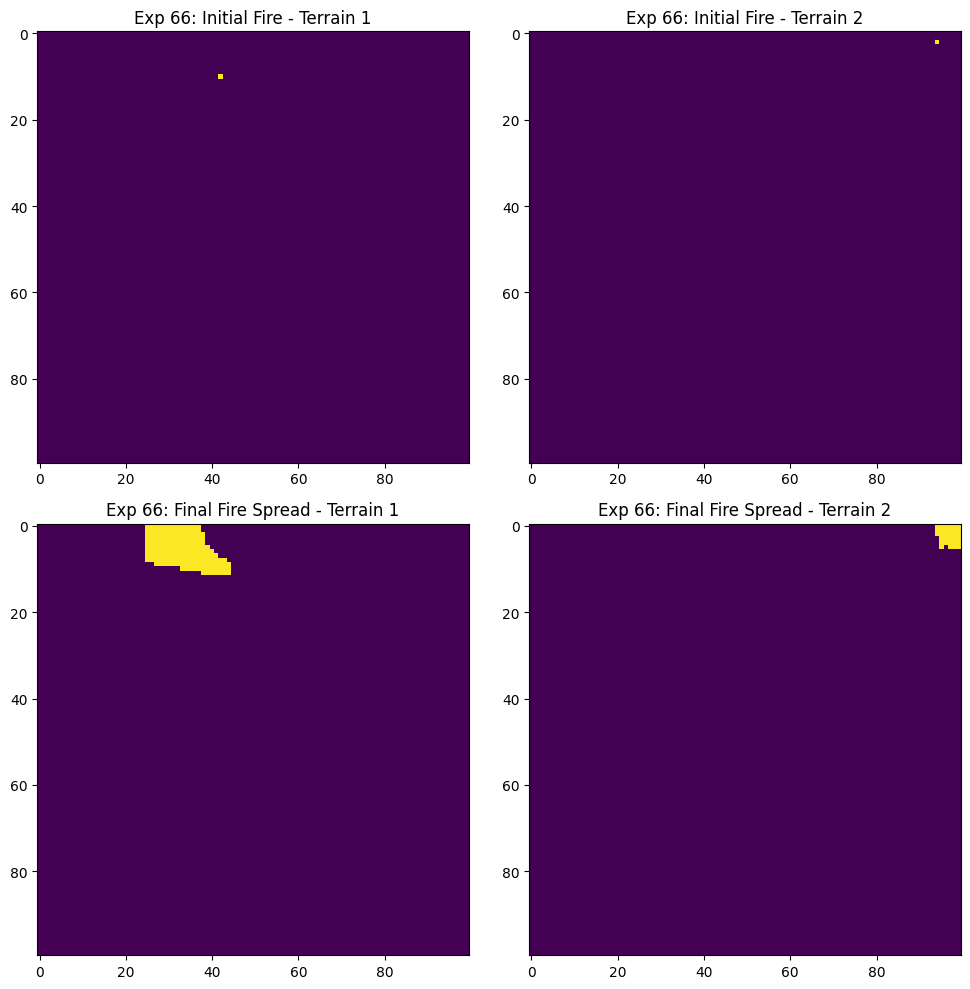

Experiment 67/100: Burned cells, Terrain 1: 75, Terrain 2: 173


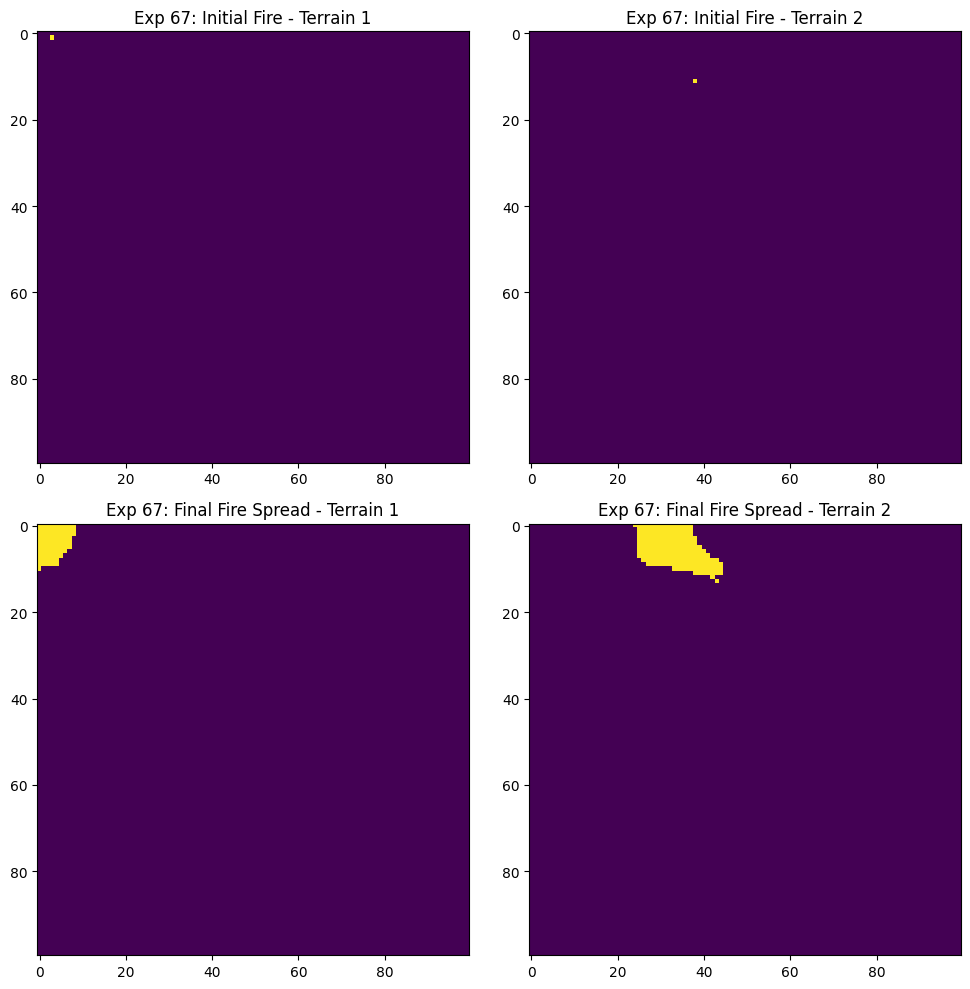

Experiment 68/100: Burned cells, Terrain 1: 75, Terrain 2: 159


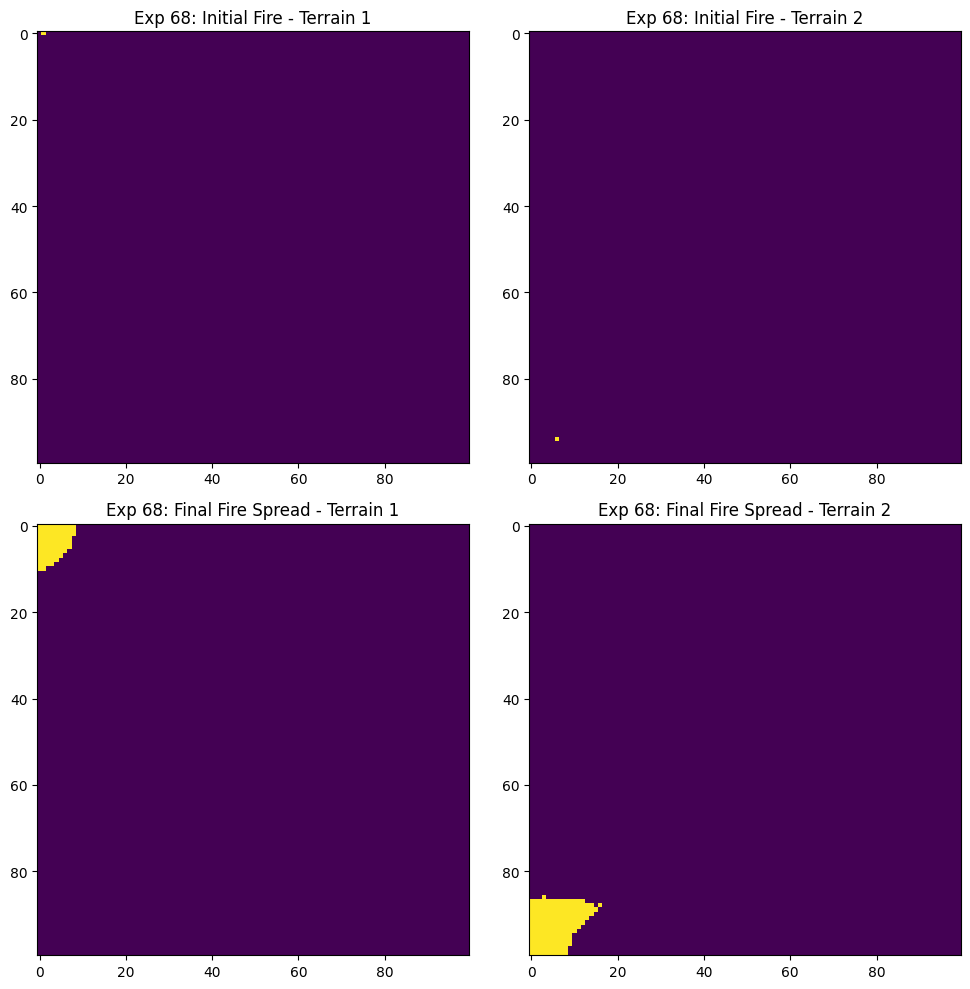

Experiment 69/100: Burned cells, Terrain 1: 30, Terrain 2: 157


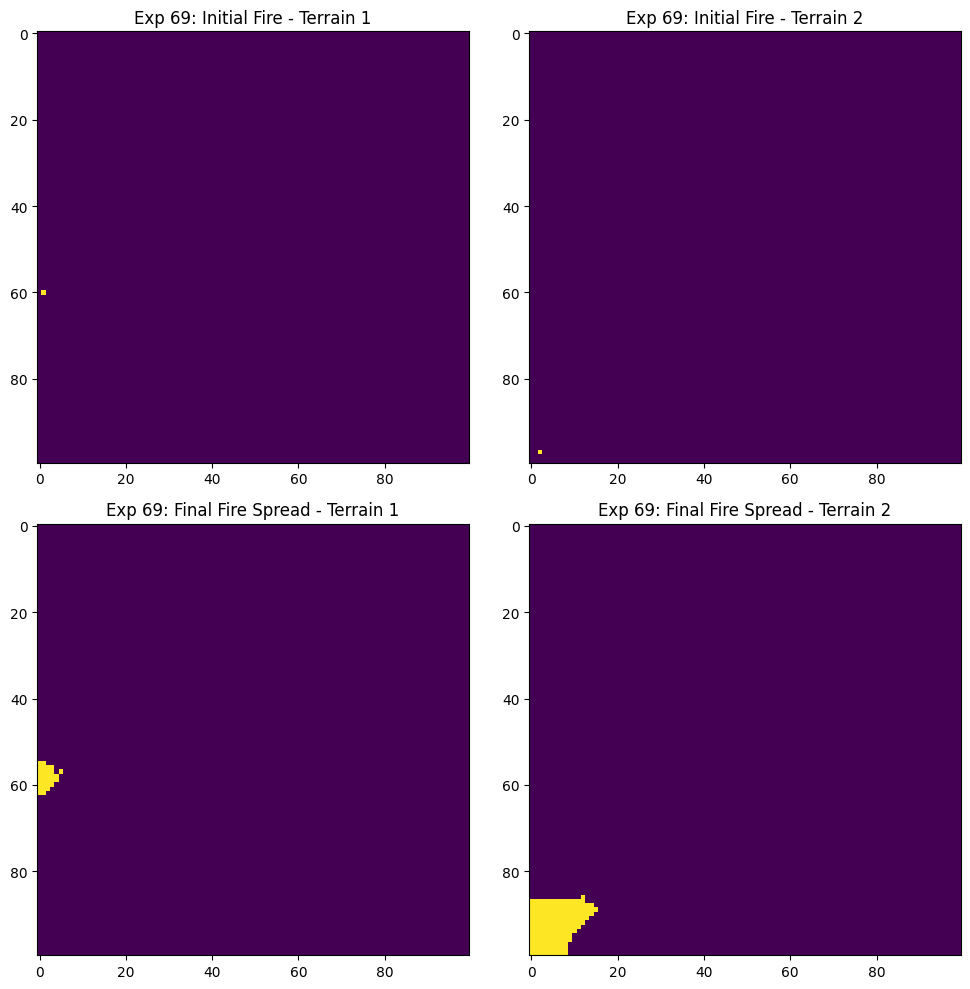

Experiment 70/100: Burned cells, Terrain 1: 23, Terrain 2: 32


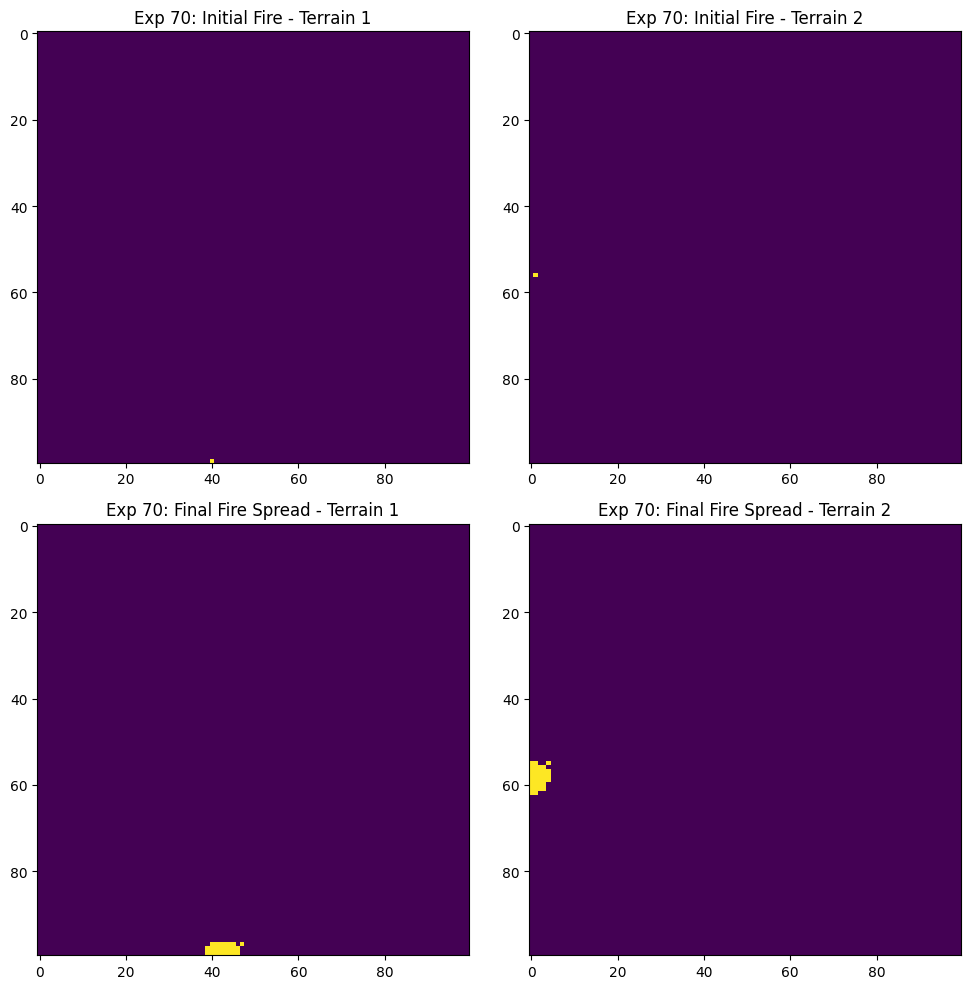

Experiment 71/100: Burned cells, Terrain 1: 76, Terrain 2: 26


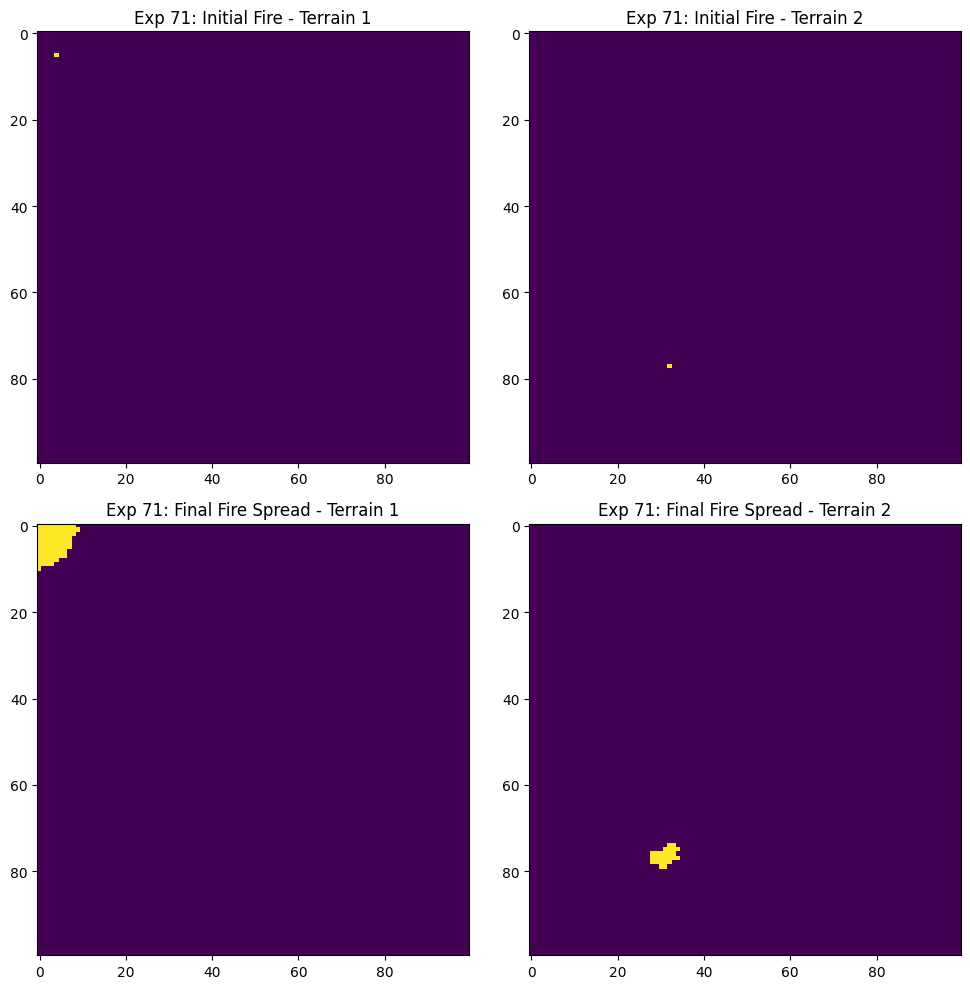

Experiment 72/100: Burned cells, Terrain 1: 174, Terrain 2: 172


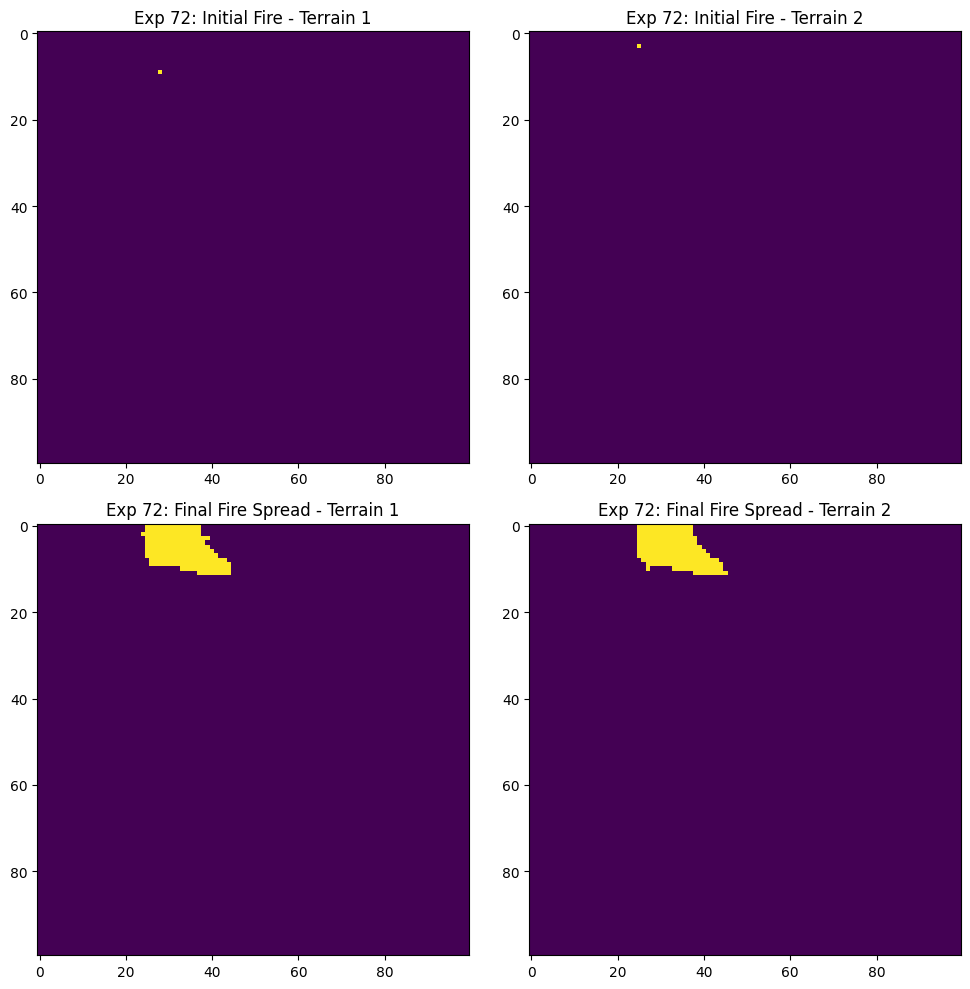

Experiment 73/100: Burned cells, Terrain 1: 172, Terrain 2: 162


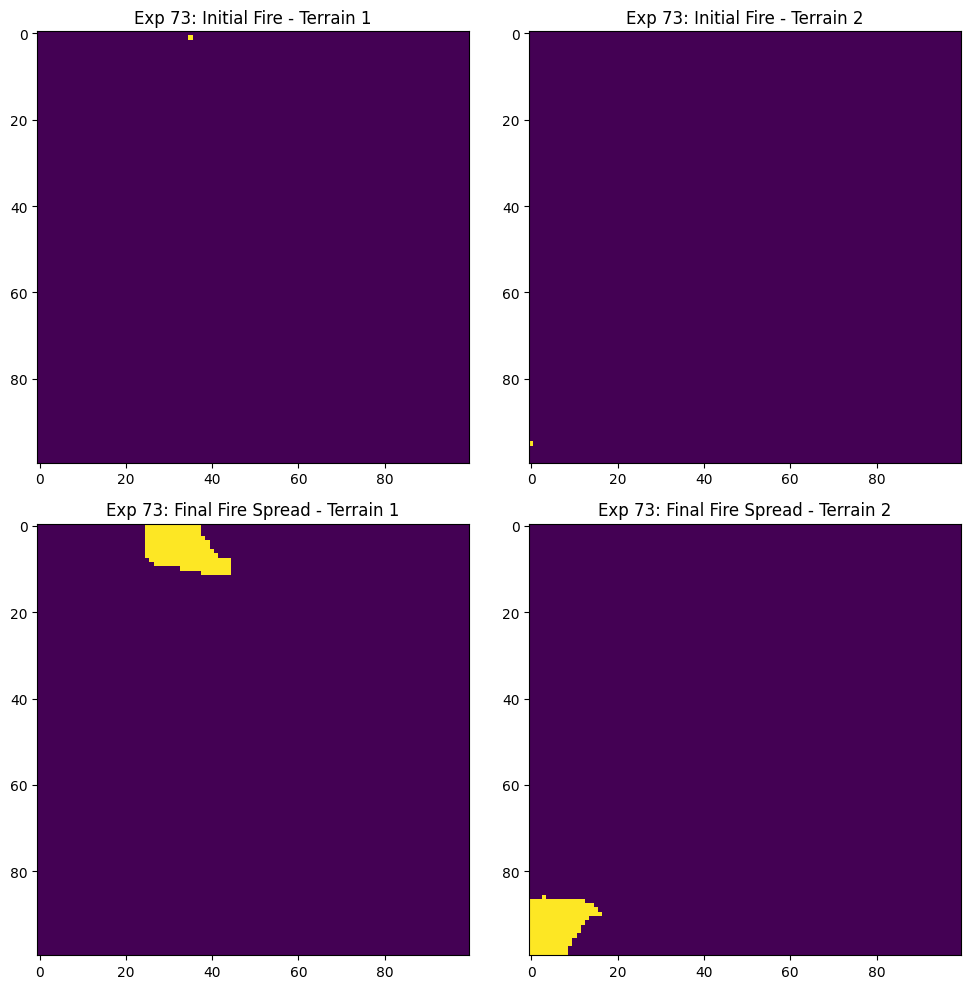

Experiment 74/100: Burned cells, Terrain 1: 160, Terrain 2: 164


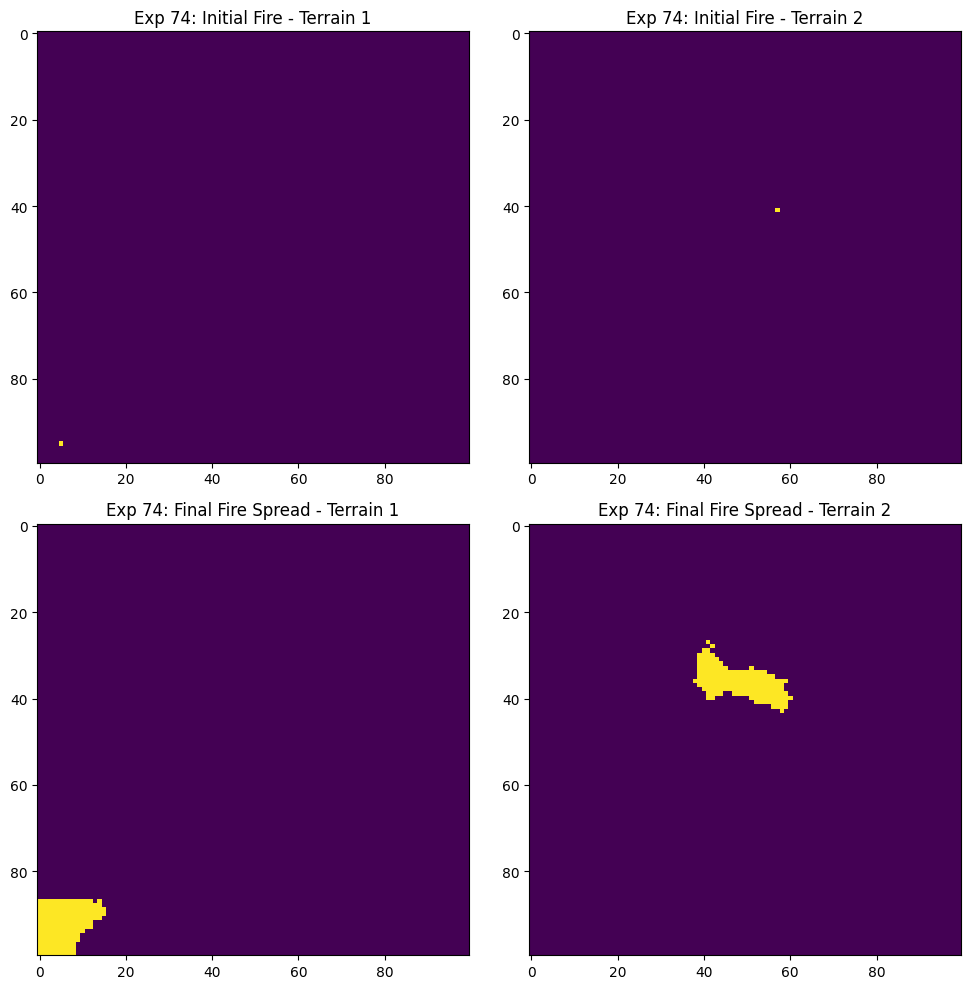

Experiment 75/100: Burned cells, Terrain 1: 163, Terrain 2: 34


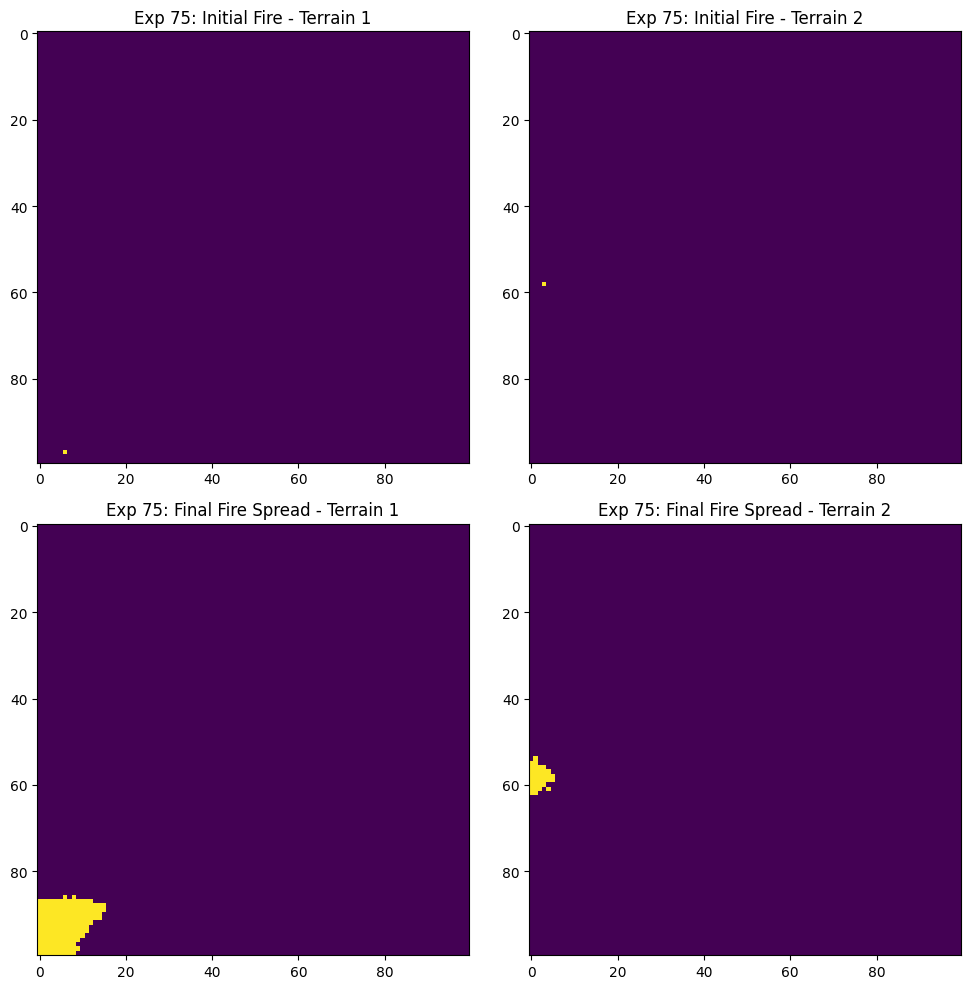

Experiment 76/100: Burned cells, Terrain 1: 30, Terrain 2: 159


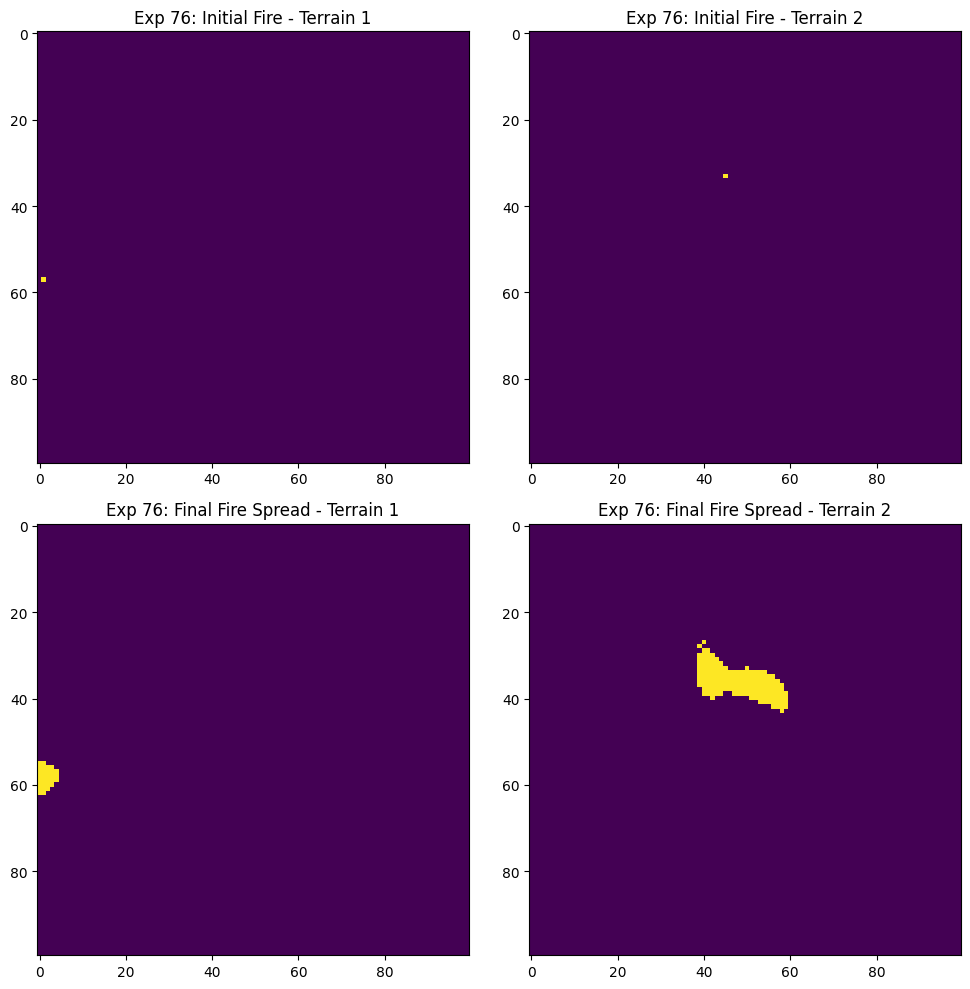

Experiment 77/100: Burned cells, Terrain 1: 179, Terrain 2: 161


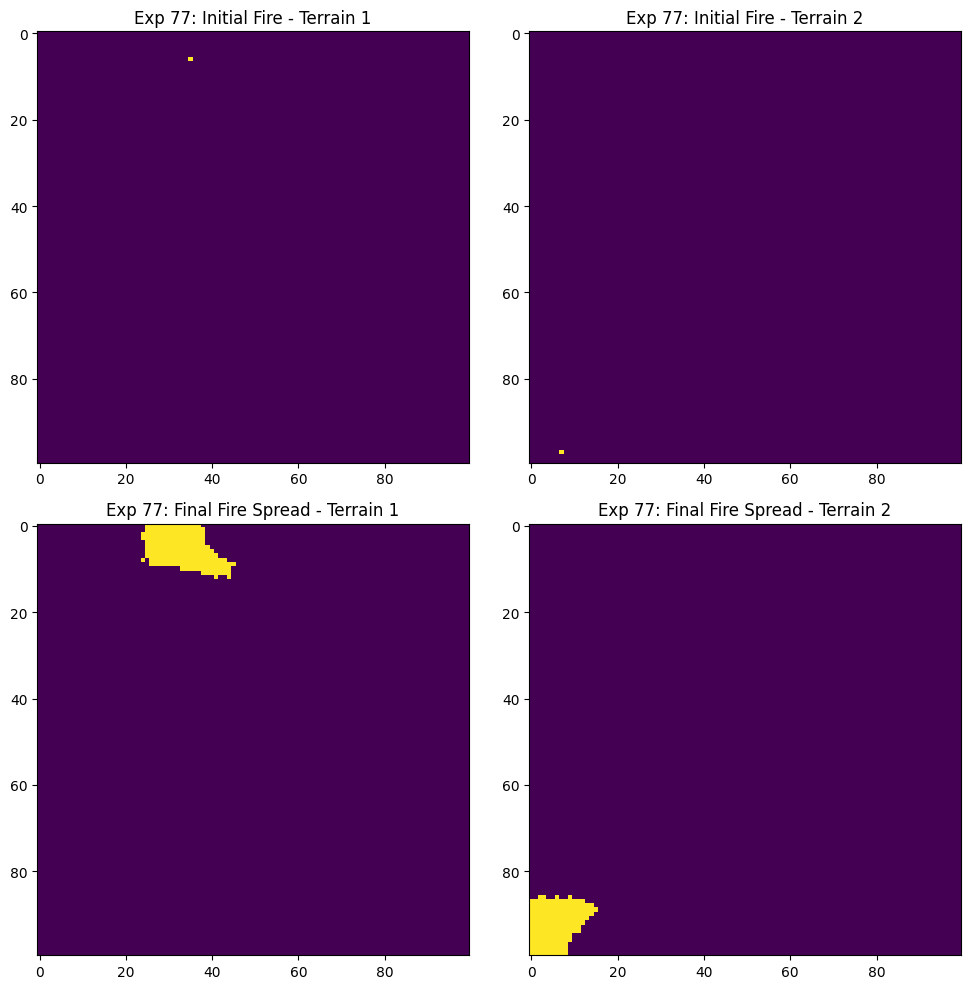

Experiment 78/100: Burned cells, Terrain 1: 32, Terrain 2: 159


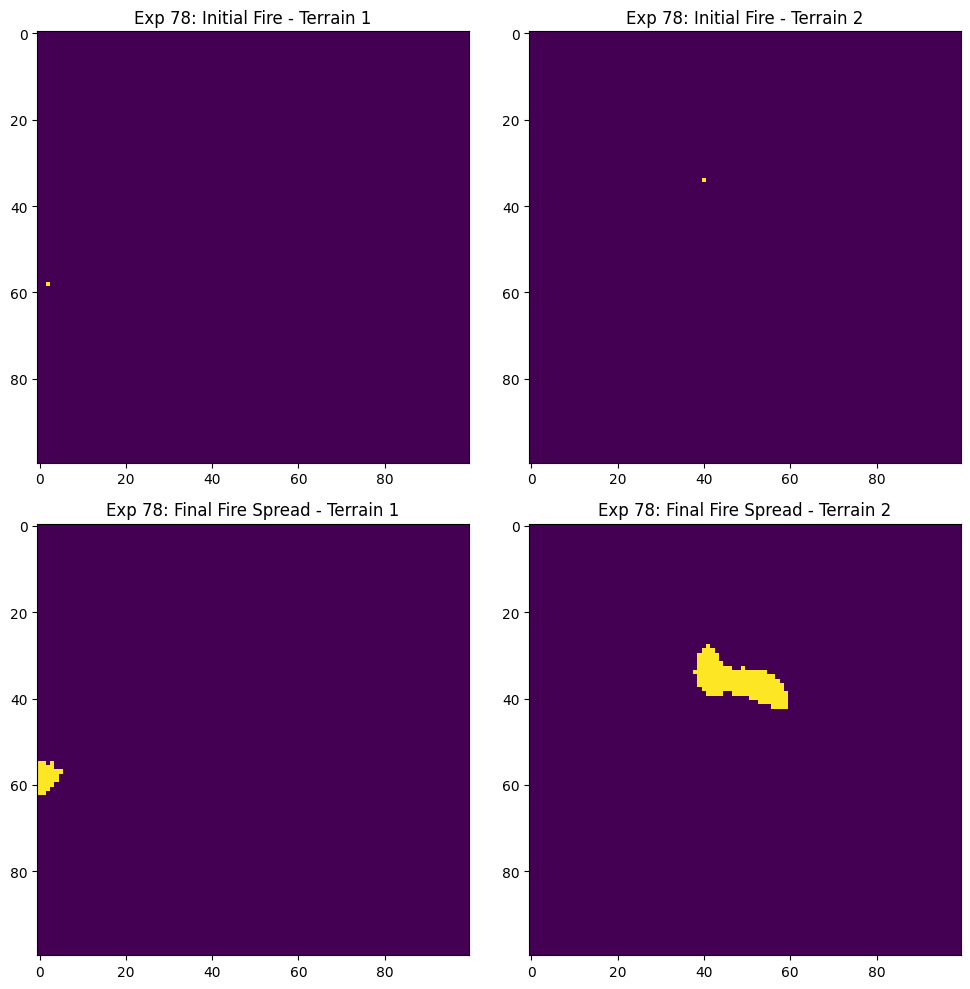

Experiment 79/100: Burned cells, Terrain 1: 158, Terrain 2: 157


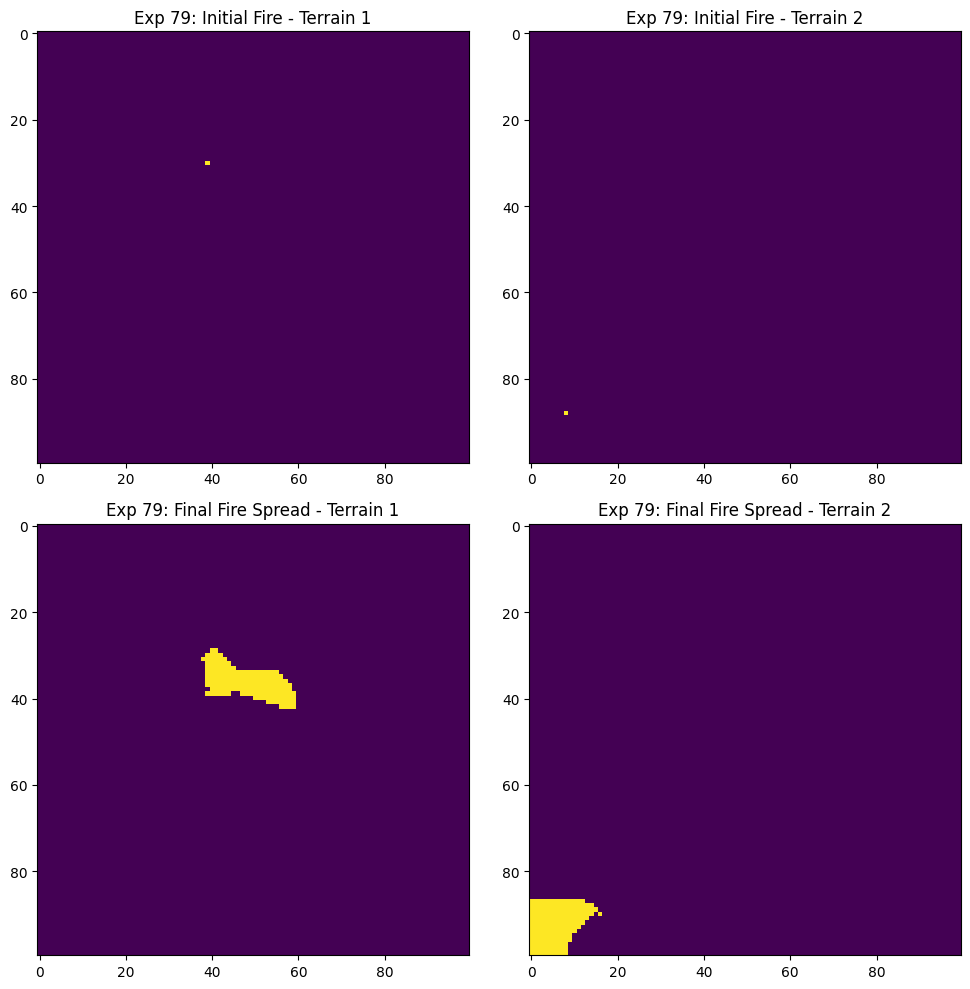

Experiment 80/100: Burned cells, Terrain 1: 75, Terrain 2: 162


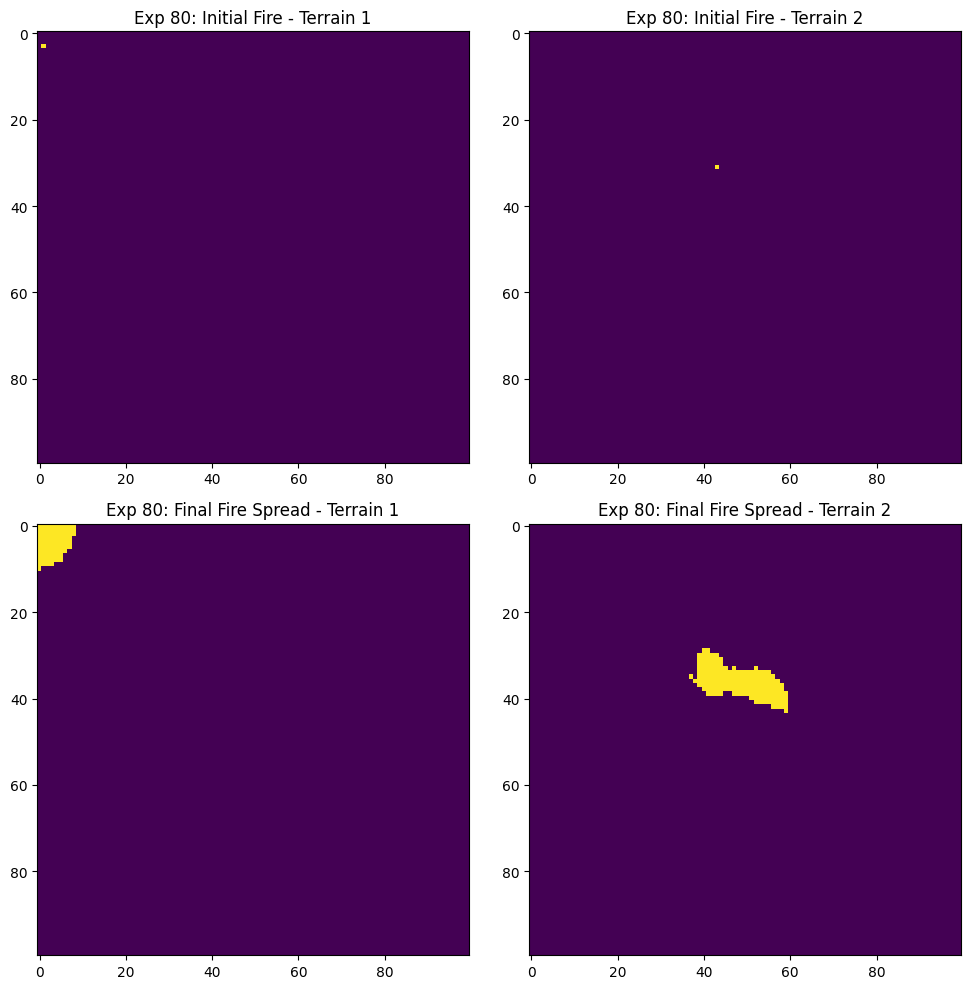

Experiment 81/100: Burned cells, Terrain 1: 24, Terrain 2: 162


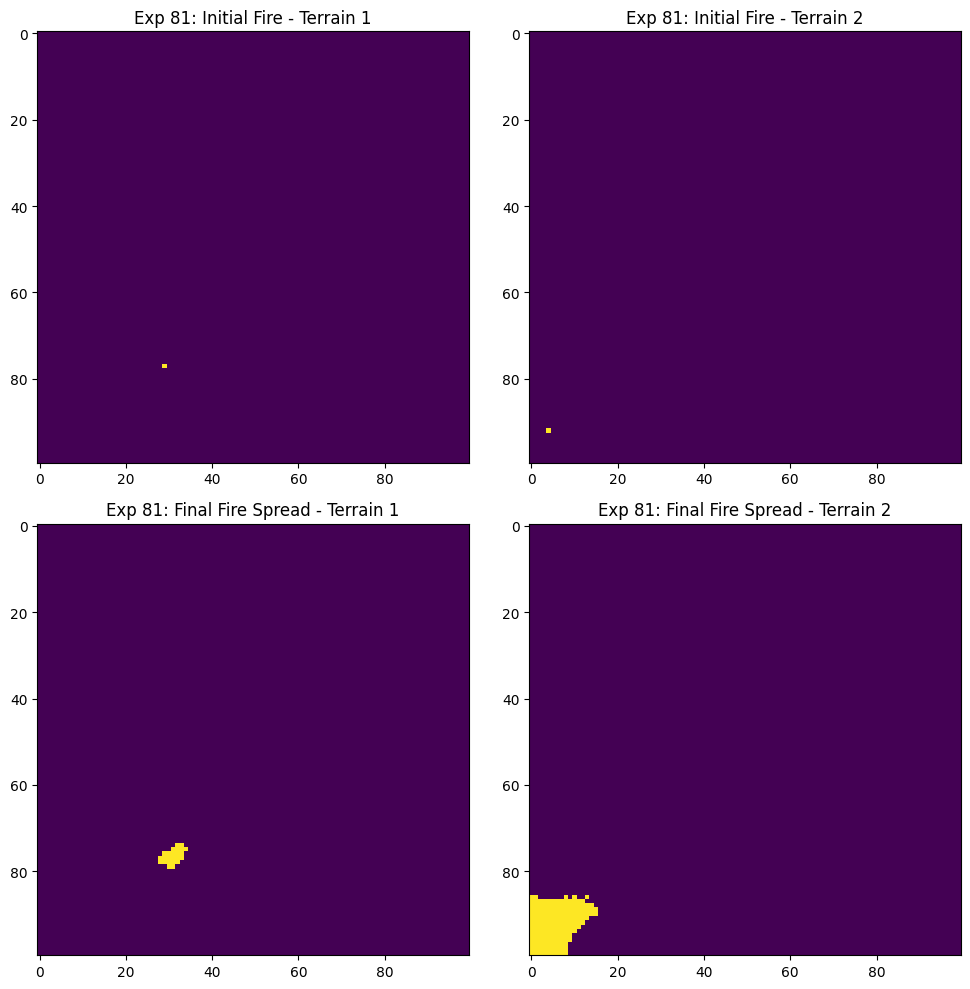

Experiment 82/100: Burned cells, Terrain 1: 175, Terrain 2: 177


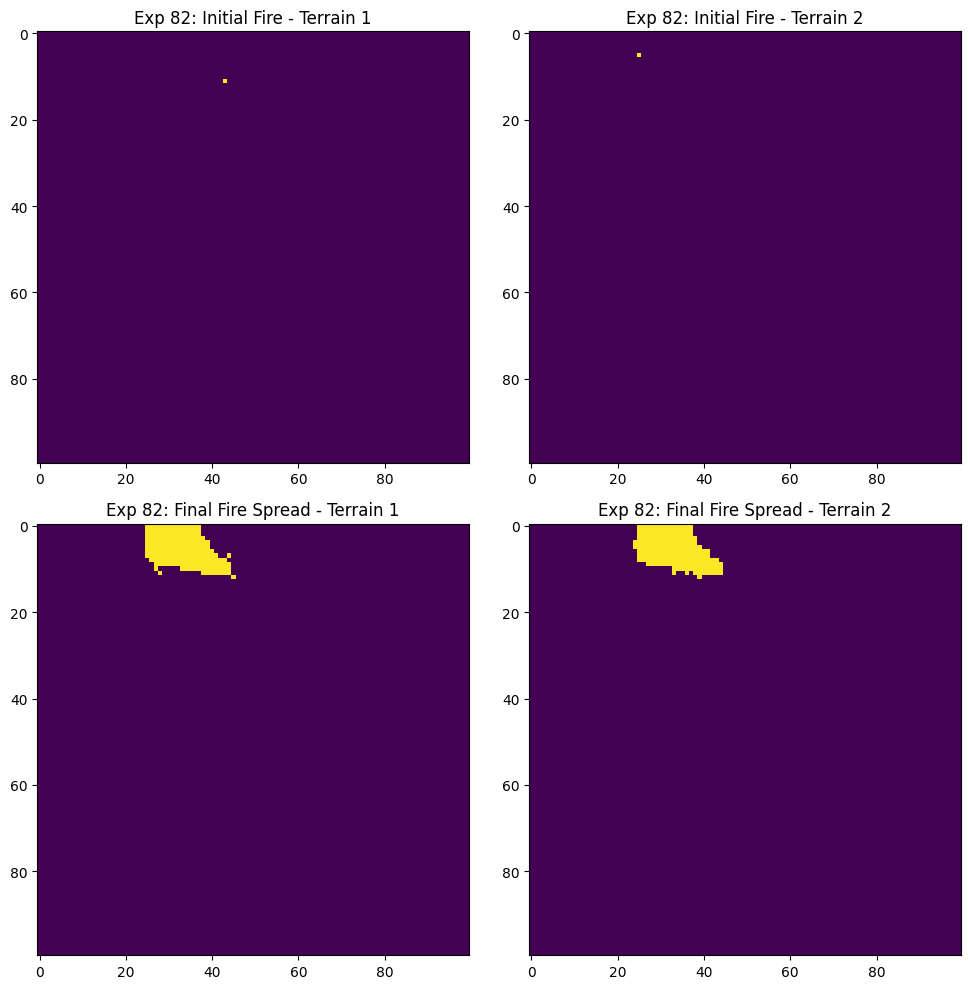

Experiment 83/100: Burned cells, Terrain 1: 158, Terrain 2: 176


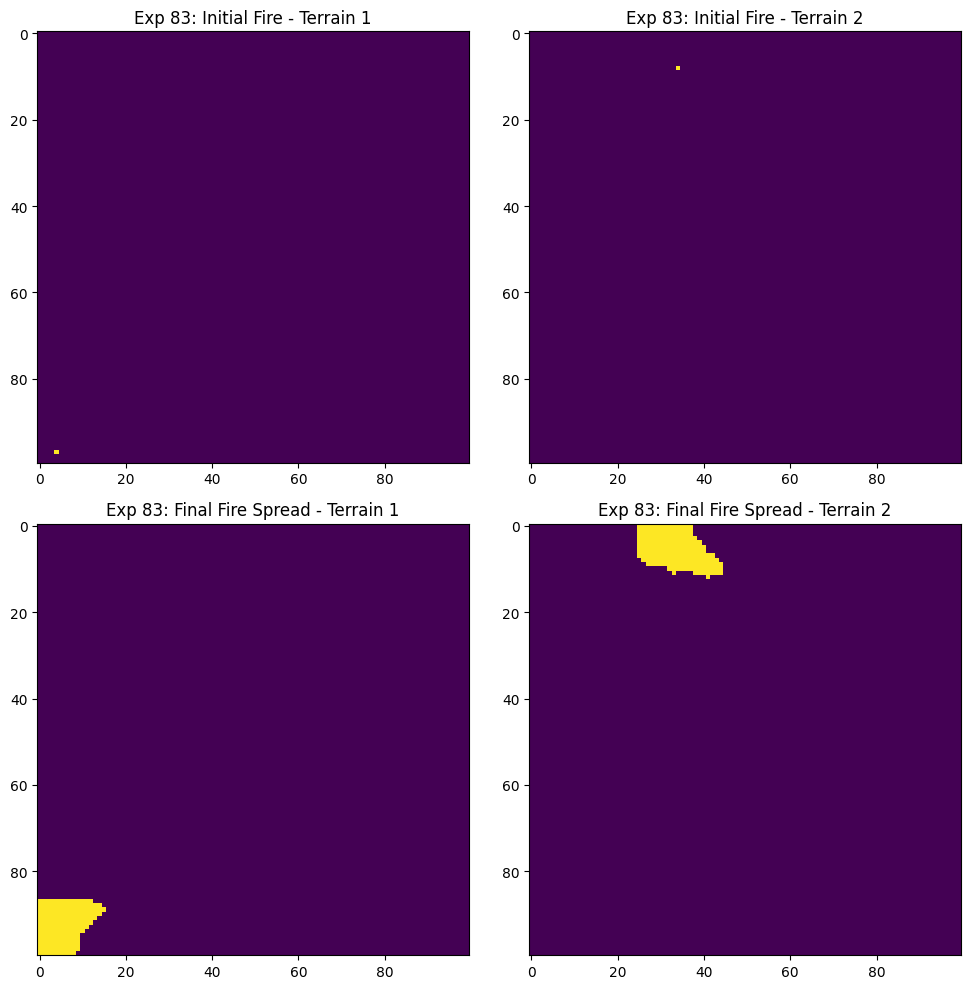

Experiment 84/100: Burned cells, Terrain 1: 160, Terrain 2: 159


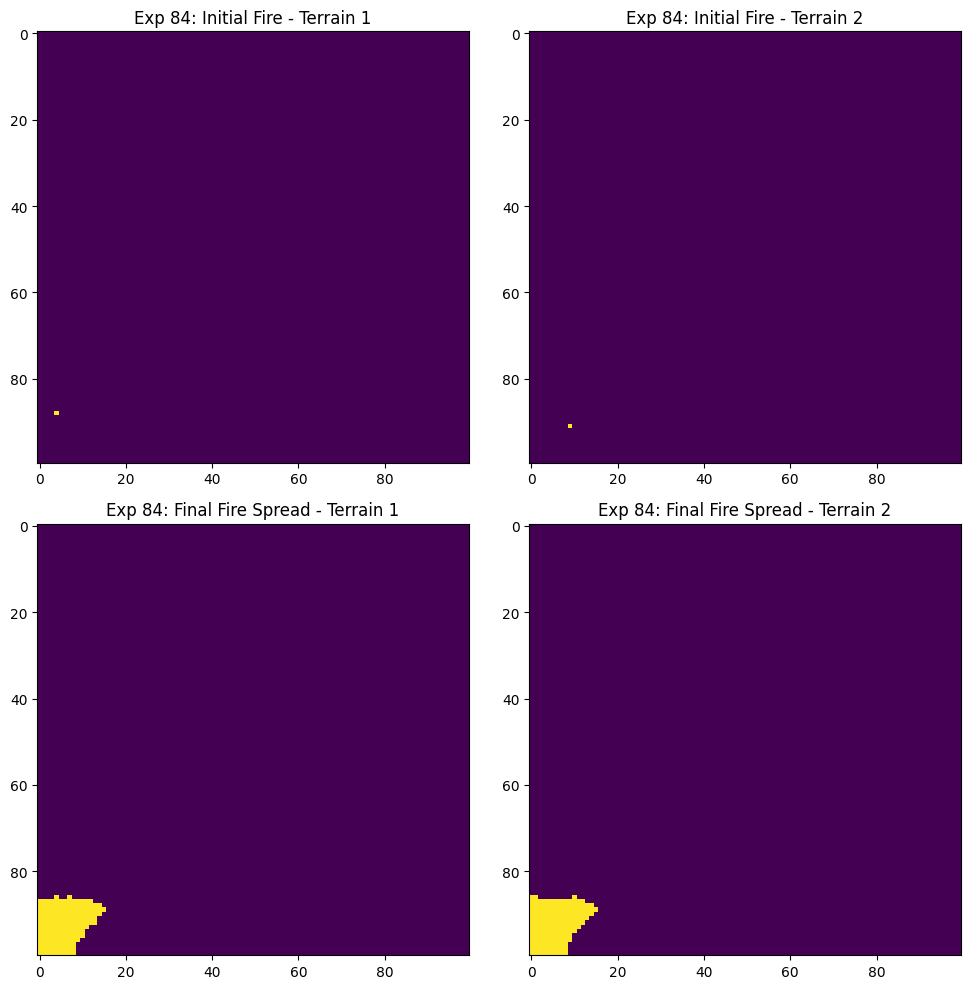

Experiment 85/100: Burned cells, Terrain 1: 158, Terrain 2: 31


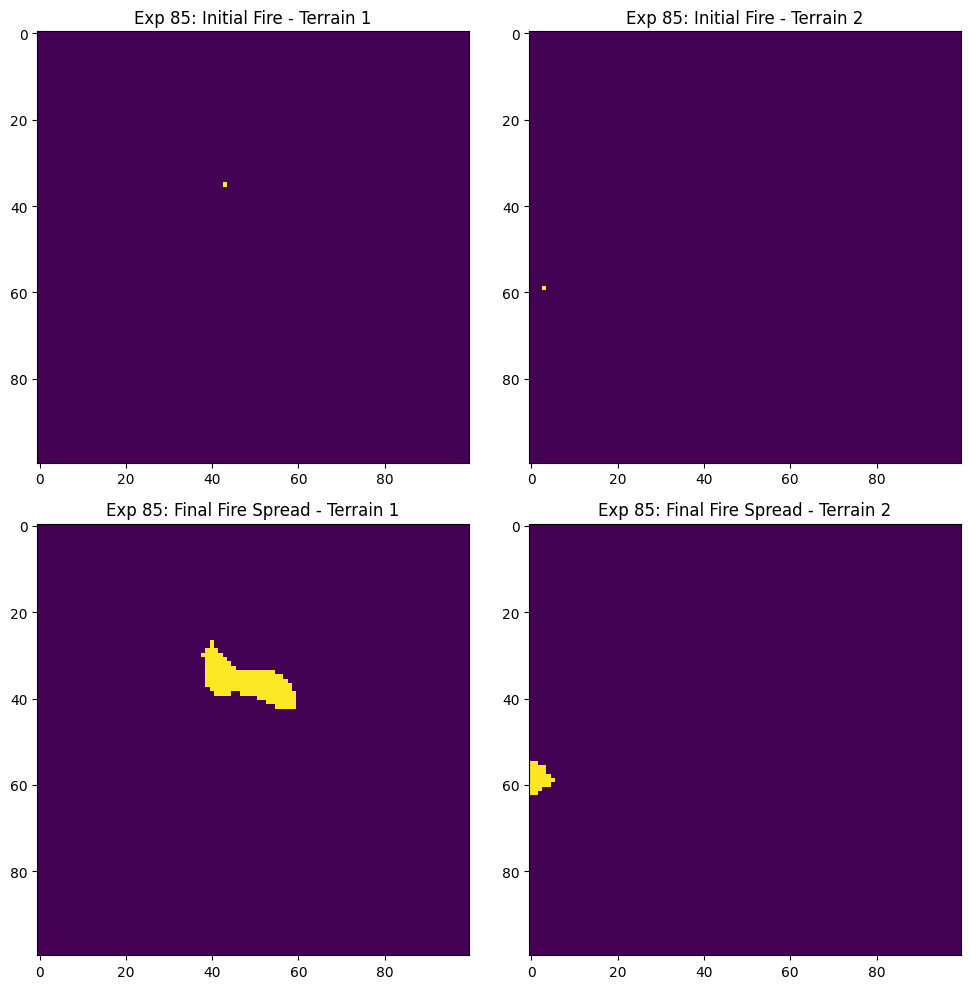

Experiment 86/100: Burned cells, Terrain 1: 155, Terrain 2: 173


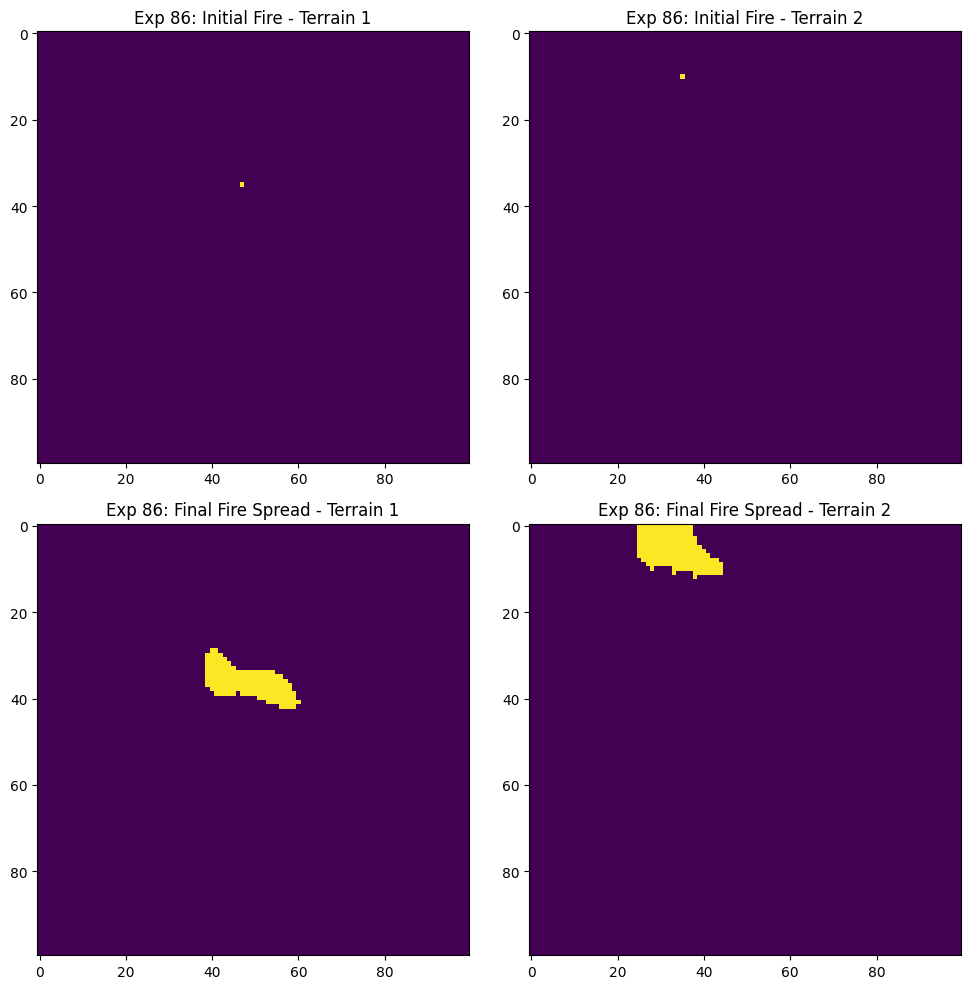

Experiment 87/100: Burned cells, Terrain 1: 159, Terrain 2: 166


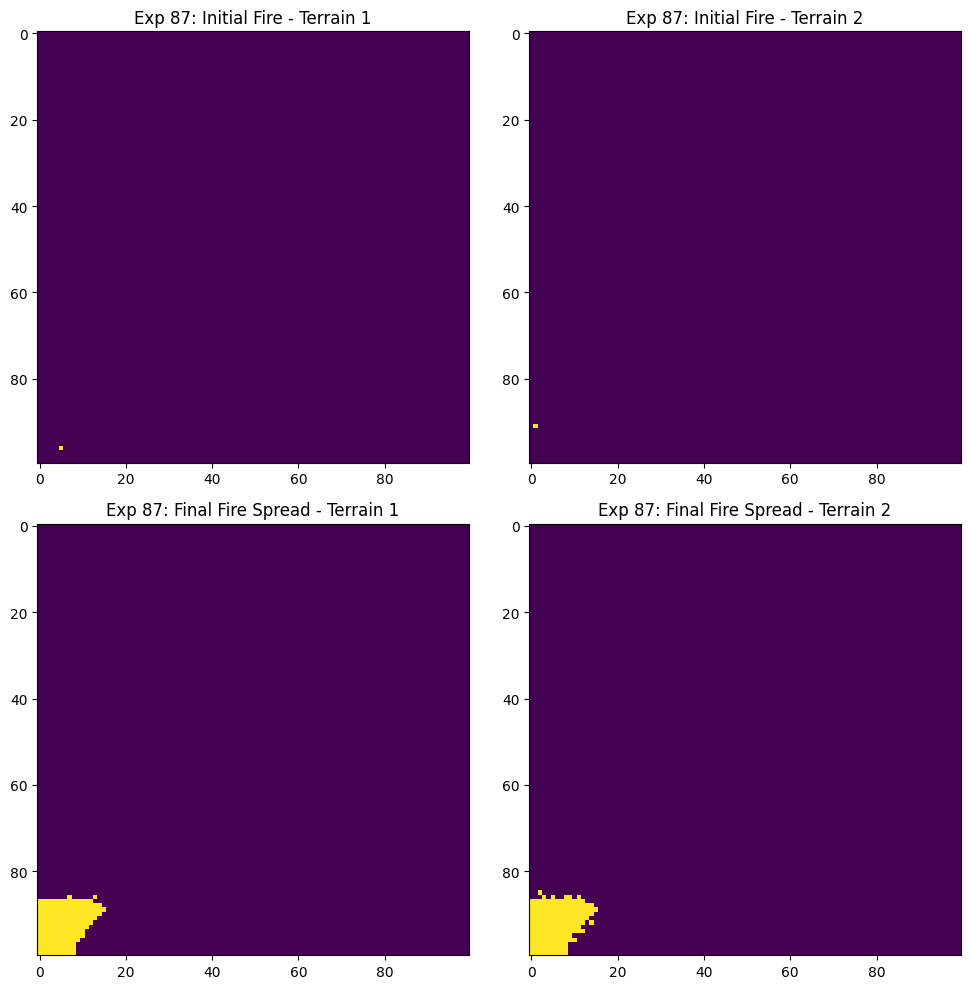

Experiment 88/100: Burned cells, Terrain 1: 162, Terrain 2: 77


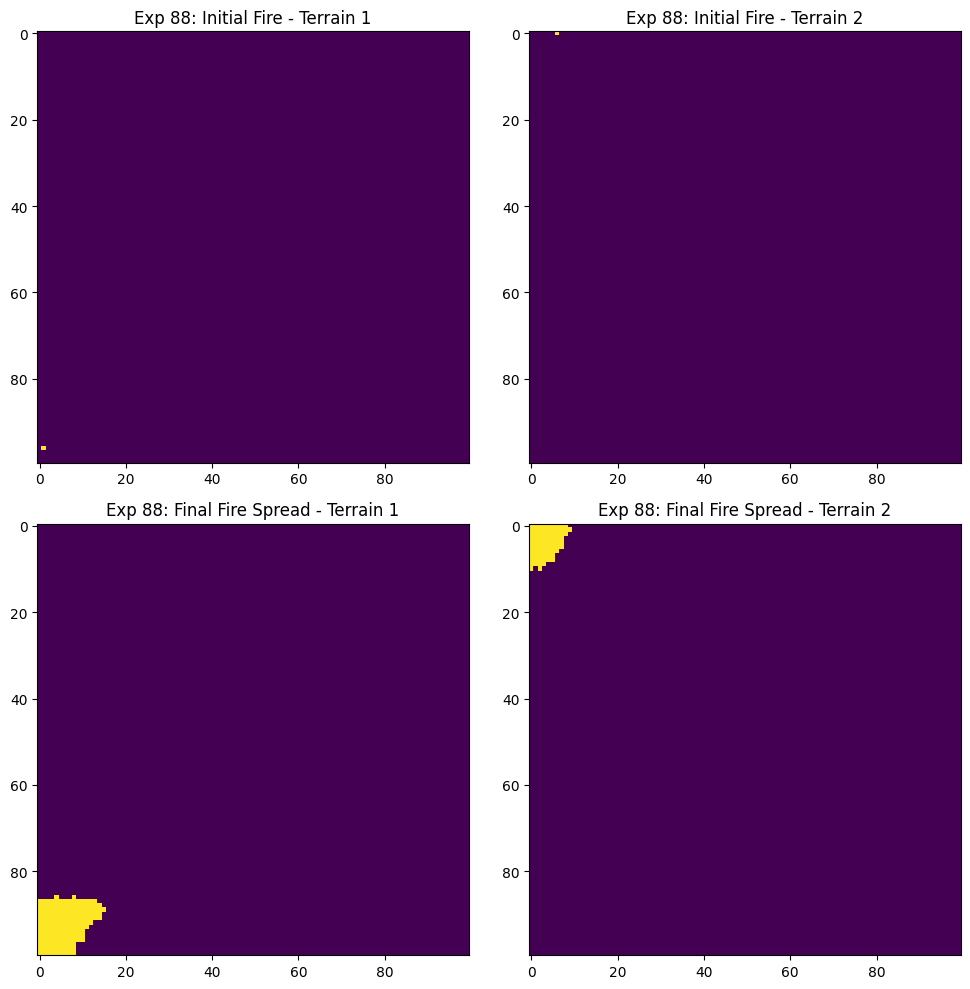

Experiment 89/100: Burned cells, Terrain 1: 75, Terrain 2: 75


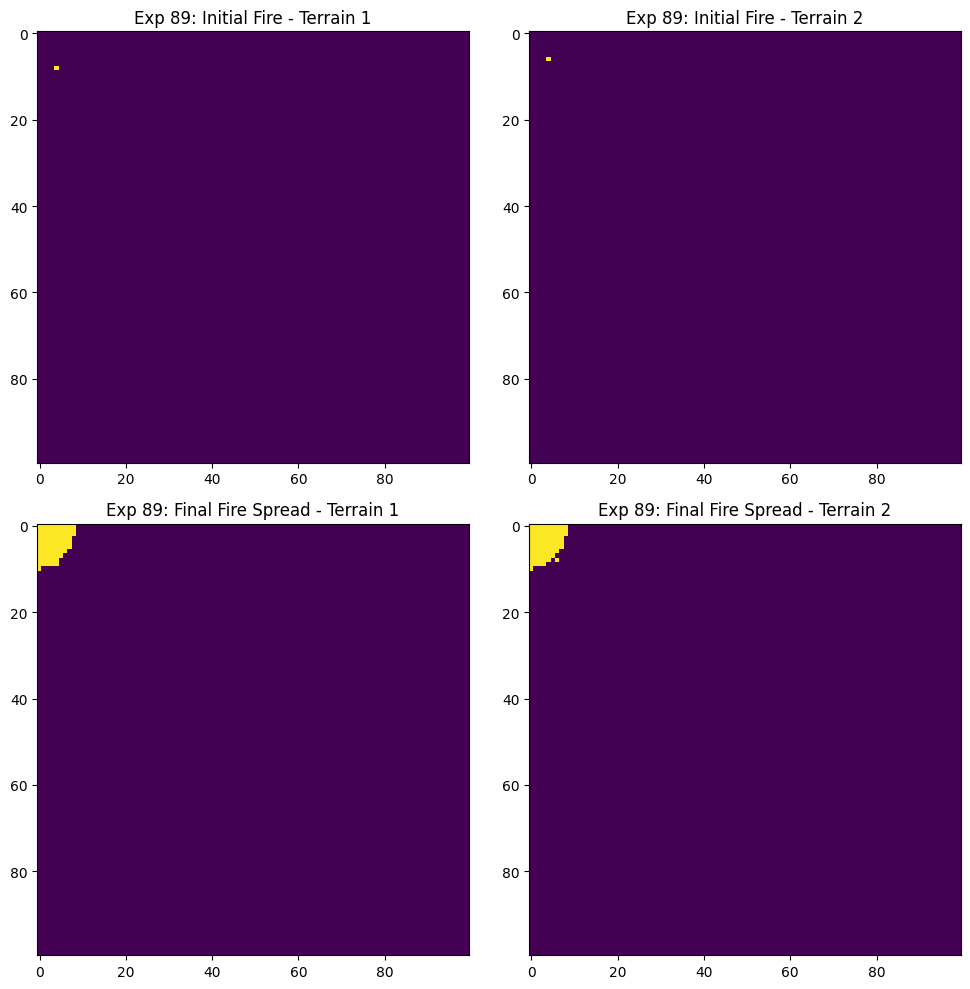

Experiment 90/100: Burned cells, Terrain 1: 160, Terrain 2: 174


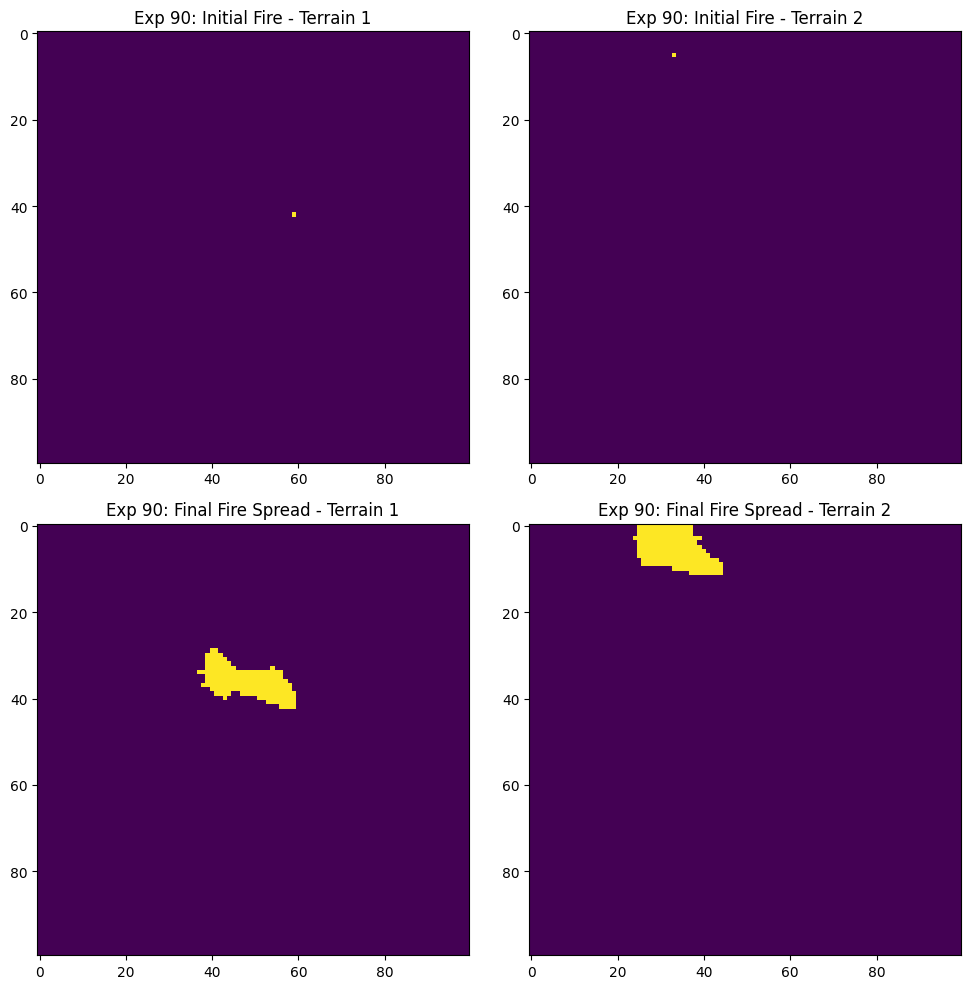

Experiment 91/100: Burned cells, Terrain 1: 76, Terrain 2: 159


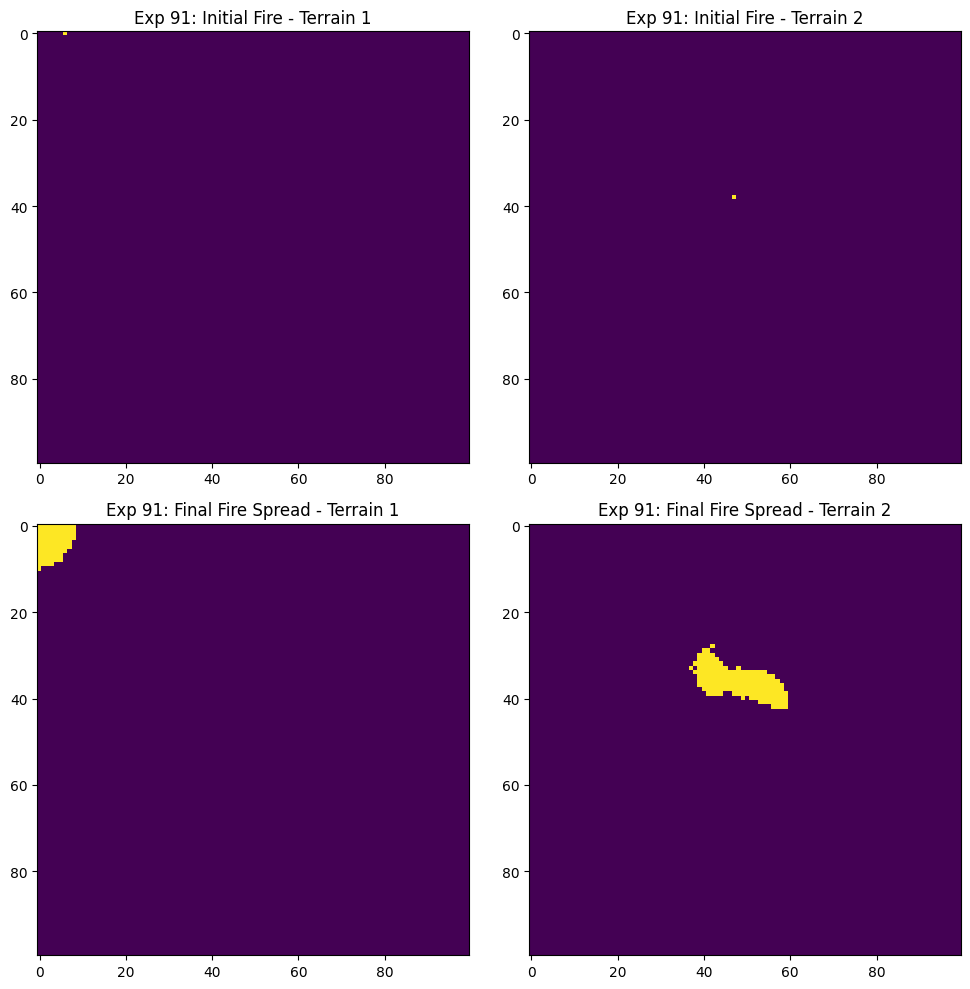

Experiment 92/100: Burned cells, Terrain 1: 175, Terrain 2: 78


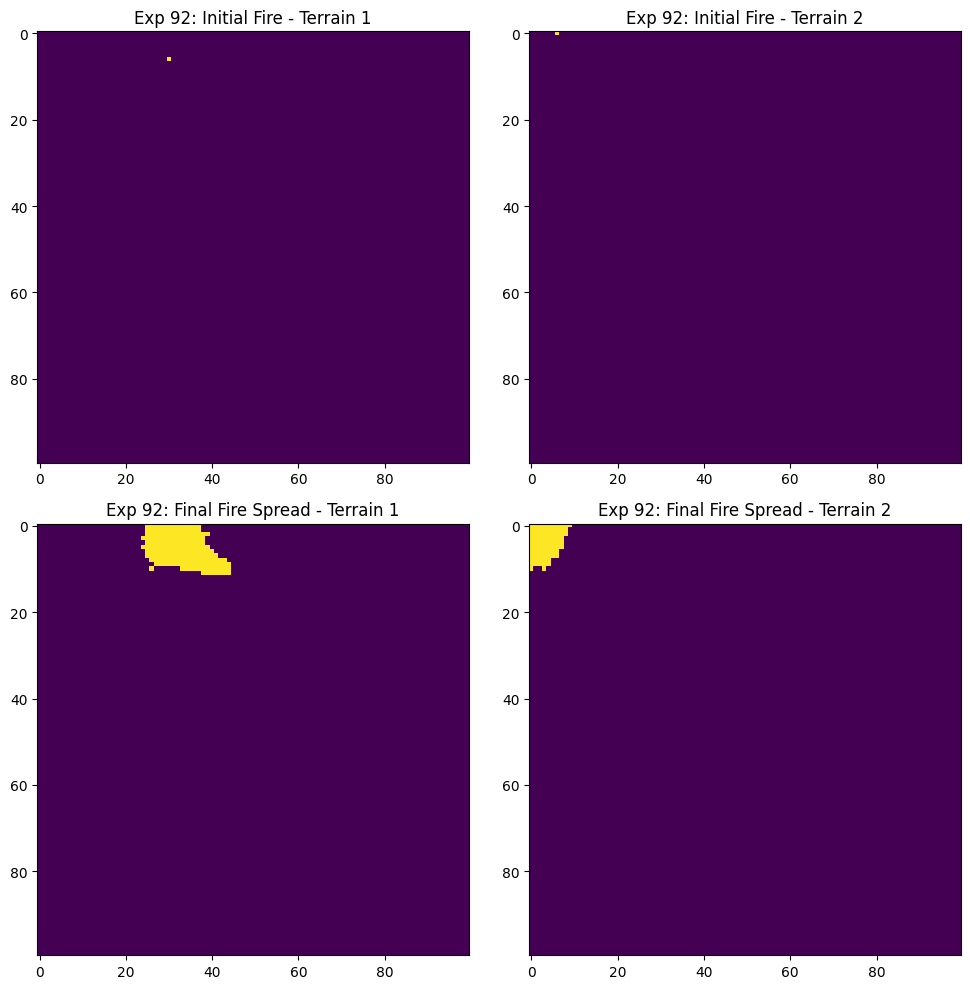

Experiment 93/100: Burned cells, Terrain 1: 74, Terrain 2: 176


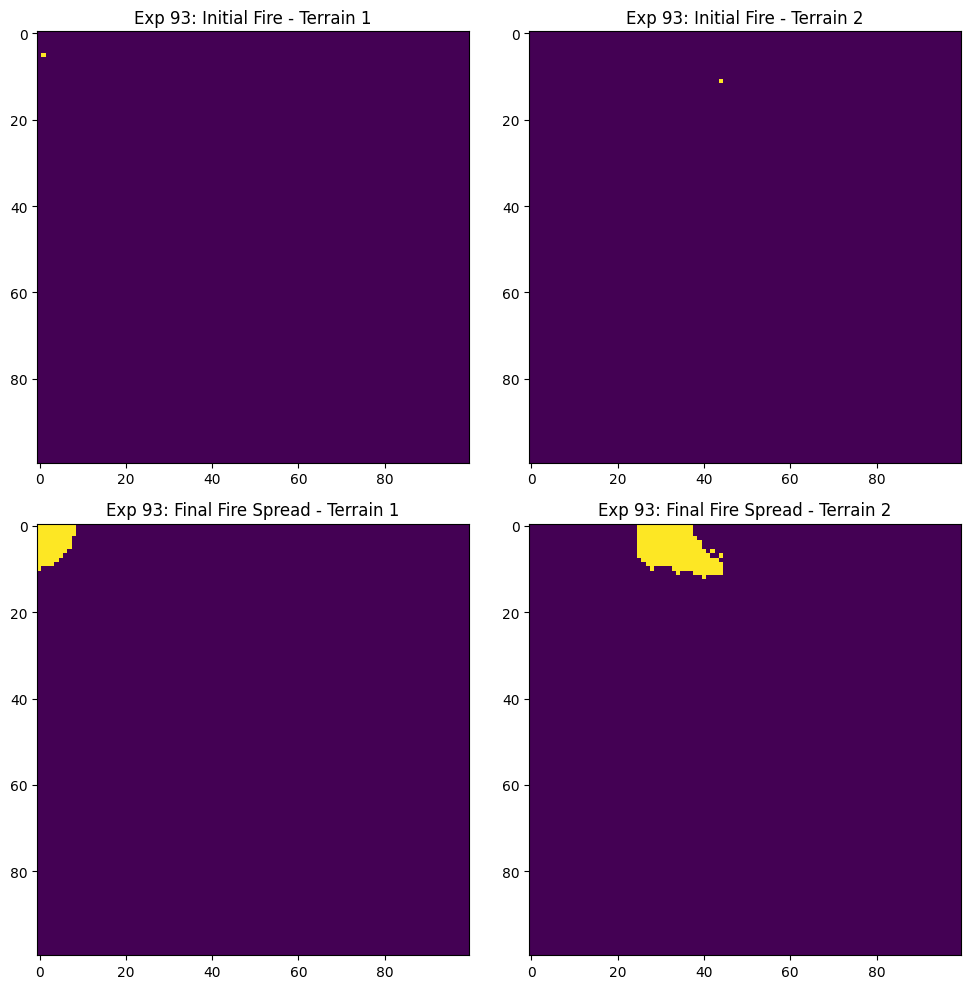

Experiment 94/100: Burned cells, Terrain 1: 171, Terrain 2: 75


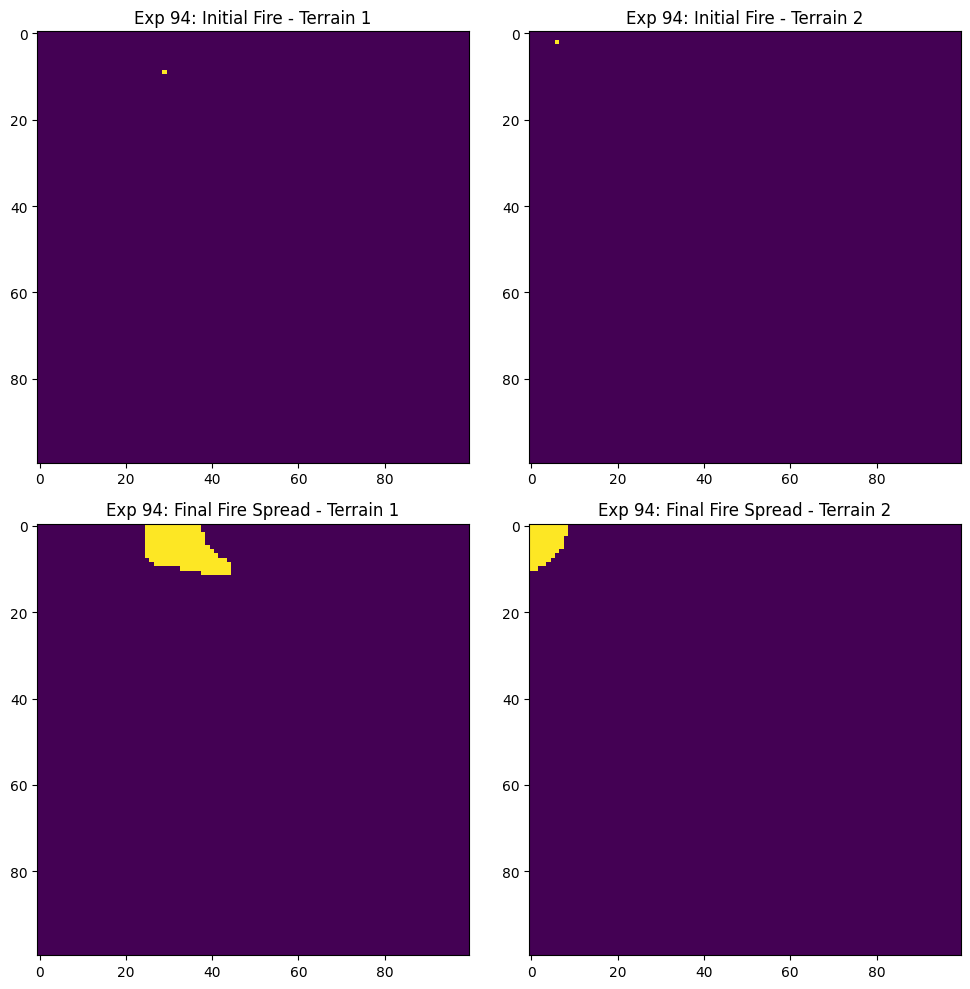

Experiment 95/100: Burned cells, Terrain 1: 175, Terrain 2: 160


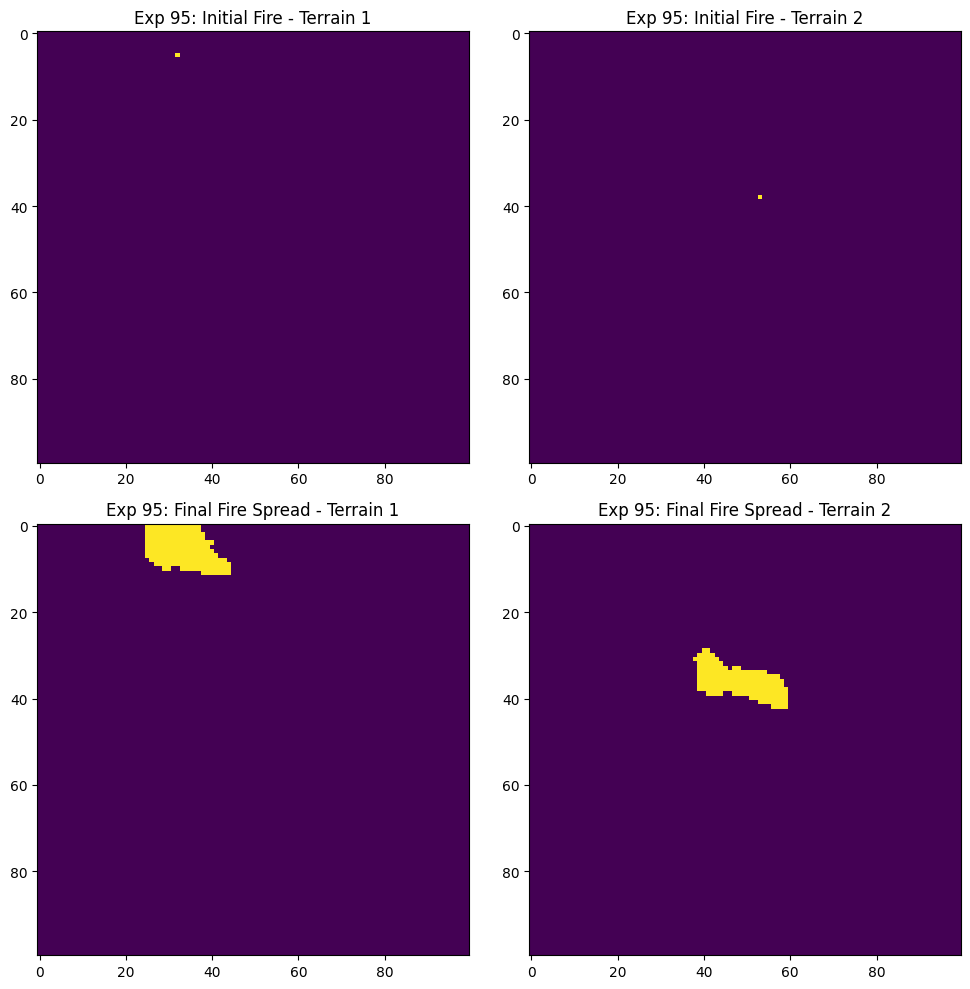

Experiment 96/100: Burned cells, Terrain 1: 172, Terrain 2: 25


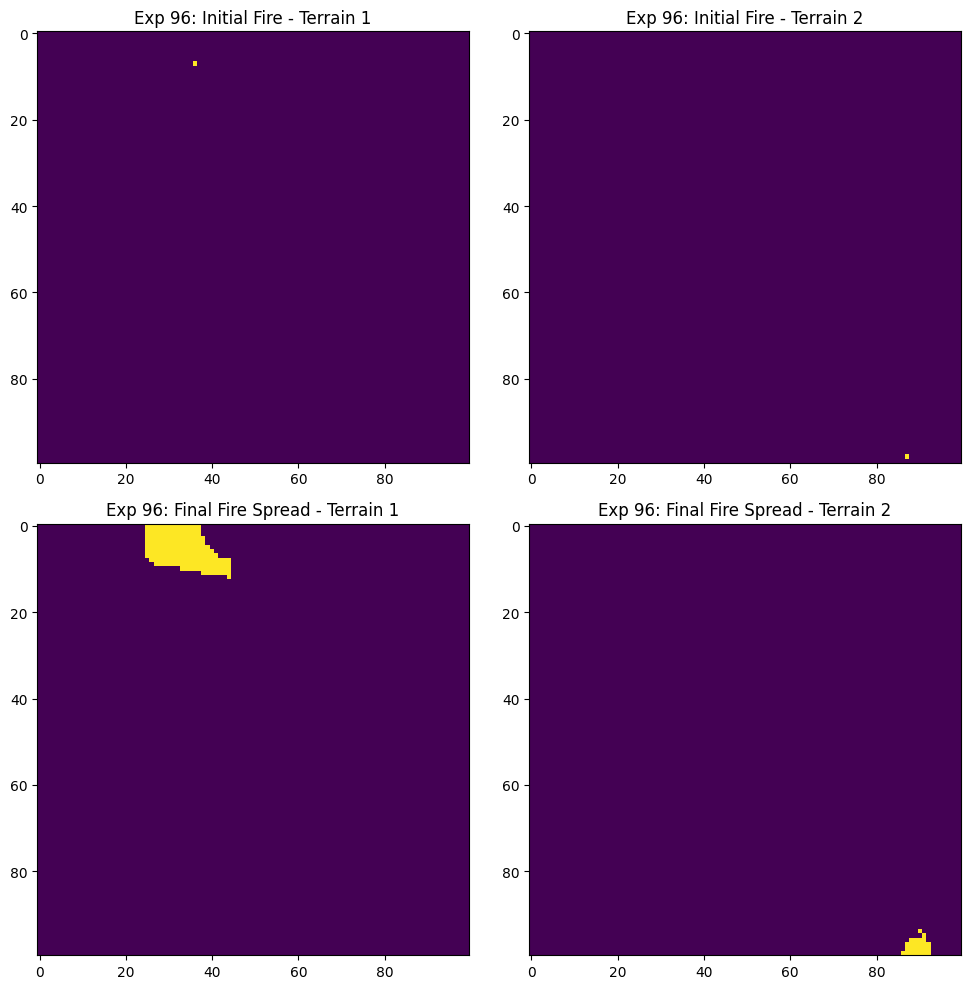

Experiment 97/100: Burned cells, Terrain 1: 157, Terrain 2: 160


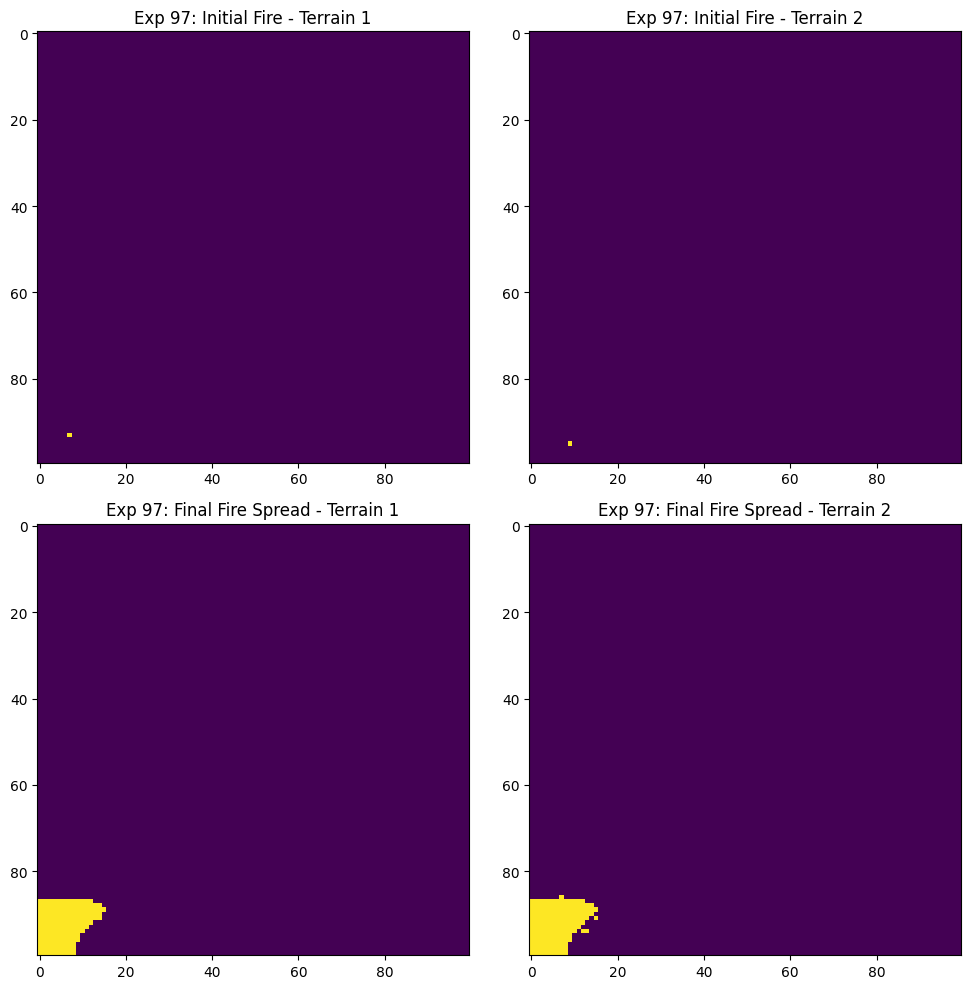

Experiment 98/100: Burned cells, Terrain 1: 158, Terrain 2: 161


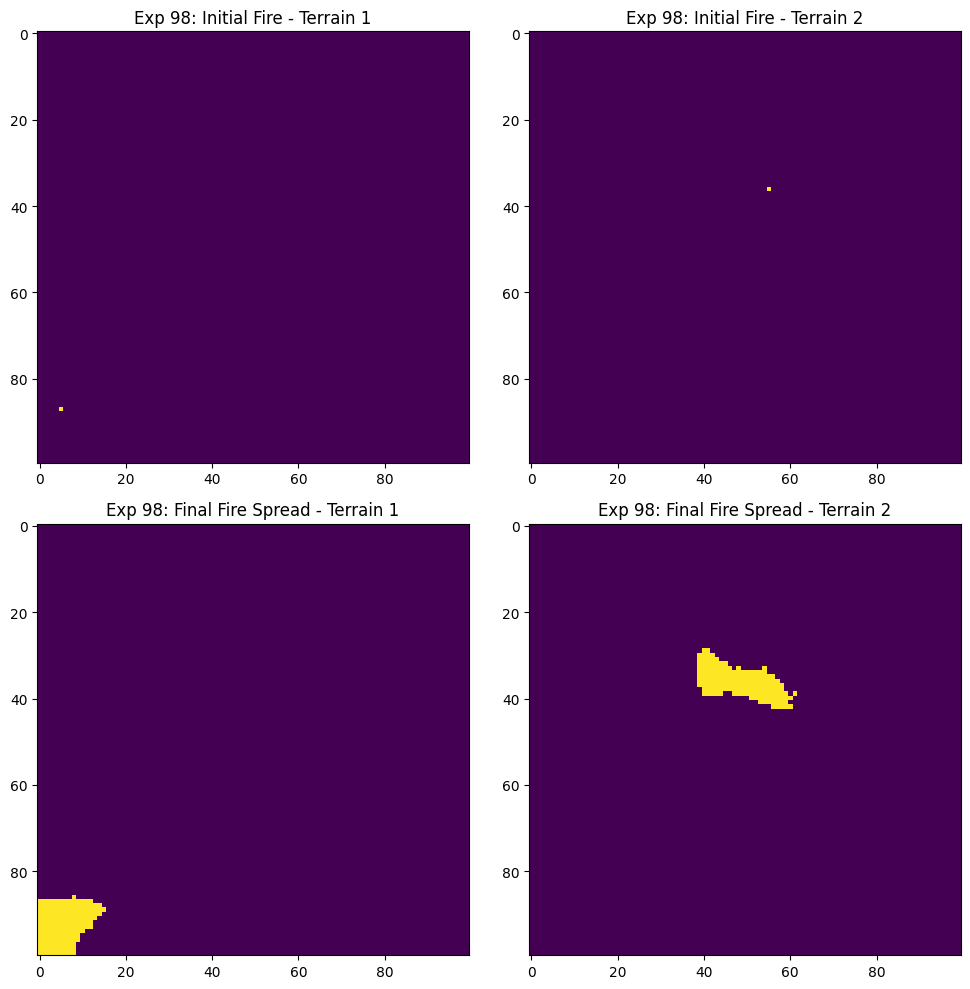

Experiment 99/100: Burned cells, Terrain 1: 30, Terrain 2: 23


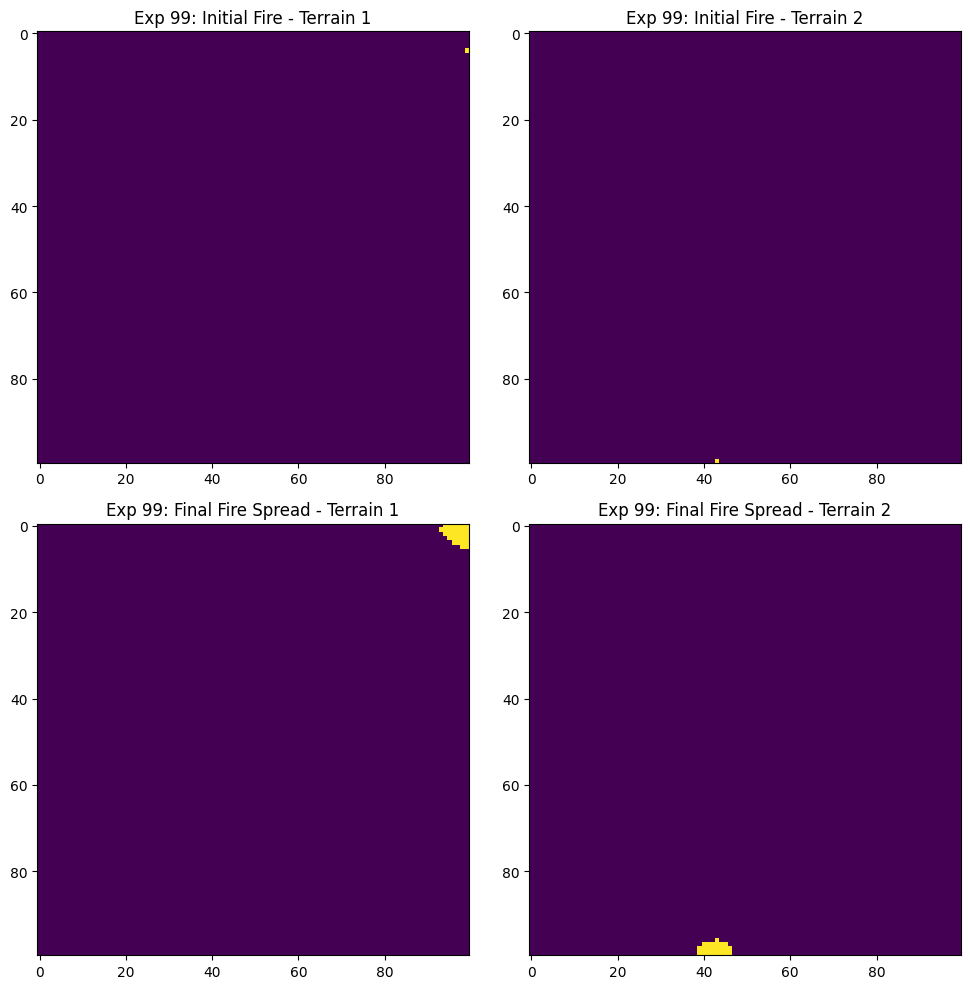

Experiment 100/100: Burned cells, Terrain 1: 175, Terrain 2: 157


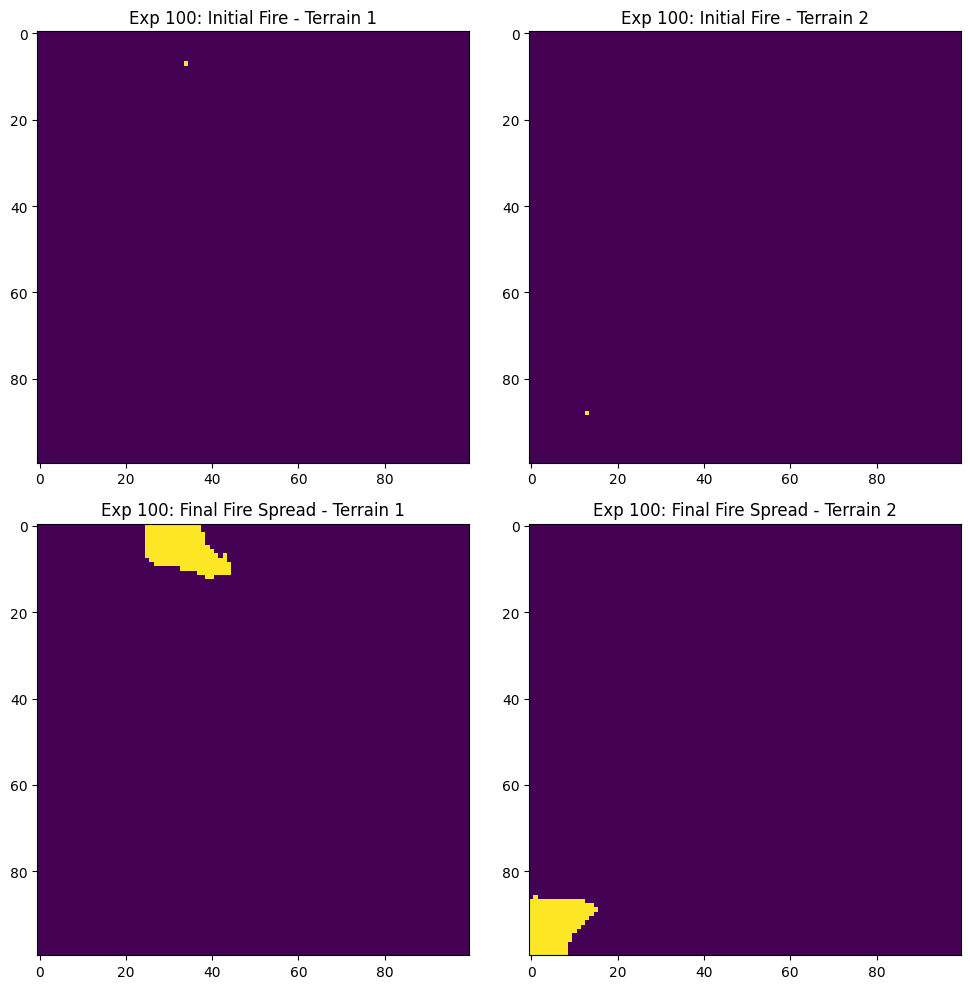

Average burned cells for Terrain 1: 132.39
Average burned cells for Terrain 2: 124.22
Standard Deviation of burned cells for Terrain 1: 55.02
Standard Deviation of burned cells for Terrain 2: 58.28


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def experiment(num_experiments: int, terrain_matrix1: np.ndarray, terrain_matrix2: np.ndarray):
    burned_areas_terrain1 = []
    burned_areas_terrain2 = []

    for exp in range(num_experiments):
        fig, axes = plt.subplots(2, 2, figsize=(10, 10))

        fireMatrix1 = np.zeros((rows, cols, timesteps+1), dtype=bool)
        fireIndices1 = set_random_fires(num_fires, rows, cols, terrain_matrix1)
        for i, j in fireIndices1:
            fireMatrix1[i, j, 0] = True
        fireMatrix1 = run_simulation(fireMatrix1, fireIndices1, terrain_matrix1, brush_fire_prob, live_veg_fire_prob)

        burned_cells1 = np.sum(fireMatrix1[:, :, -1])
        burned_areas_terrain1.append(burned_cells1)

        fireMatrix2 = np.zeros((rows, cols, timesteps+1), dtype=bool)
        fireIndices2 = set_random_fires(num_fires, rows, cols, terrain_matrix2)
        for i, j in fireIndices2:
            fireMatrix2[i, j, 0] = True
        fireMatrix2 = run_simulation(fireMatrix2, fireIndices2, terrain_matrix2, brush_fire_prob, live_veg_fire_prob)

        burned_cells2 = np.sum(fireMatrix2[:, :, -1])
        burned_areas_terrain2.append(burned_cells2)

        print(f"Experiment {exp+1}/{num_experiments}: Burned cells, Terrain 1: {burned_cells1}, Terrain 2: {burned_cells2}")

        axes[0, 0].imshow(fireMatrix1[:, :, 0], interpolation="nearest")
        axes[0, 0].set_title(f"Exp {exp+1}: Initial Fire - Terrain 1")

        axes[0, 1].imshow(fireMatrix2[:, :, 0], interpolation="nearest")
        axes[0, 1].set_title(f"Exp {exp+1}: Initial Fire - Terrain 2")

        axes[1, 0].imshow(fireMatrix1[:, :, -1], interpolation="nearest")
        axes[1, 0].set_title(f"Exp {exp+1}: Final Fire Spread - Terrain 1")

        axes[1, 1].imshow(fireMatrix2[:, :, -1], interpolation="nearest")
        axes[1, 1].set_title(f"Exp {exp+1}: Final Fire Spread - Terrain 2")

        plt.tight_layout()
        plt.show()

    # Average Burned Cells
    avg_burned_terrain1 = np.mean(burned_areas_terrain1)
    avg_burned_terrain2 = np.mean(burned_areas_terrain2)

    # Standard Deviation
    std_burned_terrain1 = np.std(burned_areas_terrain1, ddof=1)
    std_burned_terrain2 = np.std(burned_areas_terrain2, ddof=1)

    print(f"Average burned cells for Terrain 1: {avg_burned_terrain1:.2f}")
    print(f"Average burned cells for Terrain 2: {avg_burned_terrain2:.2f}")
    print(f"Standard Deviation of burned cells for Terrain 1: {std_burned_terrain1:.2f}")
    print(f"Standard Deviation of burned cells for Terrain 2: {std_burned_terrain2:.2f}")

experiment(100, terrain_matrix1, terrain_matrix2)

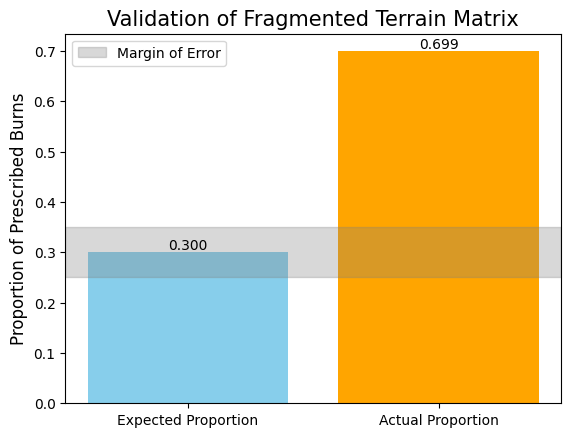

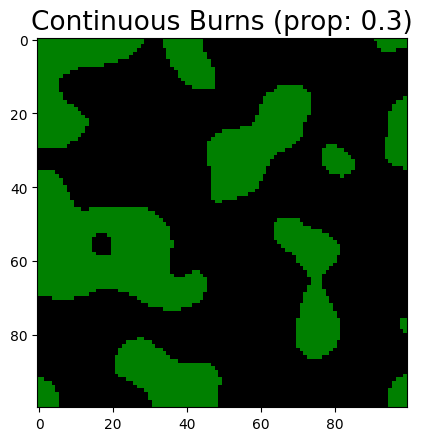

In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

file_path = "/content/Spl_s6_prop0.5.json"
with open(file_path, "r") as file:
    bool_terrain = np.array(json.load(file))

expected_prop = 0.3  # Expected proportion of prescribed burns
margin_of_error = 0.05  # Margin of error for validation

# Calculate actual proportion of prescribed burns
actual_prop = np.sum(bool_terrain) / bool_terrain.size

def plot_validation(expected_prop, actual_prop, margin_of_error):
    fig, ax = plt.subplots()
    categories = ['Expected Proportion', 'Actual Proportion']
    proportions = [expected_prop, actual_prop]

    bars = ax.bar(categories, proportions, color=['skyblue', 'orange'])

    ax.axhspan(expected_prop - margin_of_error, expected_prop + margin_of_error,
               color='gray', alpha=0.3, label='Margin of Error')

    ax.set_ylabel('Proportion of Prescribed Burns', fontsize=12)
    ax.set_title('Validation of Fragmented Terrain Matrix', fontsize=15)
    ax.legend()

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')

    plt.show()

plot_validation(expected_prop, actual_prop, margin_of_error)

# Plot correlating matrix
def plot_terrain(matrix, prop):
    colors = ["green", "black"]  # Green for live vegetation, Black for prescribed burns
    map_color = mcolors.ListedColormap(colors)
    fig, ax = plt.subplots()
    ax.imshow(matrix, cmap=map_color)
    ax.set_title(f"Continuous Burns (prop: {prop})", fontsize=19)
    return fig, ax

plot_terrain(bool_terrain, expected_prop)
plt.show()


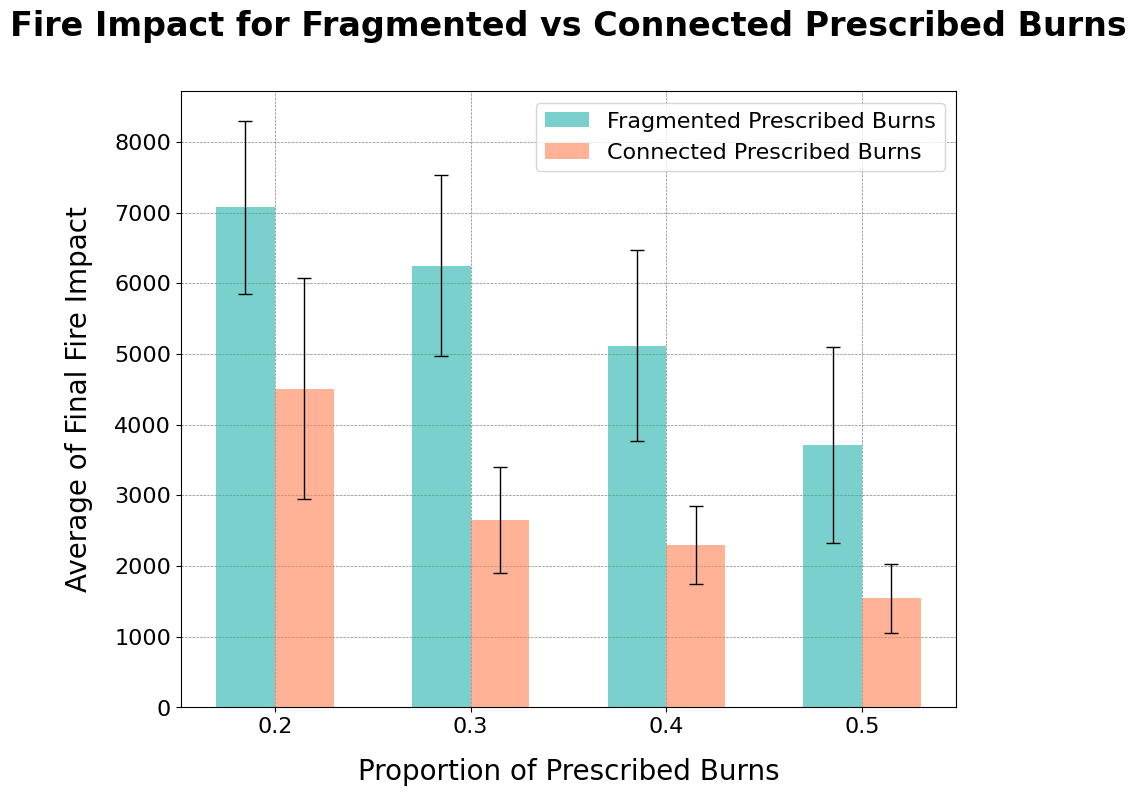

In [9]:
import matplotlib.pyplot as plt
import numpy as np

red = "lightseagreen"
green = "coral"

x_labels = [0.2, 0.3, 0.4, 0.5]
low_connectivity_means = [7073.31, 6251.12, 5118.55, 3714.34]
high_connectivity_means = [4510.72, 2650.32, 2296.47, 1543.85]

std_devs_low = [1226.30, 1278.43, 1351.99, 1381.63]
std_devs_high = [1566.26, 747.40, 557.07, 485.62]

x_pos = np.arange(len(x_labels))

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.3

ax.bar(
    x_pos - bar_width / 2,
    low_connectivity_means,
    bar_width,
    yerr=std_devs_low,
    label="Fragmented Prescribed Burns",
    color=red,
    alpha=0.6,
    capsize=5,
    zorder=2,
    error_kw={'elinewidth': 1, 'ecolor': 'black'}
)

ax.bar(
    x_pos + bar_width / 2,
    high_connectivity_means,
    bar_width,
    yerr=std_devs_high,
    label="Connected Prescribed Burns",
    color=green,
    alpha=0.6,
    capsize=5,
    zorder=3,
    error_kw={'elinewidth': 1, 'ecolor': 'black'}
)

ax.set_title("Fire Impact for Fragmented vs Connected Prescribed Burns", fontsize=24, fontweight='bold', pad=40)
ax.set_ylabel("Average of Final Fire Impact", fontsize=20, labelpad=15)
ax.set_xlabel("Proportion of Prescribed Burns", fontsize=20, labelpad=15)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.legend(fontsize=16)

plt.grid(True, linestyle="--", color='gray', linewidth=0.5, zorder=1)

plt.show()

Acknowledgment of Contribution: Ekaterina Germanenko, Mara Masic, Max Arcinas